<div style="border: 2px solid #422e13; border-radius: 30px; background: #f2e9e1;">
    <div style="padding: 10px 10px 10px 0px; margin: 5px; border-radius: 23px; background: #488f31; text-align: center;">
        <span style="font-family: sans-serif; font-size: 38px; color: #fff;">Предсказание отточности клиентов</span>
    </div>
</div>

<h1 align="center">Содержание</h1>


    
* [1. Импорт необходимых библиотек](#1)
    
* [2. Загрузка данных](#2)
    
* [3. Получение информации о датасете](#3)     
    * [3.1. Получение основной информации о датасете](#3.1)    
    * [3.2. Анализ пропущенных значений](#3.2)    
        
* [4. EDA(Exploratory Data Analysis)](#4)
    * [4.1. Одномерный анализ данных](#4.1)  
        * [4.1.1. Демографические данные о клиентах](#4.1.1)  
        * [4.1.2. Информация об учетной записи клиентов](#4.1.2) 
        * [4.1.3. Информация об клиентских услугах](#4.1.3) 
        * [4.1.4. Исследование распределения общих и ежемесячных платежей](#4.1.3) 
    * [4.2. Двумерный анализ данных. Поиск корреляций](#4.2) 
        * [4.2.1. Зависимость отточности клиентов от демографических данных](#4.2.1) 
        * [4.2.2. Зависимость отточности клиентов от информации об учетной записи клиента](#4.2.2) 
        * [4.2.3. Зависимость отточности клиентов от предпочитаемых услуг](#4.2.3)
        * [4.2.4. Дополнительные исследования](#4.2.4)
    
* [5. Machine Learning](#5)
    * [5.1. Feature engineering ](#5.1)
    * [5.2. Обучающая и тестовая выборка ](#5.2) 
    * [5.3. DecisionTreeClassifier](#5.3)
    * [5.4. RandomForestClissifier](#5.4)
    * [5.5. AdaBoostClassifier](#5.5)
    * [5.6. GradientBoostingClassifier](#5.6)
    * [5.7. Support Vector Machines](#5.7)
    * [5.8. KNeighborsClassifier](#5.8)
    * [5.9. LogisticRegression](#5.9)
    * [5.10. CatBoostClissifier](#5.10)
    * [5.11. Сравнение моделей](#5.11)
    * [5.12. Лучшая модель](#5.12)
    * [5.13. Feature importance](#5.13)
    * [5.14. Обучение лучшей модели на всех данных](#5.14)
    * [5.15. Сохранение модели](#5.15)
    
* [6.0. Выводы ](#6)

<a id="1"></a>

# <b>1 <span style='color:#422e13;font-family:cursive;'>|</span> Импорт необходимых библиотек</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab 
import scipy.stats as stats

import shap 

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from catboost import cv,Pool
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


from joblib import dump, load

import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

# 

<a id="2"></a>

# <b>2 <span style='color:#422e13;font-family:cursive;'>|</span> Загрузка данных</b>

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

# 

<a id="3"></a>

# <b>3 <span style='color:#422e13;font-family:cursive;'>|</span> Получение информации о датасете</b>

<a id="3.1"></a>

### <b>3.1 <span style='color:#422e13;font-family:cursive;'>|</span> Получение основной информации о датасете</b>

In [5]:
# Напишите Ваш код в этой ячейке
df.describe().T.style.background_gradient(cmap = "summer")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Датафрейм состоит из 7032 строк.

# 

<a id="3.2"></a>

### <b>3.2 <span style='color:#422e13;font-family:cursive;'>|</span> Анализ пропущенных значений</b>

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

В данных нет пропущенных значений

# 

<a id="4"></a>

# <b>4 <span style='color:#422e13;font-family:cursive;'>|</span> EDA(Exploratory Data Analysis)</b>

<a id="4.1"></a>

## <b>4.1 <span style='color:#422e13;font-family:cursive;'>|</span> Одномерный анализ данных</b>

<a id="4.1.1"></a>

### <b>4.1.1 <span style='color:#422e13;font-family:cursive;'>|</span> Демографические данные о клиентах</b>


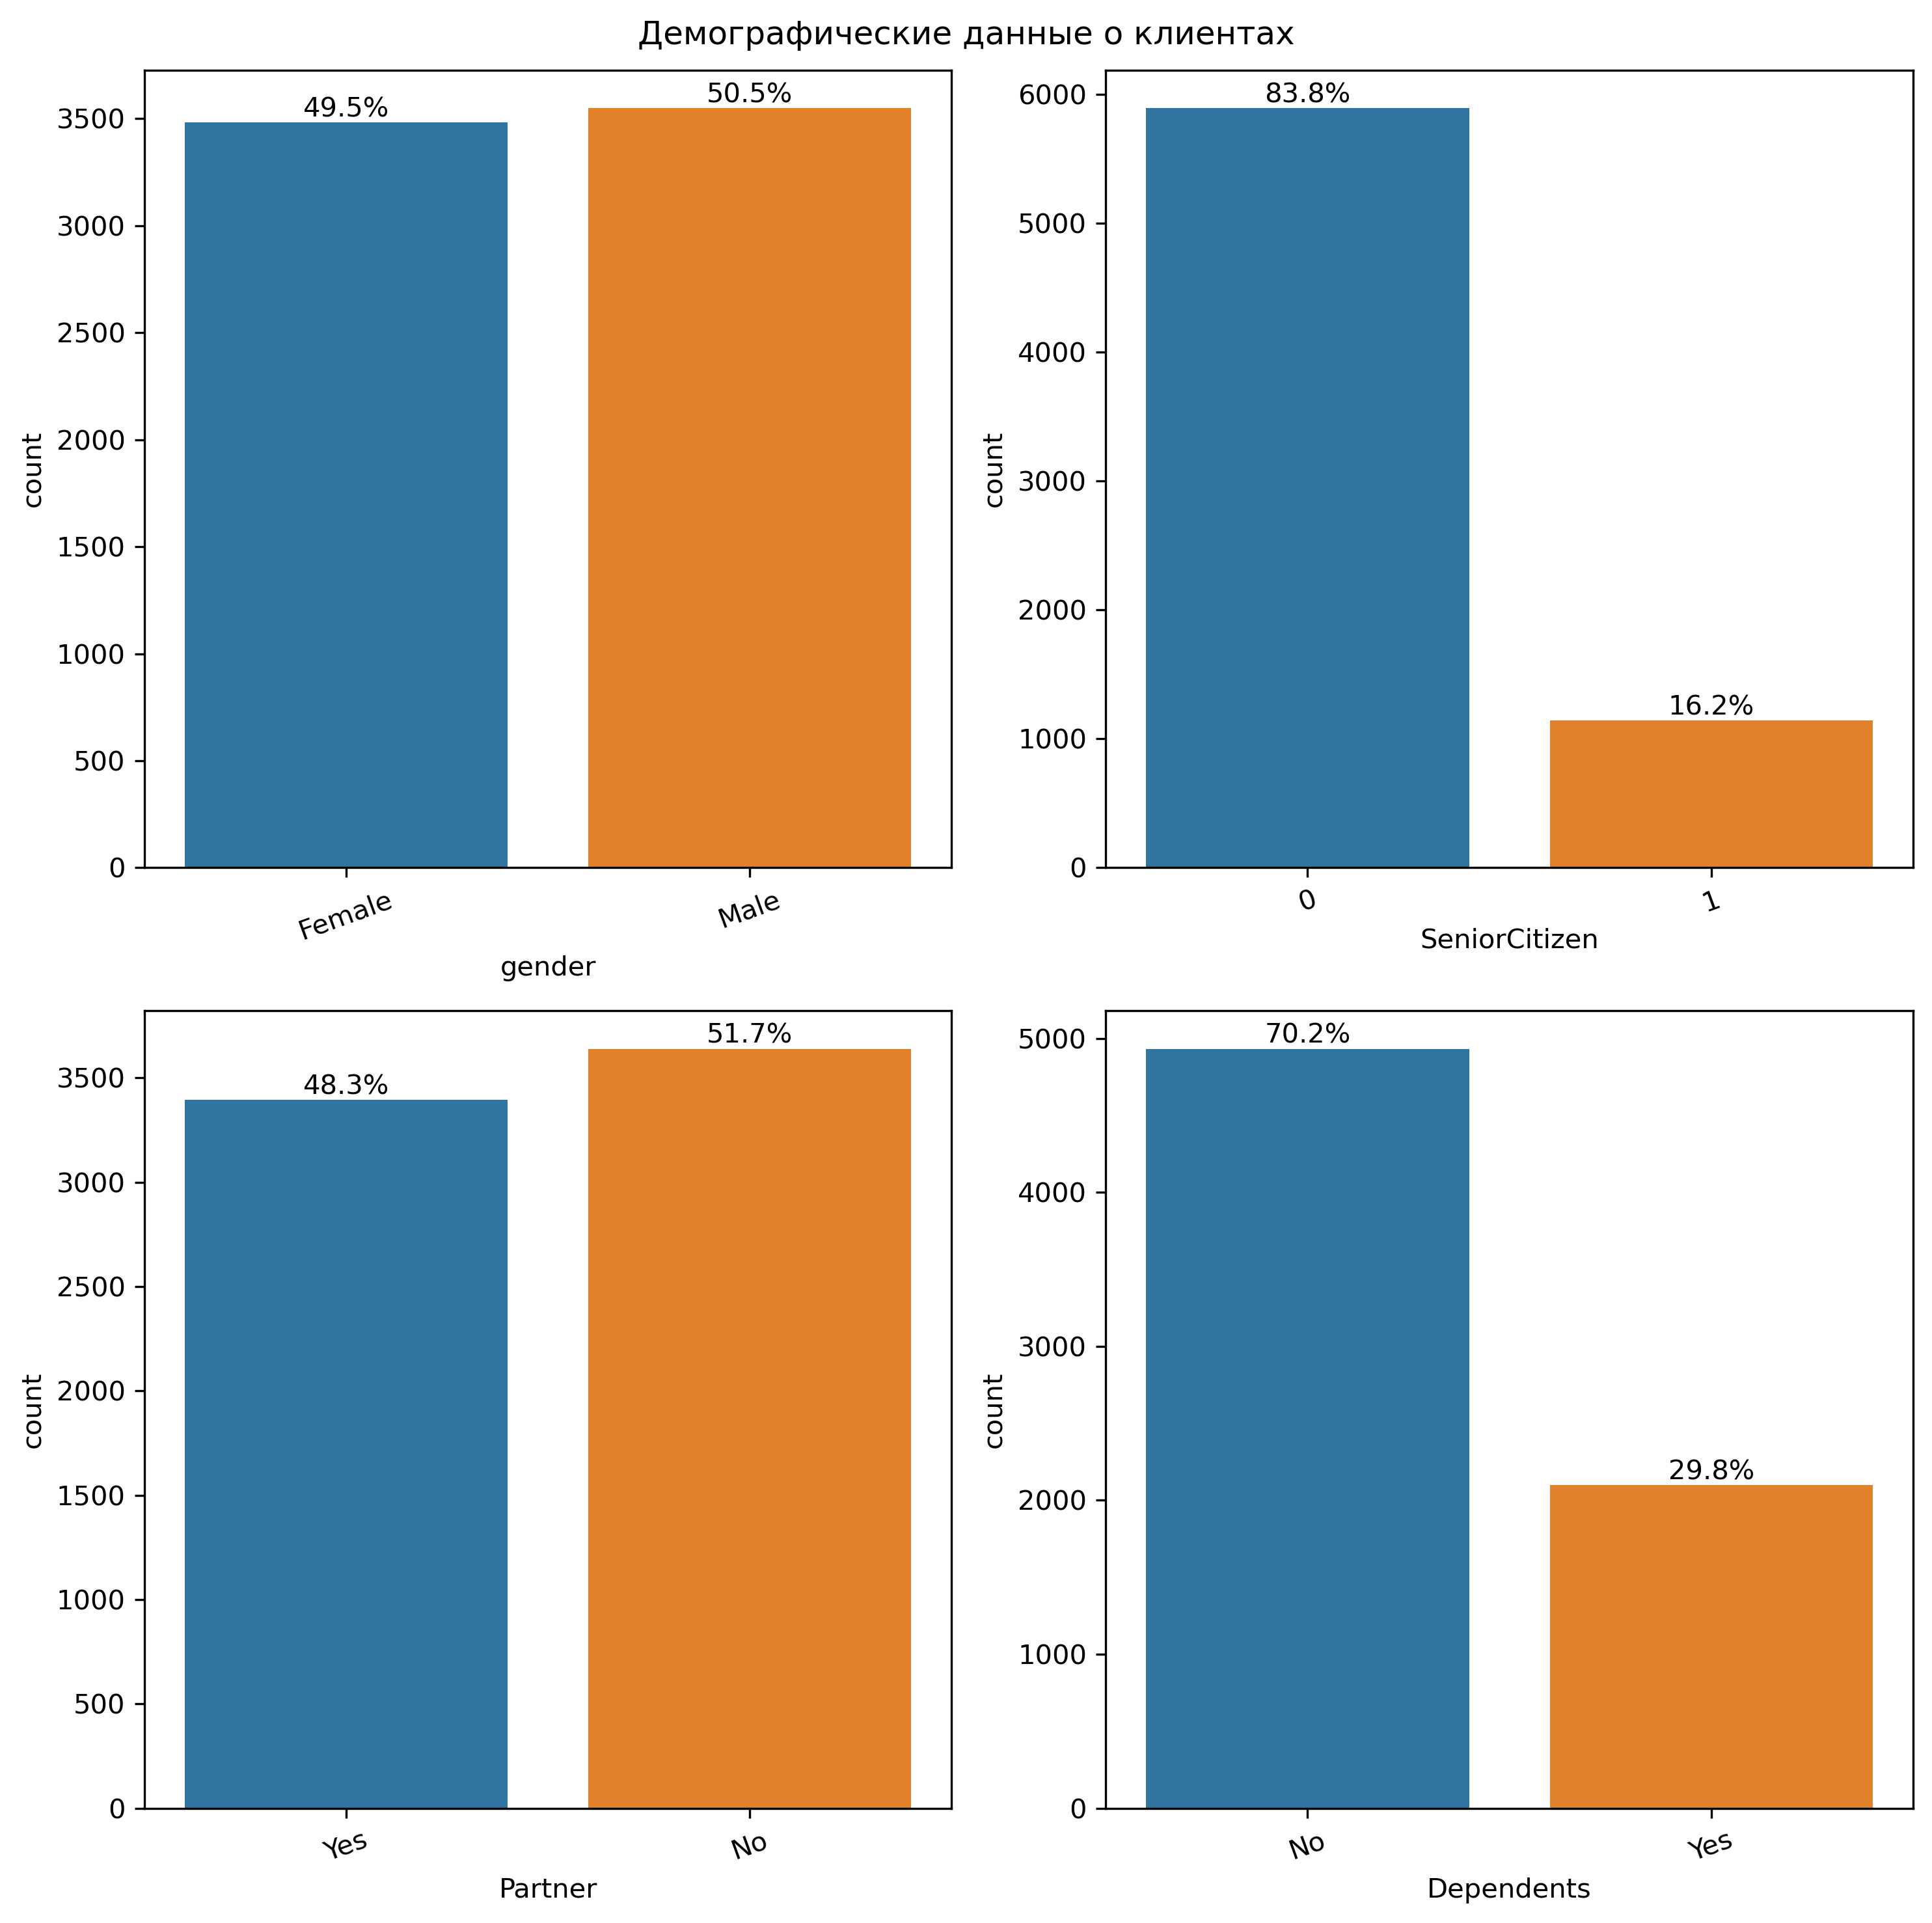

In [8]:
demographic_columns = df[['gender','SeniorCitizen','Partner','Dependents']]

def demographic_information_customers(data, figsize=(10,10)):
    num_columns = len(demographic_columns.columns)
    num_rows = (num_columns - 1) // 2 + 1

    fig = plt.figure(figsize=figsize, dpi=300)
    fig.suptitle('Демографические данные о клиентах')
    
    for i, column in enumerate(demographic_columns.columns):
        ax = fig.add_subplot(num_rows, 2, i+1)
        sns.countplot(data=demographic_columns, x=column, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        
        # Подсчет процентов и добавление их на график
        total = float(len(demographic_columns))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
        
    plt.tight_layout()
    plt.show()
    
demographic_information_customers(df)

- Количетсво клиентов мужского(50.5%) и женского пола(49.5%) практически одинаково;
- Наибольшее количество не пожилых клиентов;
- Количество клиентов у которых есть либо нет партнера практически одинаково;
- В основном клиенты не иждевенцы(70.2%);

# 

<a id="4.1.2"></a>

### <b>4.1.2 <span style='color:#422e13;font-family:cursive;'>|</span> Информация об учетной записи клиентов</b>


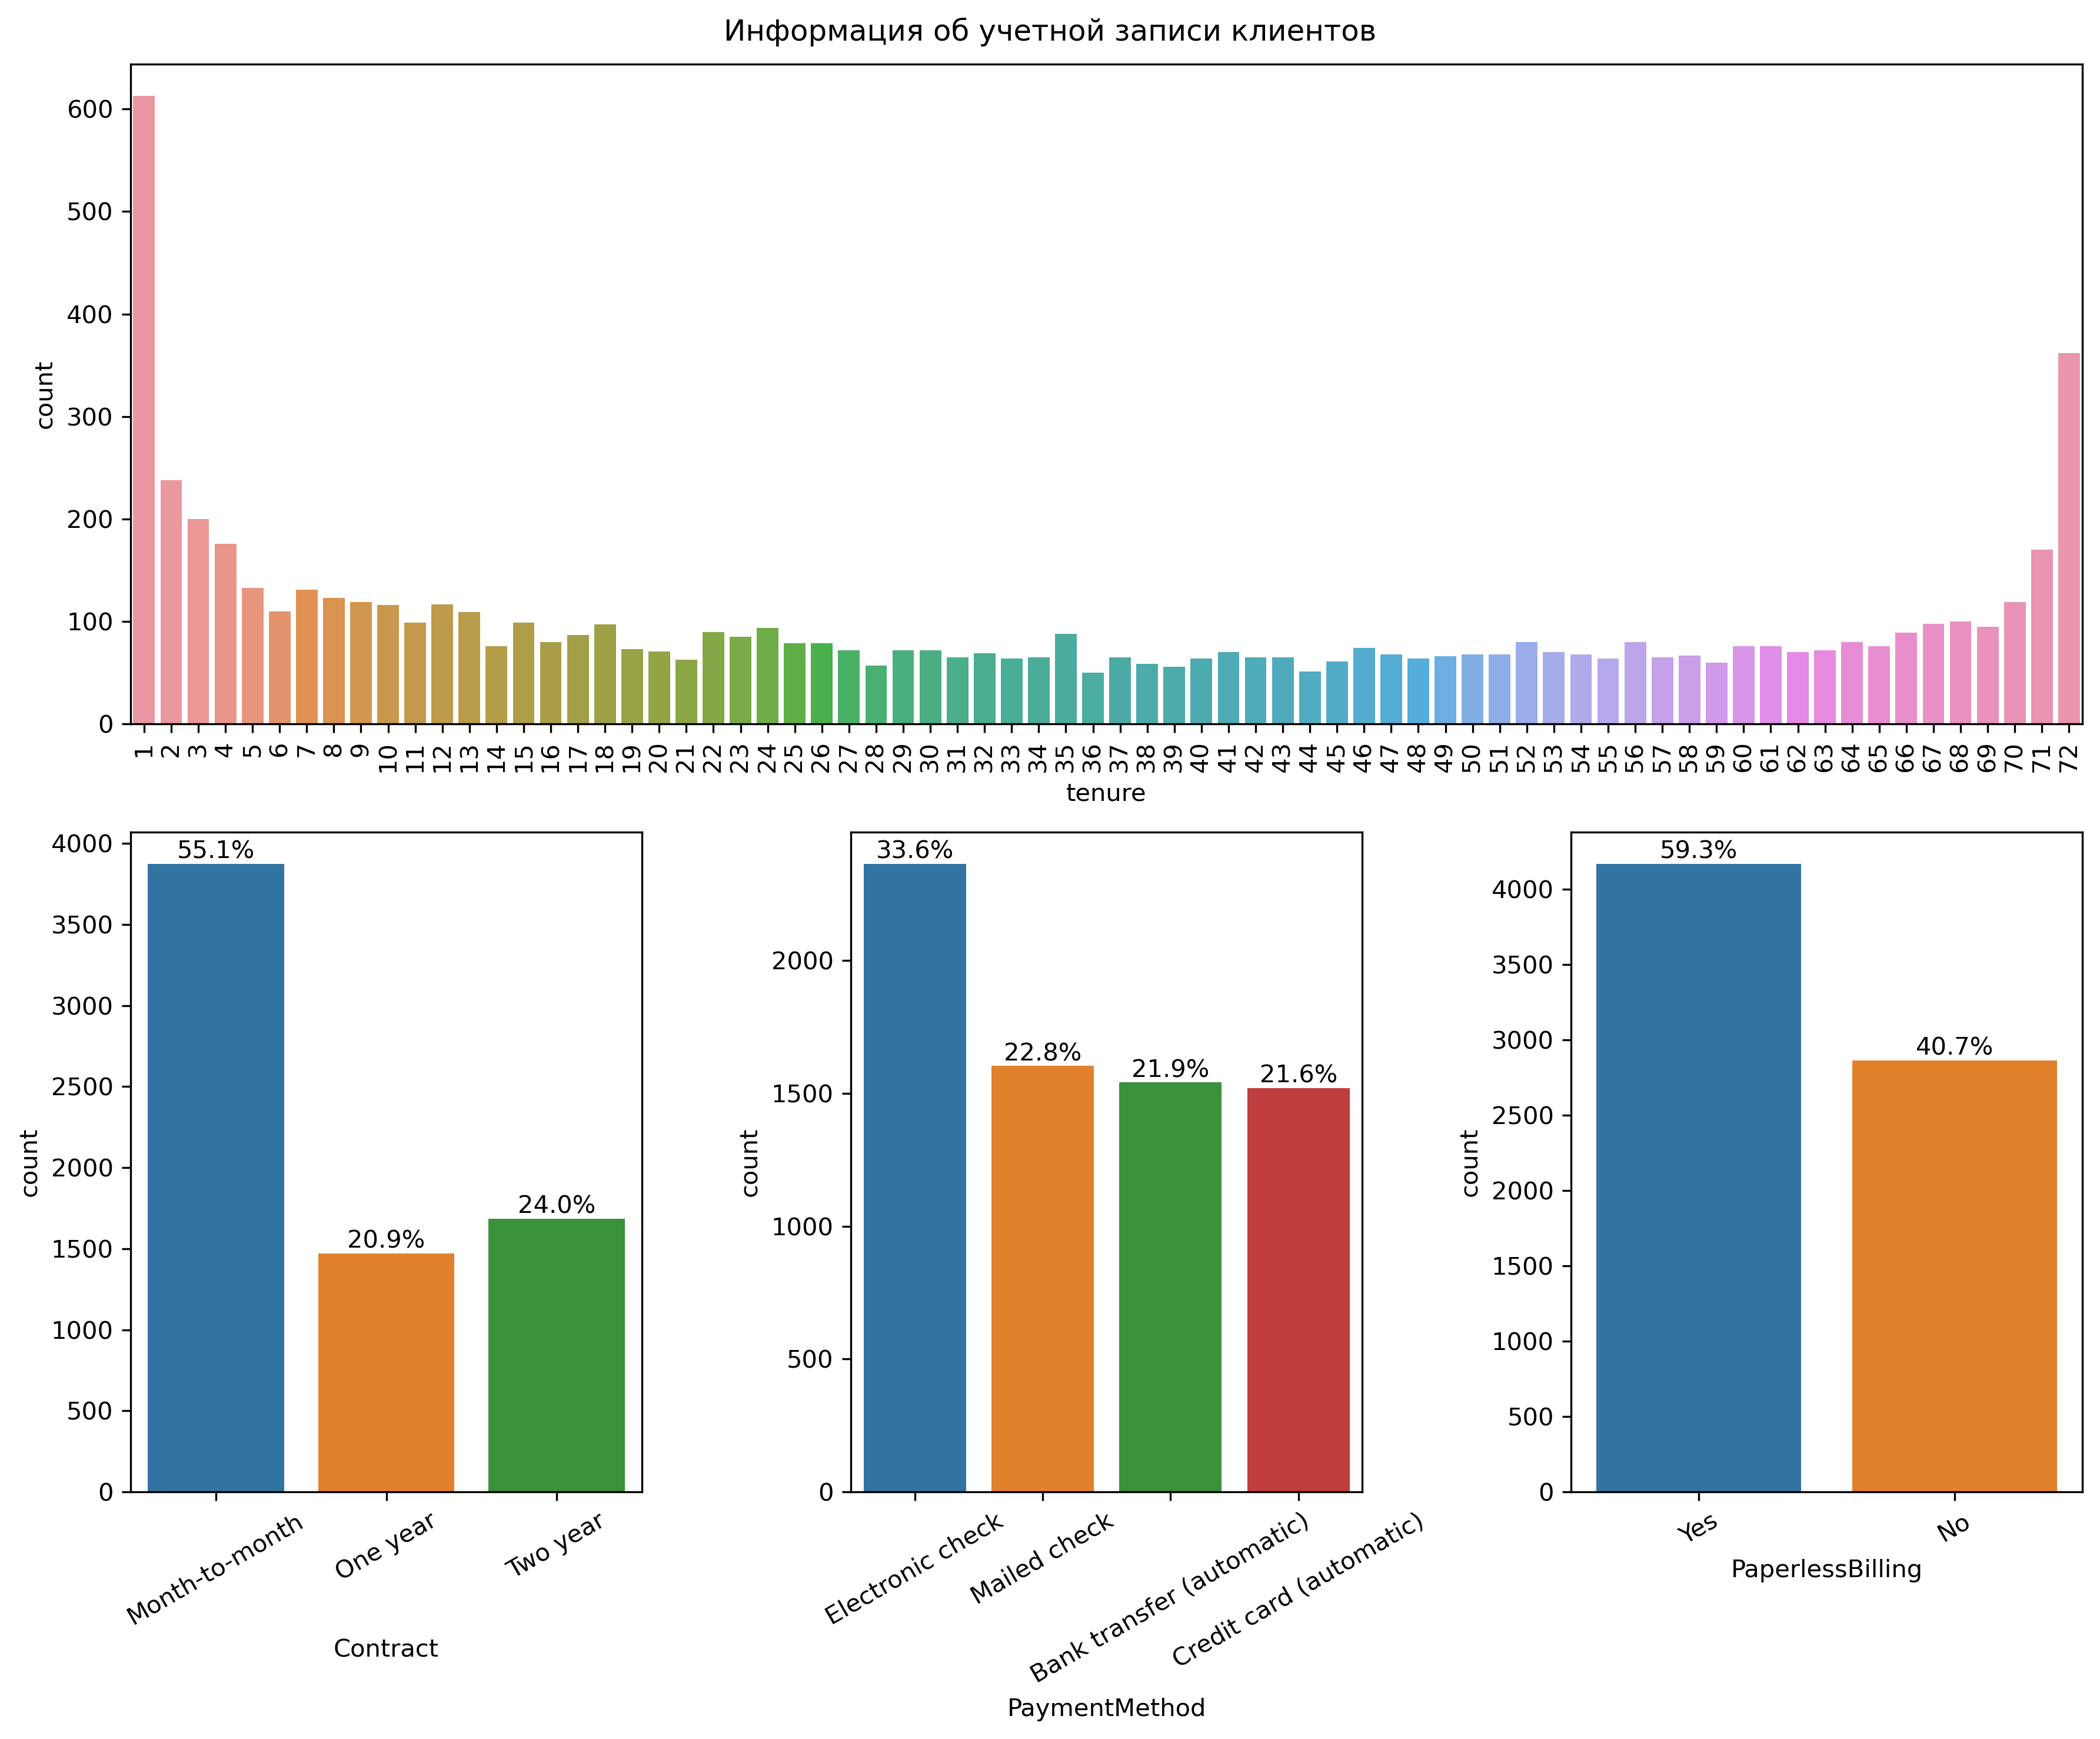

In [9]:
customer_account_information_columns = df[['tenure', 'Contract', 'PaymentMethod', 'PaperlessBilling']]

def customer_account_information(data, figsize=(12, 10)):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax1 = fig.add_subplot(2, 3, (1, 3))
    ax2 = fig.add_subplot(2, 3, 4)
    ax3 = fig.add_subplot(2, 3, 5)
    ax4 = fig.add_subplot(2, 3, 6)
    fig.suptitle('Информация об учетной записи клиентов')

    sns.countplot(data=customer_account_information_columns, x='tenure', ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    
    sns.countplot(data=customer_account_information_columns, x='Contract', ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
    
    sns.countplot(data=customer_account_information_columns, x='PaymentMethod', ax=ax3)
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
    
    sns.countplot(data=customer_account_information_columns, x='PaperlessBilling', ax=ax4)
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=30)

    # Добавление процентов на нижние графики
    total = float(len(customer_account_information_columns))
    
    for ax in [ax2, ax3, ax4]:
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    
customer_account_information(df)

- Длительность подписки клиентов в основном 1 или 72 месяцаж
- Предпочтение отдается контракту Month-to-month;
- Клиенты предпочитают электронную оплату;
- Безбумажный биллинг в приоритете.

# 

<a id="4.1.3"></a>

### <b>4.1.3 <span style='color:#422e13;font-family:cursive;'>|</span> Информация об клиентских услугах</b>

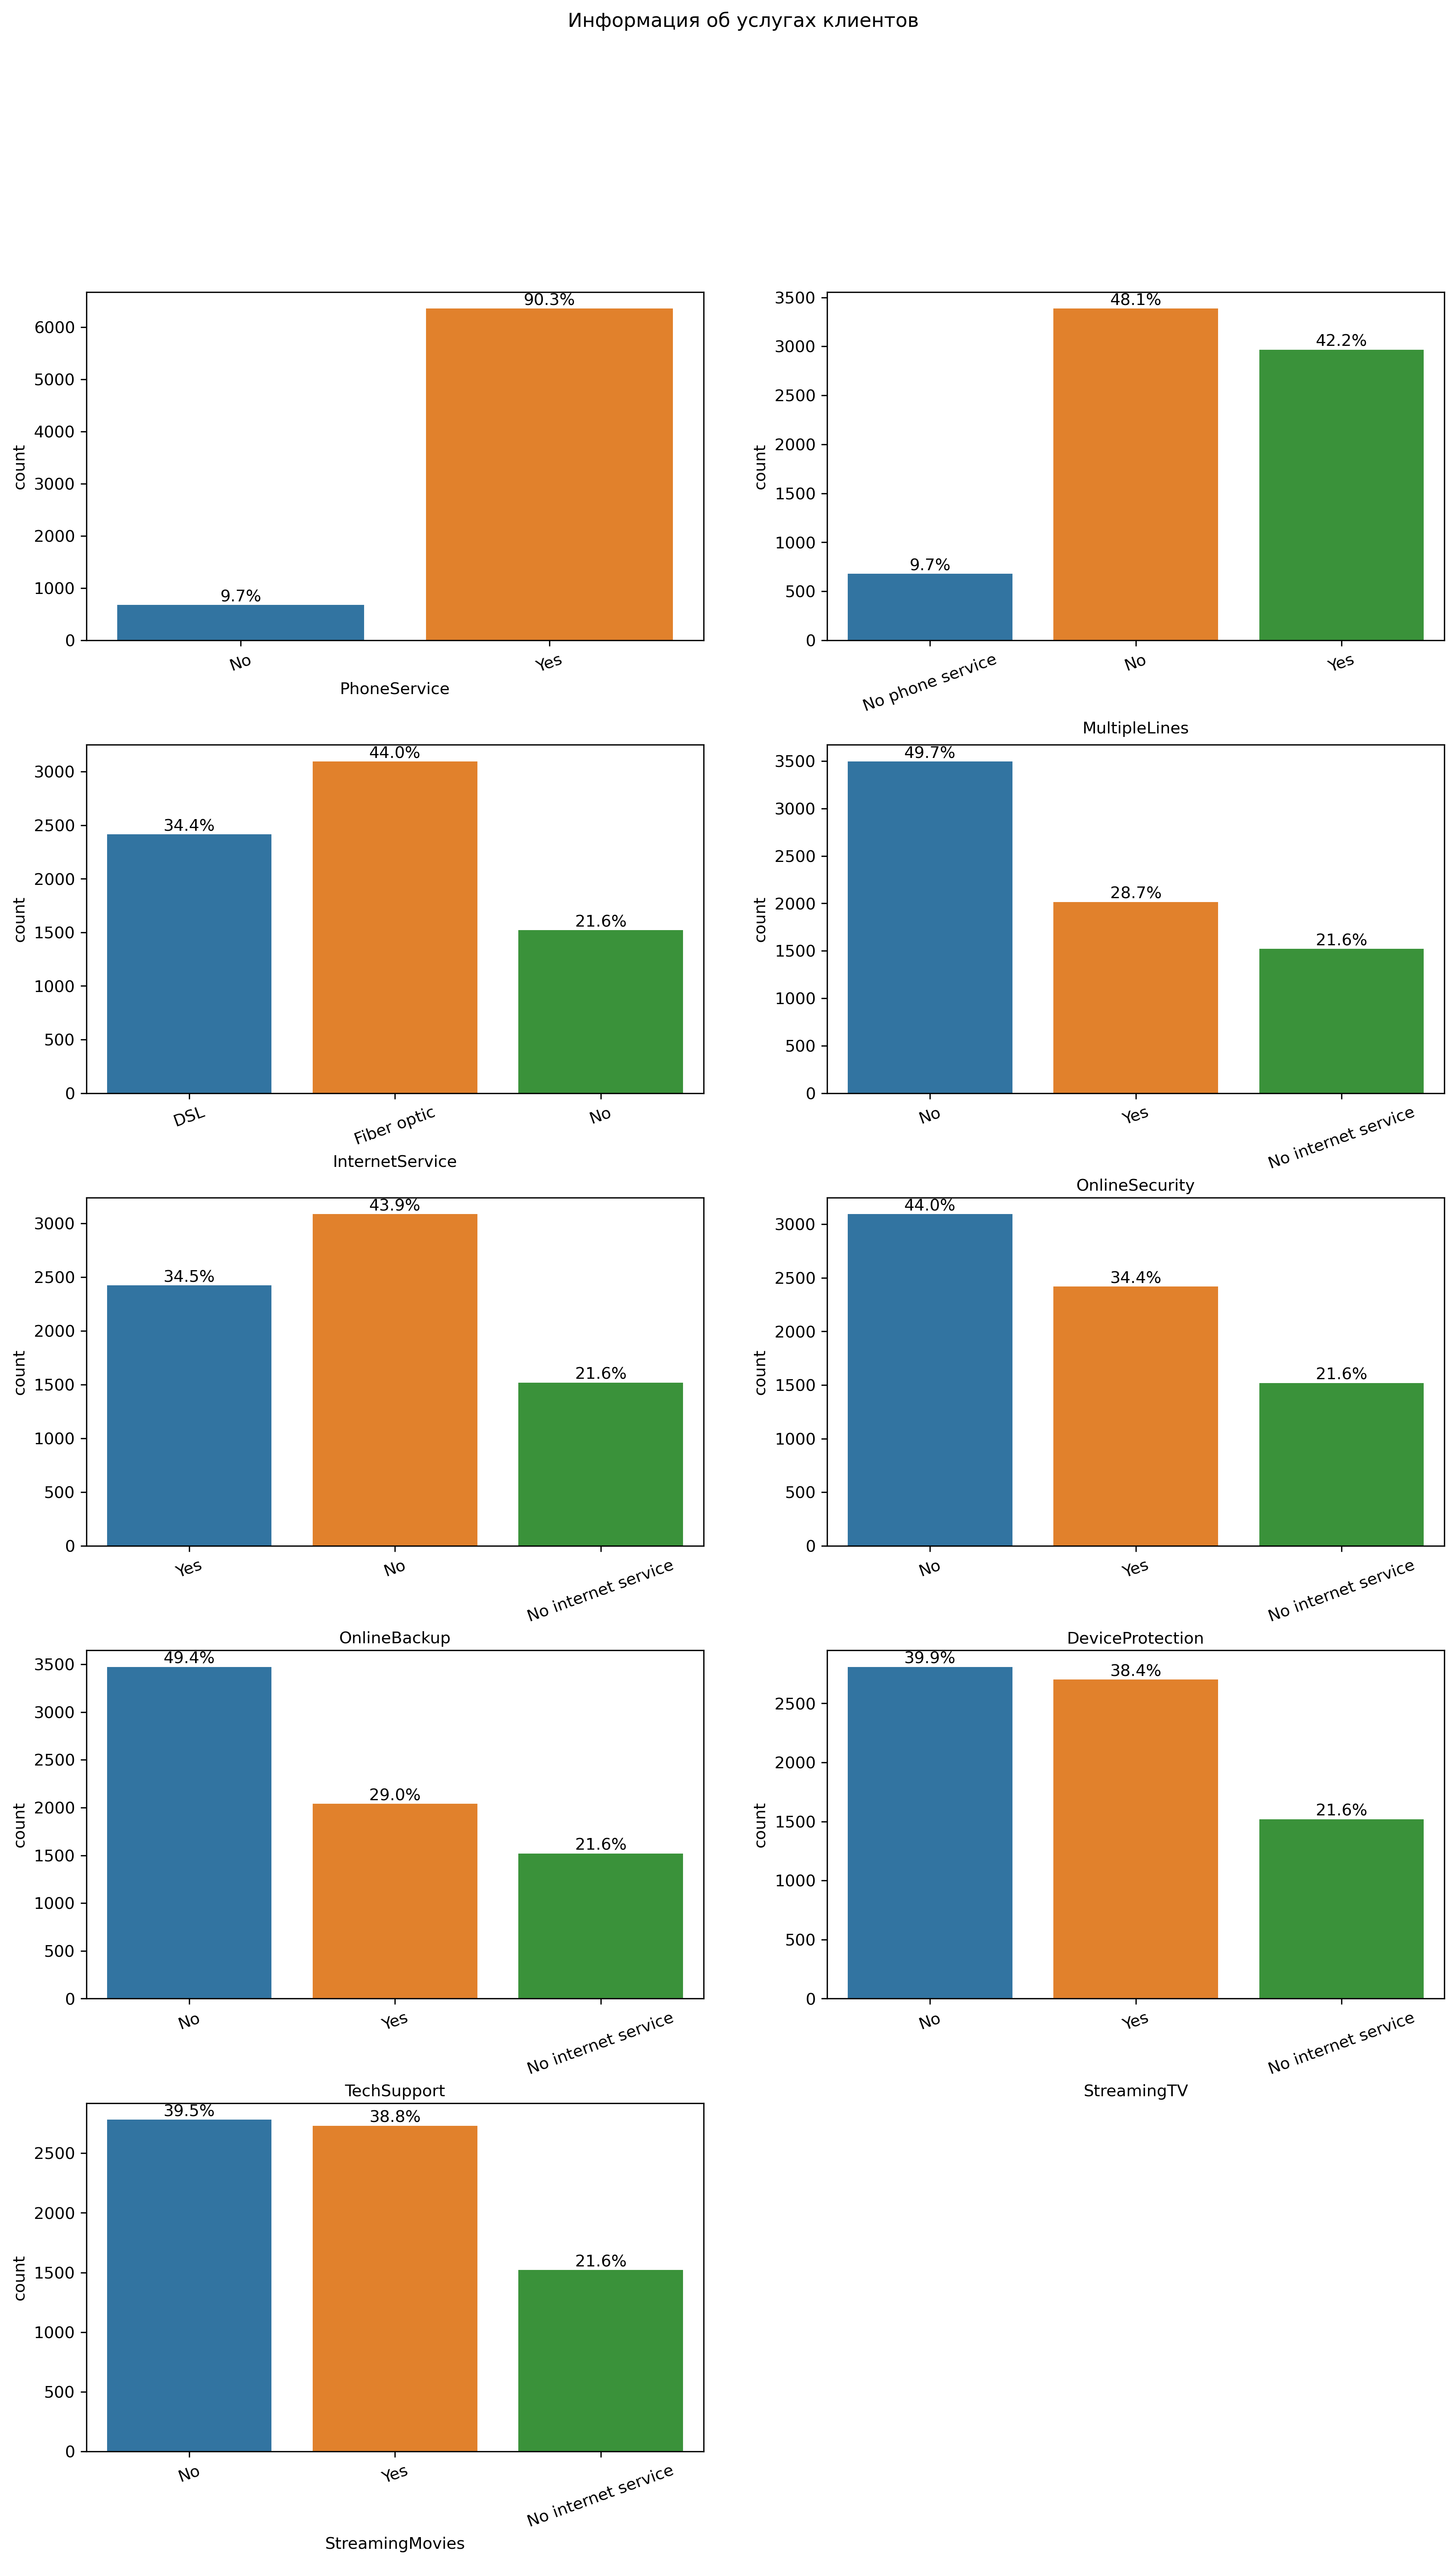

In [10]:
customer_service_information_columns = df[['PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                                'StreamingMovies']]

def customer_service_information(data, figsize=(15,24)):
    num_columns = len(customer_service_information_columns.columns)
    num_rows = (num_columns - 1) // 2 + 1

    fig = plt.figure(figsize=figsize, dpi=300)
    fig.suptitle('Информация об услугах клиентов')
    for i, column in enumerate(customer_service_information_columns.columns):
        ax = fig.add_subplot(num_rows, 2, i+1)
        sns.countplot(data=customer_service_information_columns, x=column, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        
        # Подсчет процентов и добавление их на график
        total = float(len(customer_service_information_columns))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.subplots_adjust(hspace = 0.3)    
    plt.show()
    
customer_service_information(df)

- Услугами телефонии пользуются 90.3% клиентов;
- 9.7% клиентов не подключают телефонные услуги;
- Количество клиентов которые подключают сразу несколько услуг и кто не подключает, практически одинаково;
- 44% клиентов предпочитают подключать Интернет с помощью волоконно-оптическую связь. 34.4% подключают Интернет с помощью DSL. 21.6% клиентов не подключают Интернет-услуги;
- Большинство клиентов не используют онлайн-безопасность, резервное копирование, защиту устройства и техническую поддержку;

**Распредление по целевой переменной Churn**

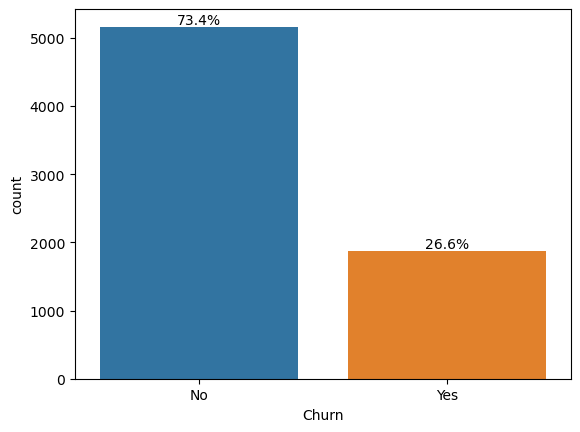

In [11]:
ax = sns.countplot(data=df, x='Churn')
total = len(df)

# Добавление процентов к каждому столбцу
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

- Большинство клиентов не отточные - 73.4%;
- Отточных клиентов 26.6%; 
- Классы целевой переменной несбалансированы.

# 

<a id="4.1.4"></a>

### <b>4.1.4 <span style='color:#422e13;font-family:cursive;'>|</span> Исследование распределения общих и ежемесячных платежей. Анализ выбросов.</b>



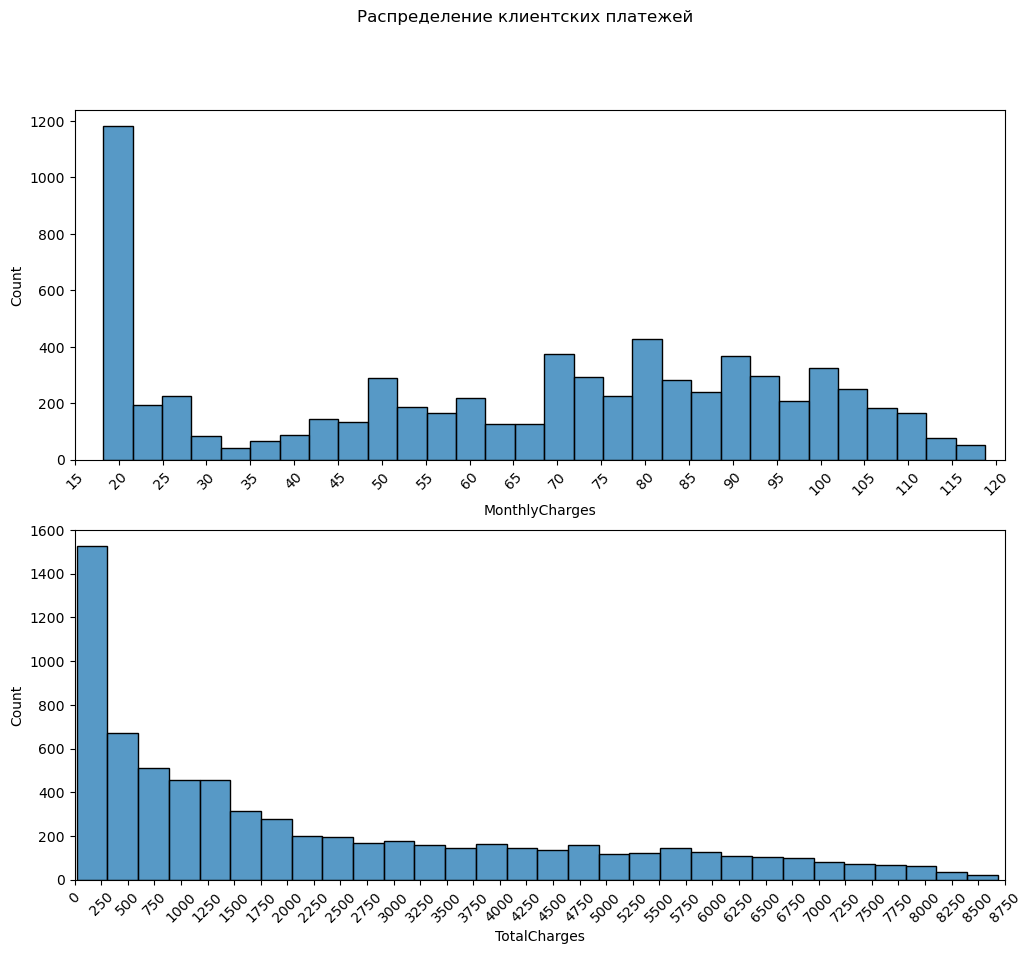

In [12]:
fig, ax = plt.subplots(2,1,figsize=(12,10)) 
fig.suptitle('Распределение клиентских платежей')

sns.histplot(data=df,x='MonthlyCharges',ax=ax[0],bins=30)
ax[0].set_xticks(list(range(15,121,5)))
ax[0].set_xticklabels(list(range(15,121,5)),rotation=45)
ax[0].set_xlim(15,121)

sns.histplot(data=df,x='TotalCharges',ax=ax[1],bins=30)
ax[1].set_xticks(list(range(0,8751,250)))
ax[1].set_xticklabels(list(range(0,8751,250)),rotation=45)
ax[1].set_xlim(0,8751)

plt.show()

- Наибольшее количество ежемесячных платежей до 220 долларов;
- Наибольшее количество общих платежей до 300 долларов.

# 

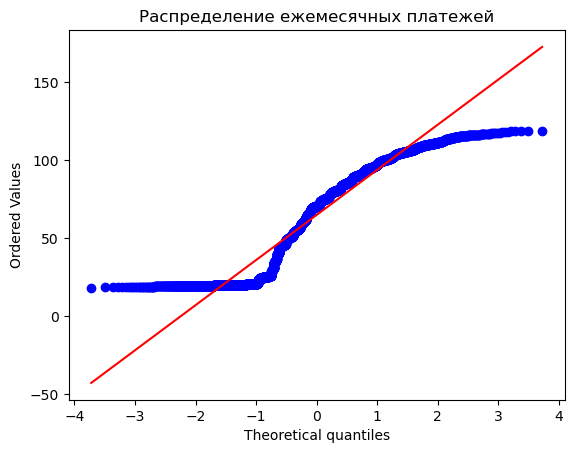

In [13]:
measurements = df['MonthlyCharges']
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title('Распределение ежемесячных платежей')
pylab.show()

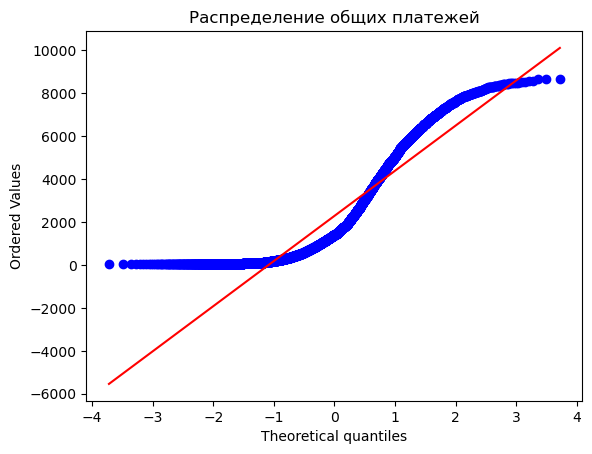

In [14]:
measurements = df['TotalCharges']
stats.probplot(measurements, dist="norm", plot=pylab)
plt.title('Распределение общих платежей')
pylab.show()

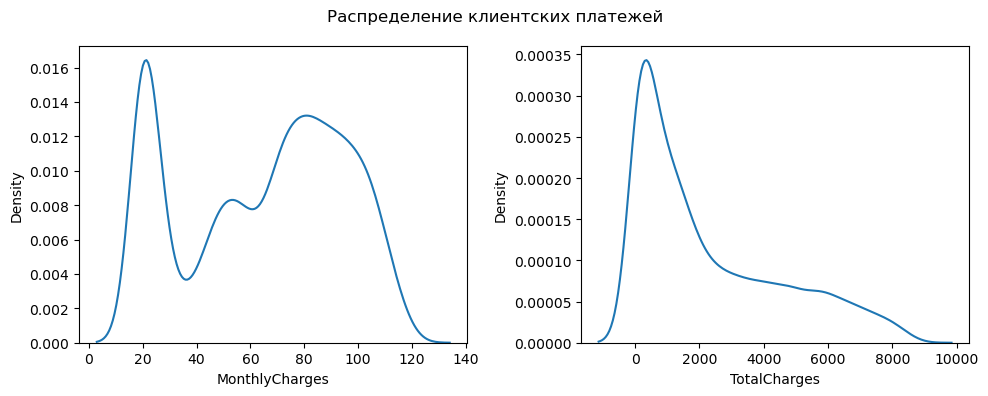

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,4)) 
fig.suptitle('Распределение клиентских платежей')

sns.kdeplot(data=df, x='MonthlyCharges',ax=ax[0])
sns.kdeplot(data=df, x='TotalCharges',ax=ax[1])

plt.tight_layout()
plt.show()



- Распределение ежемесячных и общих платежей не является нормальным. 

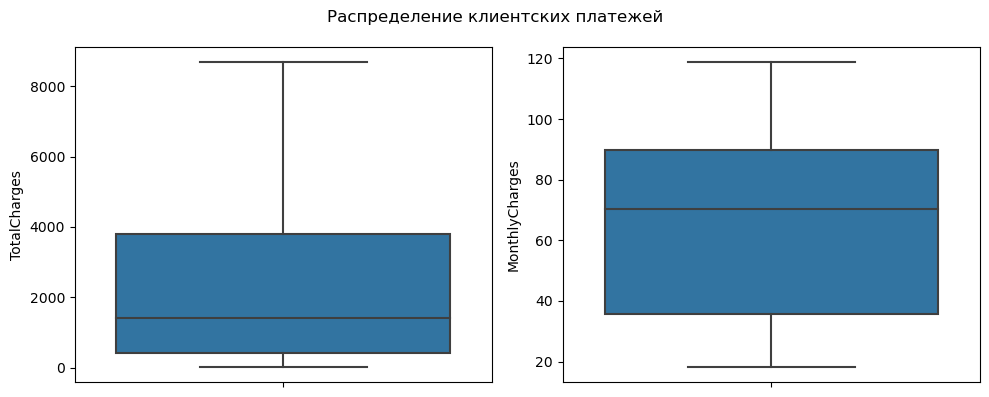

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,4)) 
fig.suptitle('Распределение клиентских платежей')

sns.boxplot(data=df, y='TotalCharges',ax=ax[0])
sns.boxplot(data=df, y='MonthlyCharges',ax=ax[1])

plt.tight_layout()
plt.show()



- Выбросов среди ежемесячных и общих платежей не наблюдается.

# 

<a id="4.2"></a>

## <b>4.2 <span style='color:#422e13;font-family:cursive;'>|</span> Двумерный анализ данных. Поиск корреляций.</b>

<a id="4.2.1"></a>

### <b>4.2.1 <span style='color:#422e13;font-family:cursive;'>|</span> Зависимость отточности клиентов от демографических данных</b>

In [17]:
# Напишем функцию для группировки данных в зависимости от того является ли клиент отточным или нет
def group_data(data,column):
    grouped_churn_yes = df[df['Churn']=='Yes'] \
                                            .groupby(column)['customerID'] \
                                            .agg(['count']) \
                                            .reset_index()
    grouped_churn_yes = grouped_churn_yes \
                                            .rename(columns={'count':'Количество отточных клиентов'})
    grouped_churn_yes['% отточных клиентов'] = round((grouped_churn_yes['Количество отточных клиентов']/len(df))*100)
    
    grouped_churn_no = df[df['Churn']=='No'] \
                                            .groupby(column)['customerID'] \
                                            .agg(['count']) \
                                            .reset_index()
    grouped_churn_no = grouped_churn_no \
                                            .rename(columns={'count':'Количество не отточных клиентов'})
    grouped_churn_no['% не отточных клиентов'] = round((grouped_churn_no['Количество не отточных клиентов']/len(df))*100)

    final_group = grouped_churn_yes
    final_group['Количество не отточных клиентов'] = grouped_churn_no['Количество не отточных клиентов']
    final_group['% не отточных клиентов'] = grouped_churn_no['% не отточных клиентов']
    
    return final_group


# 

In [18]:
group_data(data = df, column = 'gender') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [19]:
conversion_female = round((939/(2544+939))*100,2)
conversion_male = round((930/(2619+930))*100,2)

print(f'Конверсия отточности клиентов женского пола: {conversion_female}%')
print(f'Конверсия отточности клиентов мужского пола: {conversion_male}%')

Конверсия отточности клиентов женского пола: 26.96%
Конверсия отточности клиентов мужского пола: 26.2%


# 

In [20]:
group_data(data = df, column = 'SeniorCitizen') \
                                                 .style.background_gradient(cmap='Greens', low=1)

In [21]:
conversion_SeniorCitizen_no = round((1393/(4497+1393))*100,2)
conversion_SeniorCitizen_yes = round((476/(666+476))*100,2)

print(f'Конверсия отточности не пожилых клиентов: {conversion_SeniorCitizen_no}%')
print(f'Конверсия отточности пожилых клиентов: {conversion_SeniorCitizen_yes}%')

Конверсия отточности не пожилых клиентов: 23.65%
Конверсия отточности пожилых клиентов: 41.68%


# 

In [22]:
group_data(data = df, column = 'Partner') \
                                           .style.background_gradient(cmap='Greens', low=1)

In [23]:
conversion_no_partner = round((1200/(2439+1200))*100,2)
conversion_partner = round((669/(2724+669))*100,2)

print(f'Конверсия отточности клиентов без партнера: {conversion_no_partner}%')
print(f'Конверсия отточности клиентов с партнером: {conversion_partner}%')

Конверсия отточности клиентов без партнера: 32.98%
Конверсия отточности клиентов с партнером: 19.72%


# 

In [24]:
group_data(data = df, column = 'Dependents') \
                                              .style.background_gradient(cmap='Greens', low=1)

In [25]:
conversion_no_dependents = round((1543/(3390+1543))*100,2)
conversion_dependents = round((326/(1773+326))*100,2)

print(f'Конверсия отточности клиентов не иждивенцев: {conversion_no_dependents}%')
print(f'Конверсия отточности клиентов иждивенцев: {conversion_dependents}%')

Конверсия отточности клиентов не иждивенцев: 31.28%
Конверсия отточности клиентов иждивенцев: 15.53%


# 

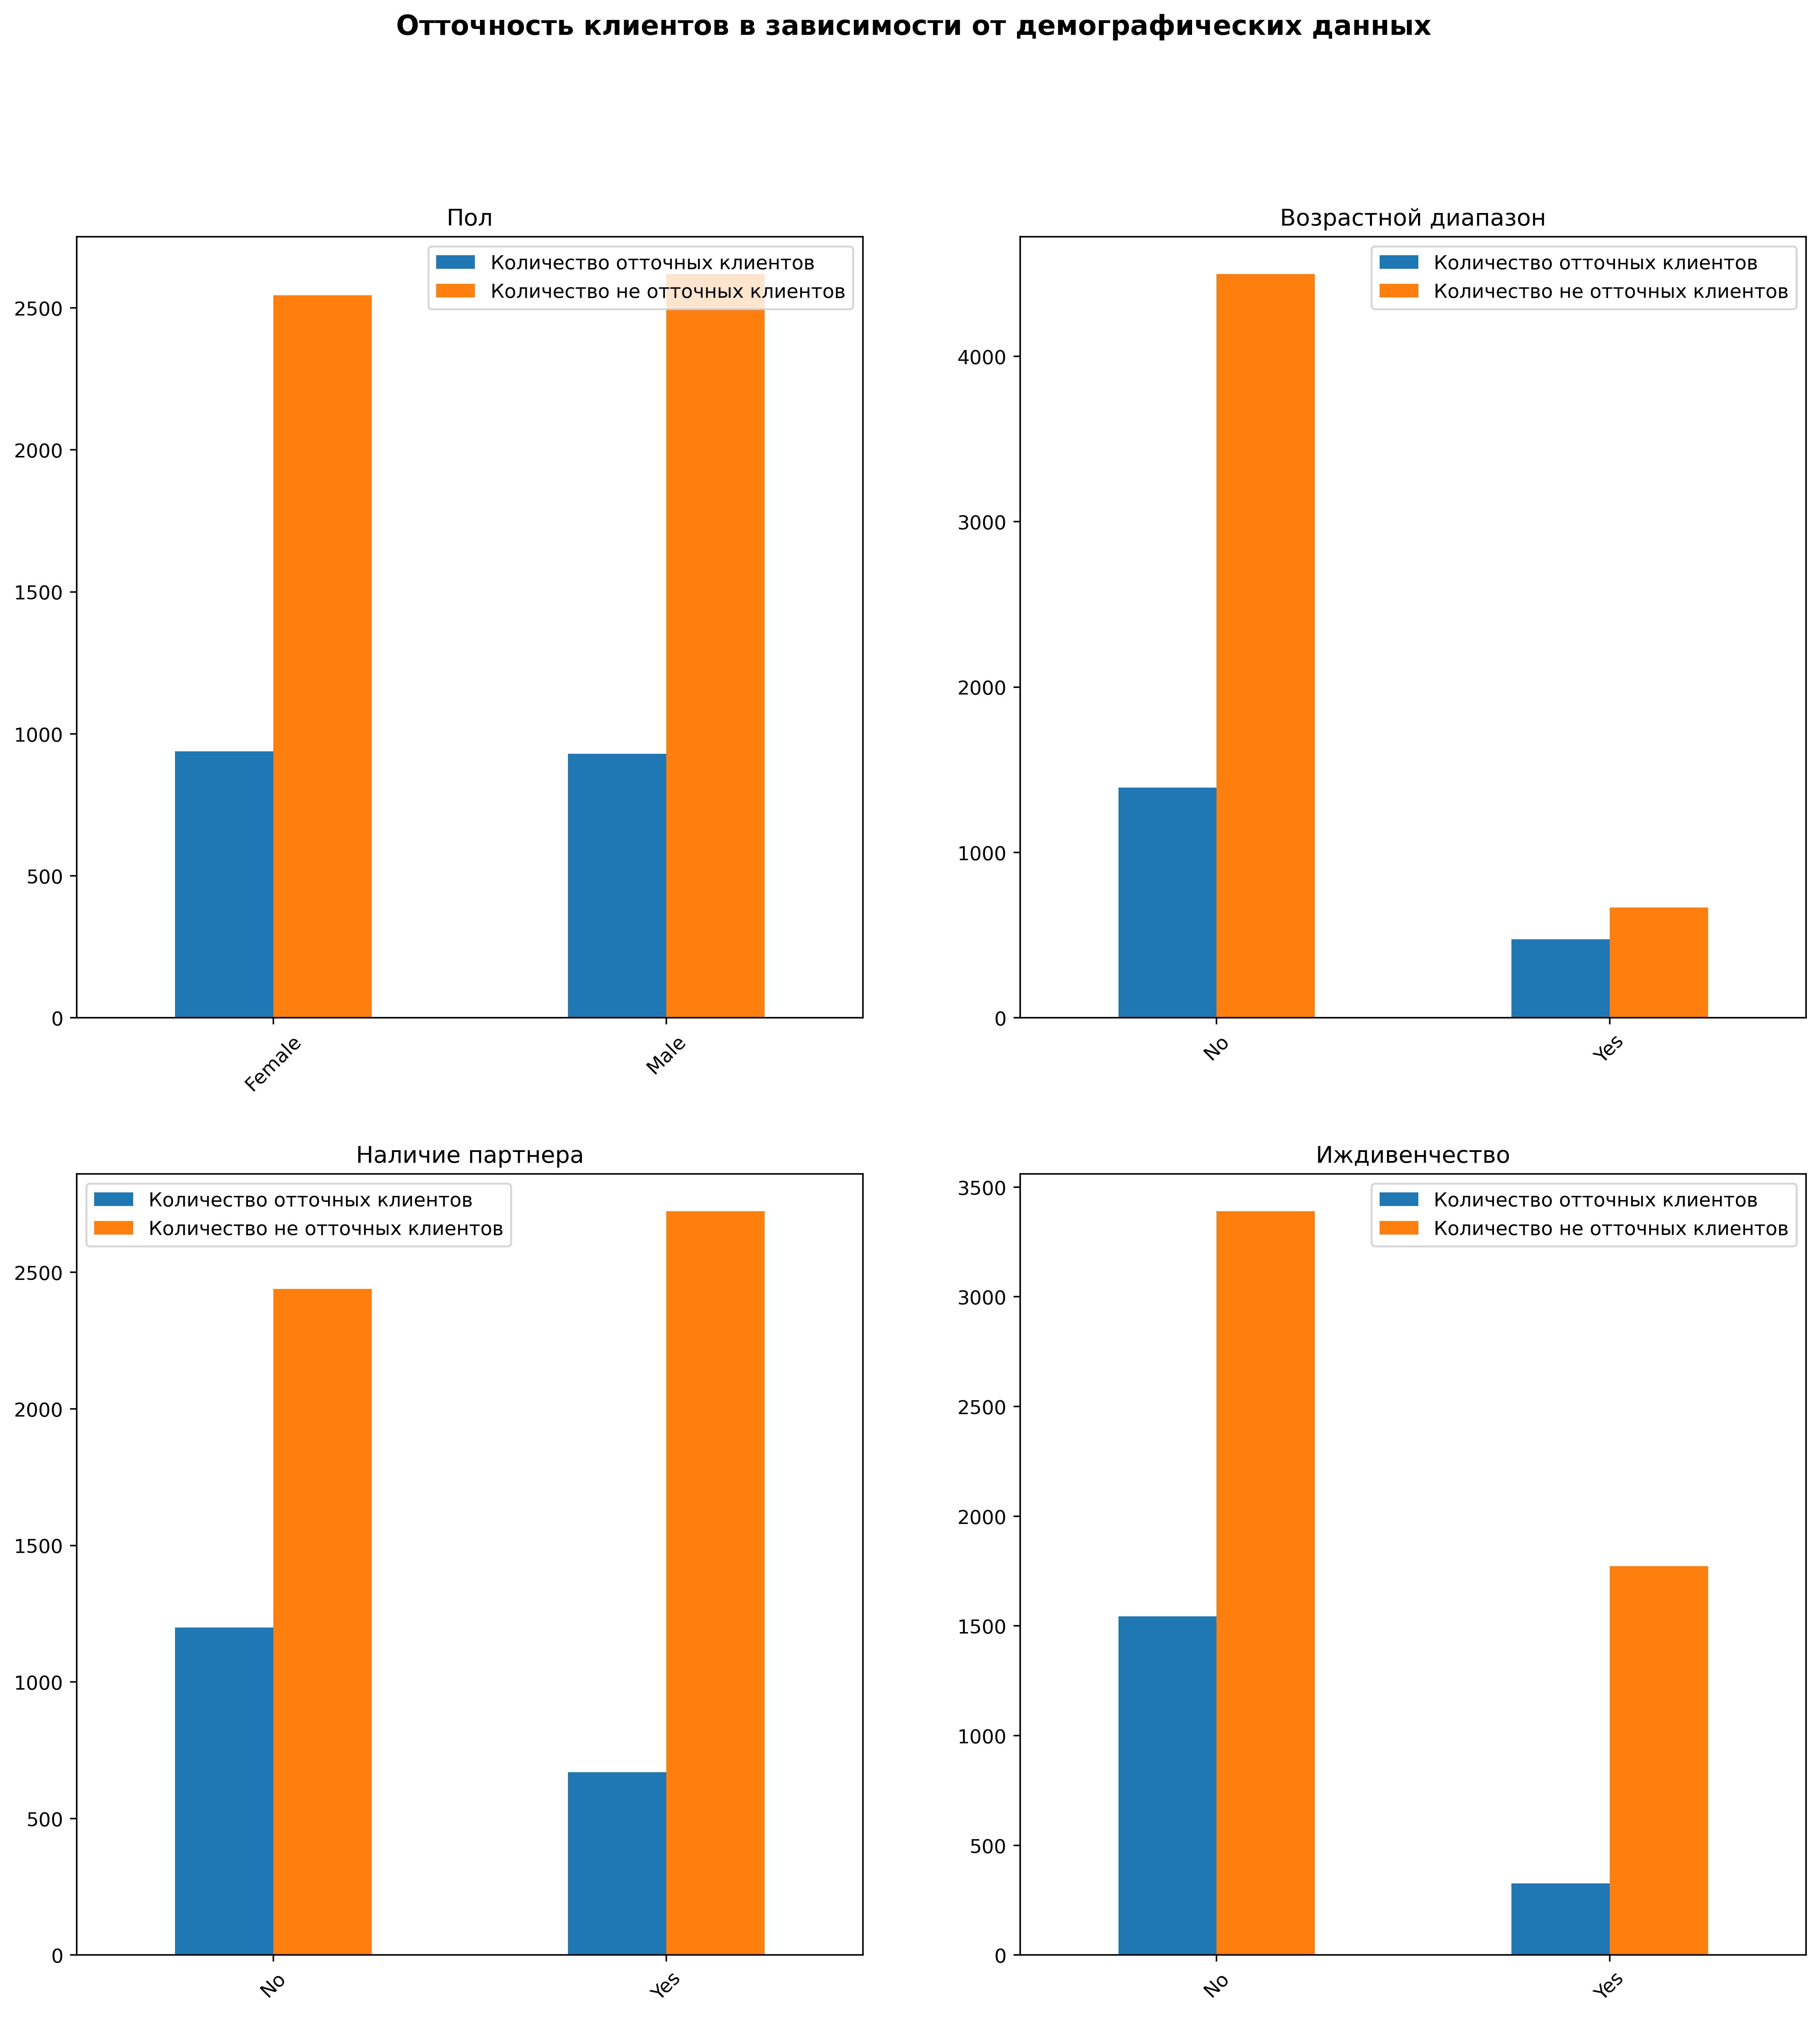

In [26]:
# напишем функцию для отображения зависимости отточности клиентов от демографических данных
def plot_demographic_information(data, figsize=(16, 16)):
    demographic_columns = data.columns

    fig, ax = plt.subplots(2, 2, figsize=figsize,dpi=400)
    fig.suptitle('Отточность клиентов в зависимости от демографических данных', fontsize=14, fontweight='bold')

    counter = 0
    for i in range(2):
        for j in range(2):
            gender_group = group_data(data=data, column=demographic_columns[counter])
            gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                               .plot(kind='bar', ax=ax[i,j])
            if demographic_columns[counter] == 'SeniorCitizen':
                ax[i, j].set_title('Возрастной диапазон')
                ax[i, j].set_xticklabels(['No', 'Yes'], rotation=45)
                
            elif demographic_columns[counter] == 'gender':
                ax[i, j].set_title('Пол')
                ax[i, j].set_xticklabels(['Female', 'Male'], rotation=45)

            elif demographic_columns[counter] == 'Dependents':
                ax[i, j].set_title('Иждивенчество')
                ax[i, j].set_xticklabels(['No', 'Yes'], rotation=45)
                
            elif demographic_columns[counter] == 'Partner':
                ax[i, j].set_title('Наличие партнера')
                ax[i, j].set_xticklabels(['No', 'Yes'], rotation=45)
            
            counter += 1

    plt.show()

plot_demographic_information(data=demographic_columns)

# 

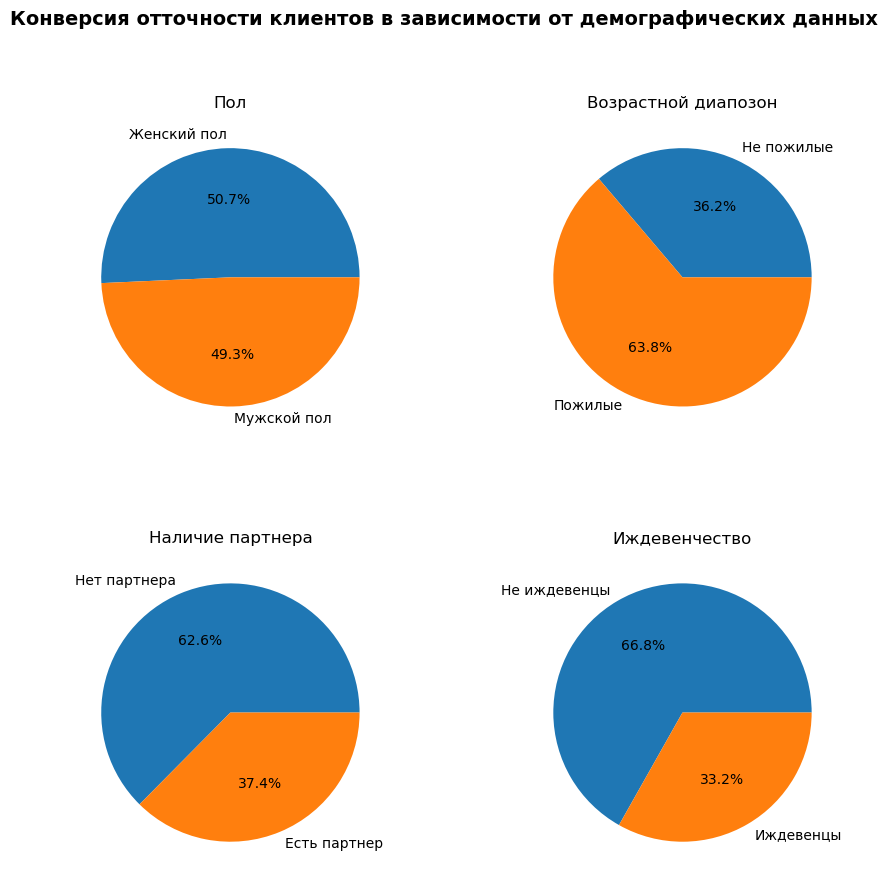

In [27]:
# напишем функцию для отображения конверсии оттока клиентов в зависимости от демографической информации
def conversion_plot_demographic(data, figsize = (10,10)):
    fig,ax = plt.subplots(2,2,figsize=figsize)
    fig.suptitle('Конверсия отточности клиентов в зависимости от демографических данных', fontsize=14, fontweight='bold')

    labels_gender = ['Женский пол', 'Мужской пол']
    sizes_gender = [conversion_female,conversion_male]              
    ax[0,0].pie(sizes_gender, labels=labels_gender, autopct='%1.1f%%')
    ax[0,0].set_title('Пол')

    labels_SeniorCitizen = ['Не пожилые', 'Пожилые']
    sizes_SeniorCitizen = [conversion_SeniorCitizen_no,conversion_SeniorCitizen_yes]
    ax[0,1].pie(sizes_SeniorCitizen, labels=labels_SeniorCitizen, autopct='%1.1f%%')
    ax[0,1].set_title('Возрастной диапозон')

    labels_partner = ['Нет партнера', 'Есть партнер']
    sizes_partner = [conversion_no_partner,conversion_partner]                   
    ax[1,0].pie(sizes_partner, labels=labels_partner, autopct='%1.1f%%')
    ax[1,0].set_title('Наличие партнера')

    labels_dependents = ['Не иждевенцы', 'Иждевенцы']
    sizes_dependents = [conversion_no_dependents,conversion_dependents]                        
    ax[1,1].pie(sizes_dependents, labels=labels_dependents, autopct='%1.1f%%')
    ax[1,1].set_title('Иждевенчество')

    plt.subplots_adjust(hspace=0.3,wspace=0.4)
    plt.show()
    
conversion_plot_demographic(data = demographic_columns)

- Выводы по конверсии отточности клиентов в зависимости от демографических данных:
    1. Нет зависимости отточности клиентов от пола. Конверсия отточности по клиентам мужского и женского пола одинакова;
    2. Среди пожилых клиентов больше конверсия отточности, нежели не пожилых;
    3. Клиенты, у которых нет партнера, больше предвержены к оттоку;
    4. Клиенты, которые не являются иждевенцами, больше предвержены к оттоку.

#

<a id="4.2.2"></a>

### <b>4.2.2 <span style='color:#422e13;font-family:cursive;'>|</span> Зависимость отточности клиентов от информации об учетной записи клиента</b>

In [28]:
pd.set_option('display.max_rows', 75)

In [29]:
group_data(data = df, column = 'tenure') \
                                          .style.background_gradient(cmap='Greens', low=1)

# 

In [30]:
group_data(data = df, column = 'Contract') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [31]:
conversion_month_to_month = round(((1655/(1655+2220))*100),2)
conversion_month_one_year = round(((166/(166+1306))*100),2)
conversion_month_two_year = round(((48/(48+1637))*100),2)

print(f'Конверсия отточности по контракту Month-to-month: {conversion_month_to_month}%')
print(f'Конверсия отточности по контракту One year: {conversion_month_one_year}%')
print(f'Конверсия отточности по контракту Two year: {conversion_month_two_year}%')

Конверсия отточности по контракту Month-to-month: 42.71%
Конверсия отточности по контракту One year: 11.28%
Конверсия отточности по контракту Two year: 2.85%


# 

In [32]:
group_data(data = df, column = 'PaymentMethod') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [33]:
conversion_bank_transfer = round(((258/(258+1284))*100),2)
conversion_credit_card = round(((232/(232+1289))*100),2)
conversion_electronic_card = round(((1071/(1071+1294))*100),2)
conversion_mailed = round(((308/(308+1296))*100),2)

print(f'Конверсия отточности по банковским переводам: {conversion_bank_transfer}%')
print(f'Конверсия отточности по кредитной карте: {conversion_credit_card}%')
print(f'Конверсия отточности по электронному чеку: {conversion_electronic_card}%')
print(f'Конверсия отточности по почтовому чеку: {conversion_mailed}%')

Конверсия отточности по банковским переводам: 16.73%
Конверсия отточности по кредитной карте: 15.25%
Конверсия отточности по электронному чеку: 45.29%
Конверсия отточности по почтовому чеку: 19.2%


# 

In [34]:
group_data(data = df, column = 'PaperlessBilling') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [35]:
conversion_no_billing = round(((1400/(1400+2768))*100),2)
conversion_billing = round(((469/(469+2395))*100),2)


print(f'Конверсия отточности по клиентам, которые не предпочитают безбумажный биллинг: {conversion_no_billing}%')
print(f'Конверсия отточности по клиентам, которые предпочитают безбумажный биллинг: {conversion_billing}%')


Конверсия отточности по клиентам, которые не предпочитают безбумажный биллинг: 33.59%
Конверсия отточности по клиентам, которые предпочитают безбумажный биллинг: 16.38%


# 

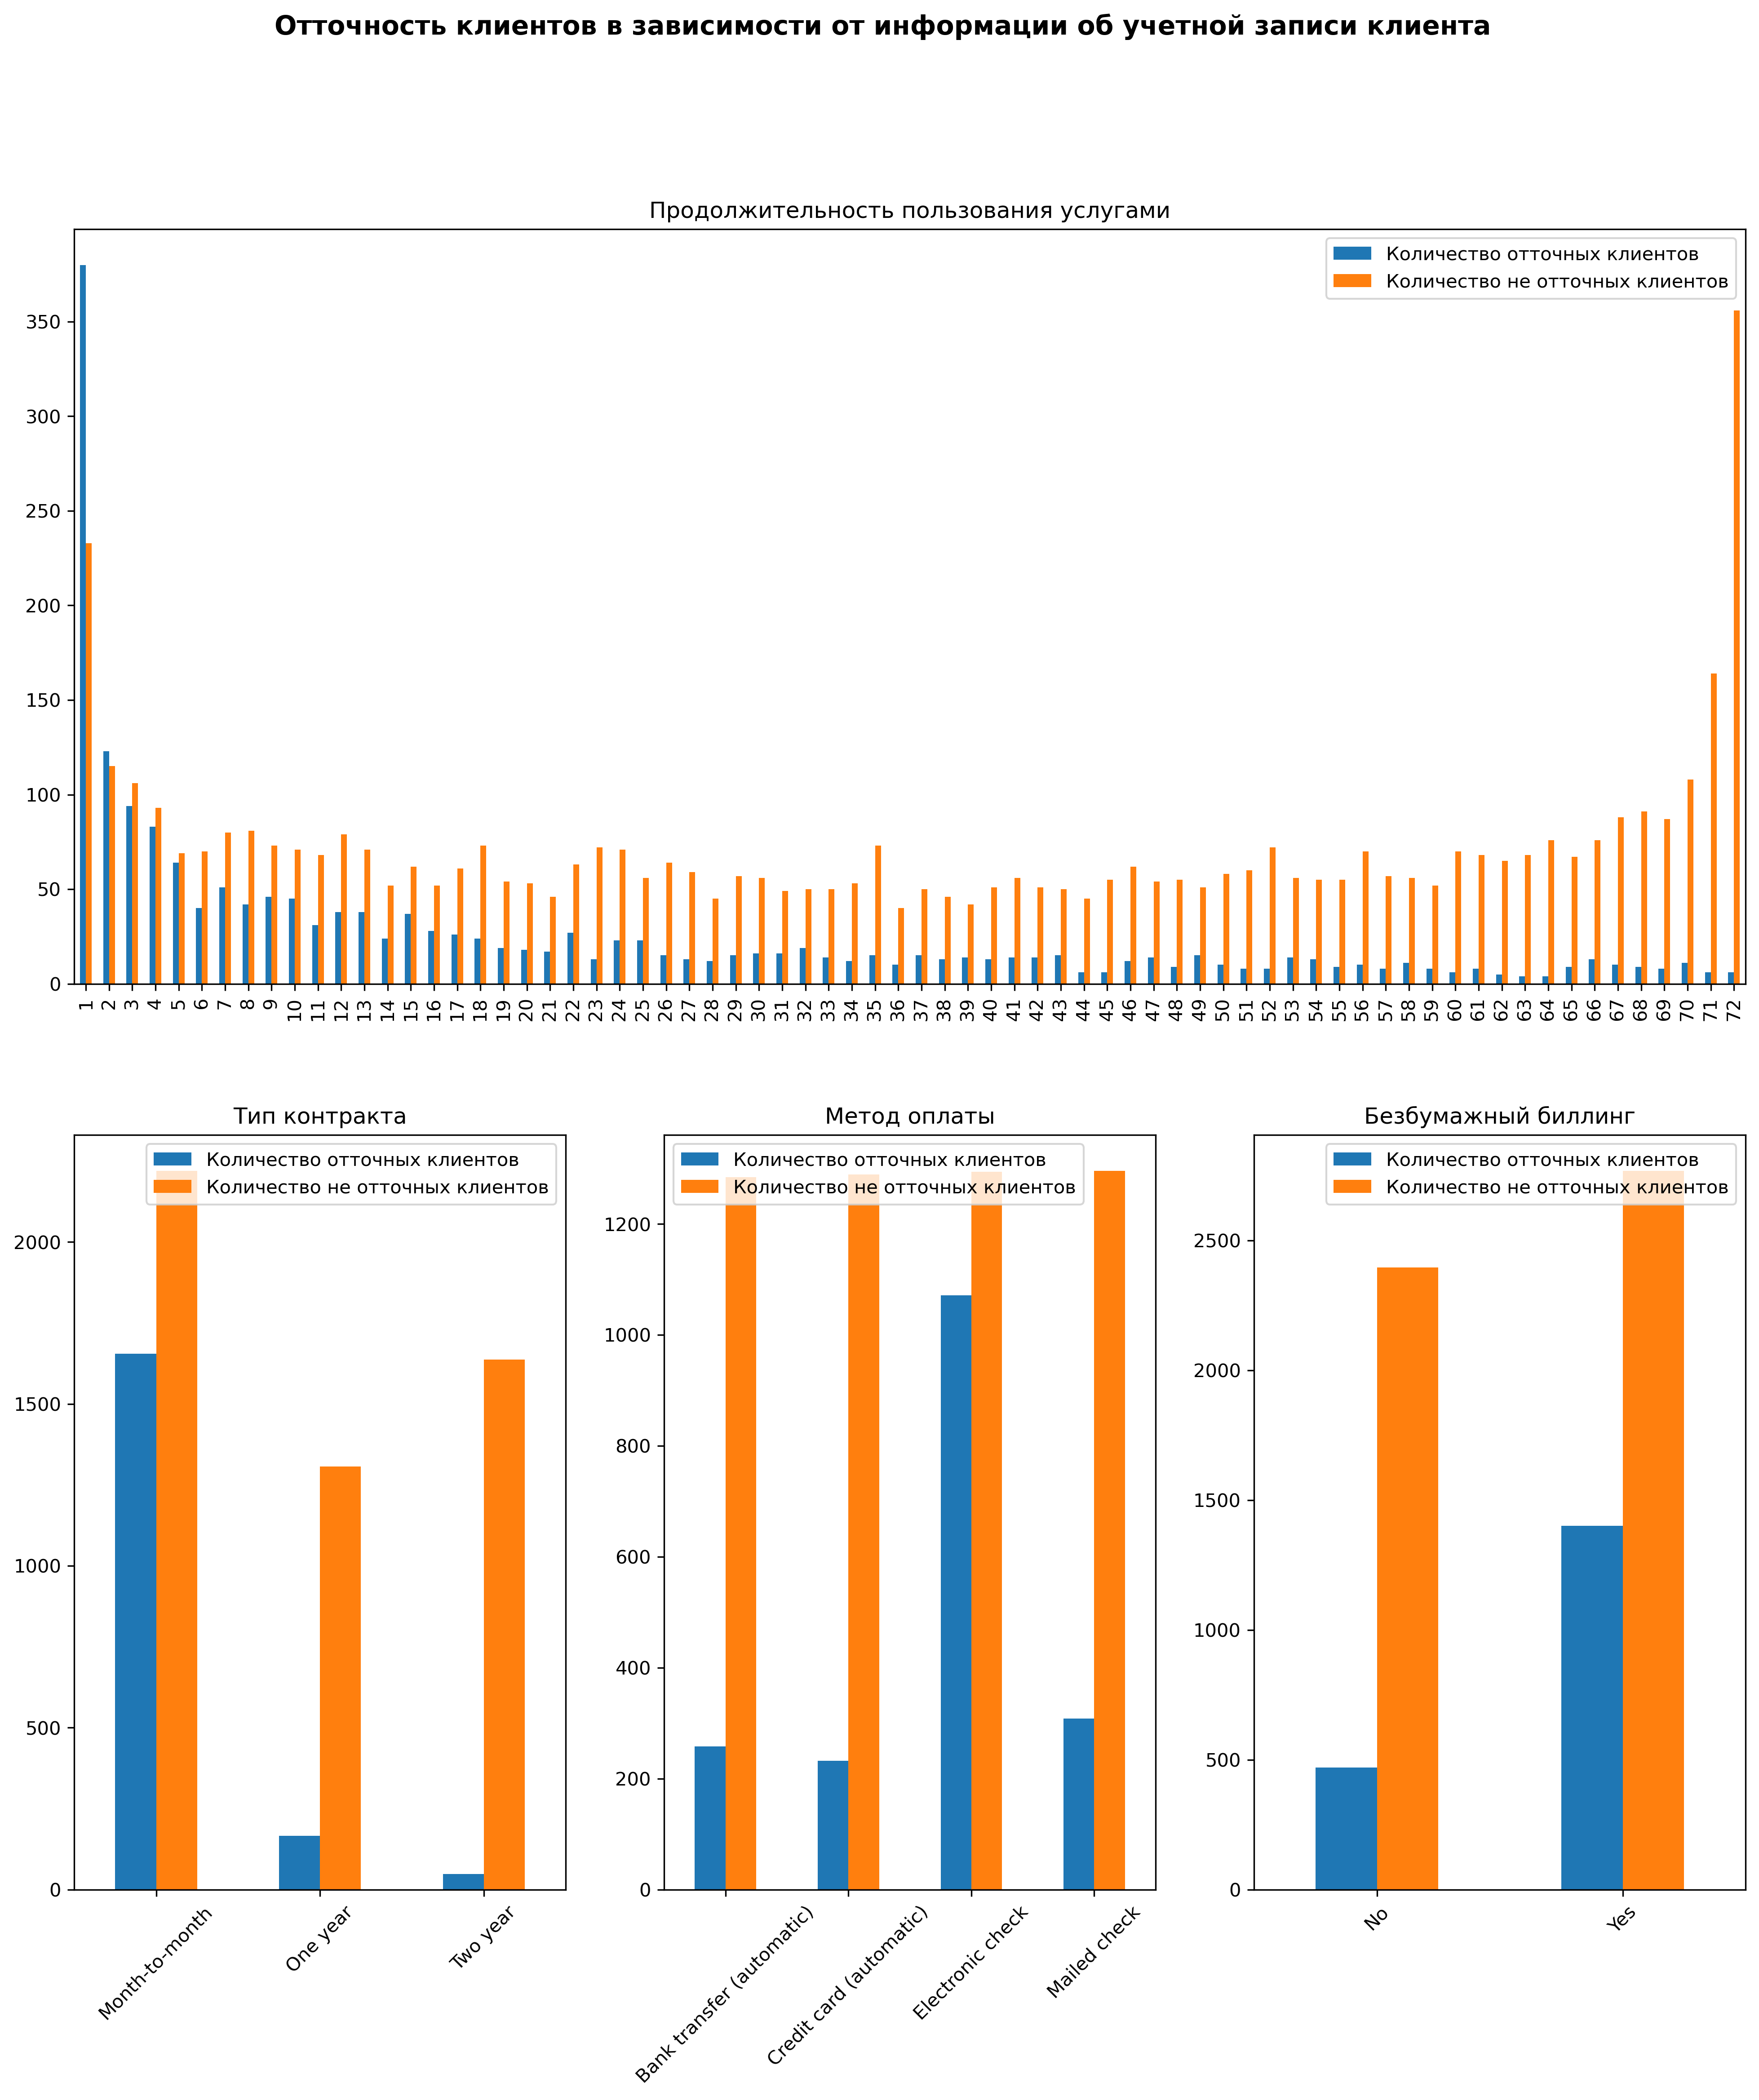

In [36]:
# напишем функцию для отображения зависимости отточности клиентов от предпочитаемых услуг
def plot_customer_information(data, figsize=(16, 16)):
    customer_columns = data.columns

    fig = plt.figure(figsize=figsize, dpi=300)
    ax1 = fig.add_subplot(2, 3, (1, 3))
    ax2 = fig.add_subplot(2, 3, 4)
    ax3 = fig.add_subplot(2, 3, 5)
    ax4 = fig.add_subplot(2, 3, 6)
    fig.suptitle('Отточность клиентов в зависимости от информации об учетной записи клиента', fontsize=14, fontweight='bold')
    
    gender_group = group_data(data=data, column='tenure')
    gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                       .plot(kind='bar', ax=ax1)
    ax1.set_title('Продолжительность пользования услугами')
    ax1.set_xticklabels(list(range(1,73)), rotation=90)
                
    gender_group = group_data(data=data, column='Contract')
    gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                       .plot(kind='bar', ax=ax2)
    ax2.set_title('Тип контракта')
    ax2.set_xticklabels(['Month-to-month','One year','Two year'], rotation=45)

    gender_group = group_data(data=data, column='PaymentMethod')
    gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                       .plot(kind='bar', ax=ax3)
    ax3.set_title('Метод оплаты')
    ax3.set_xticklabels(['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check'], rotation=45)

    gender_group = group_data(data=data, column='PaperlessBilling')
    gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                       .plot(kind='bar', ax=ax4)
    ax4.set_title('Безбумажный биллинг')
    ax4.set_xticklabels(['No','Yes'], rotation=45)
            

    plt.show()

plot_customer_information(data = customer_account_information_columns)

# 

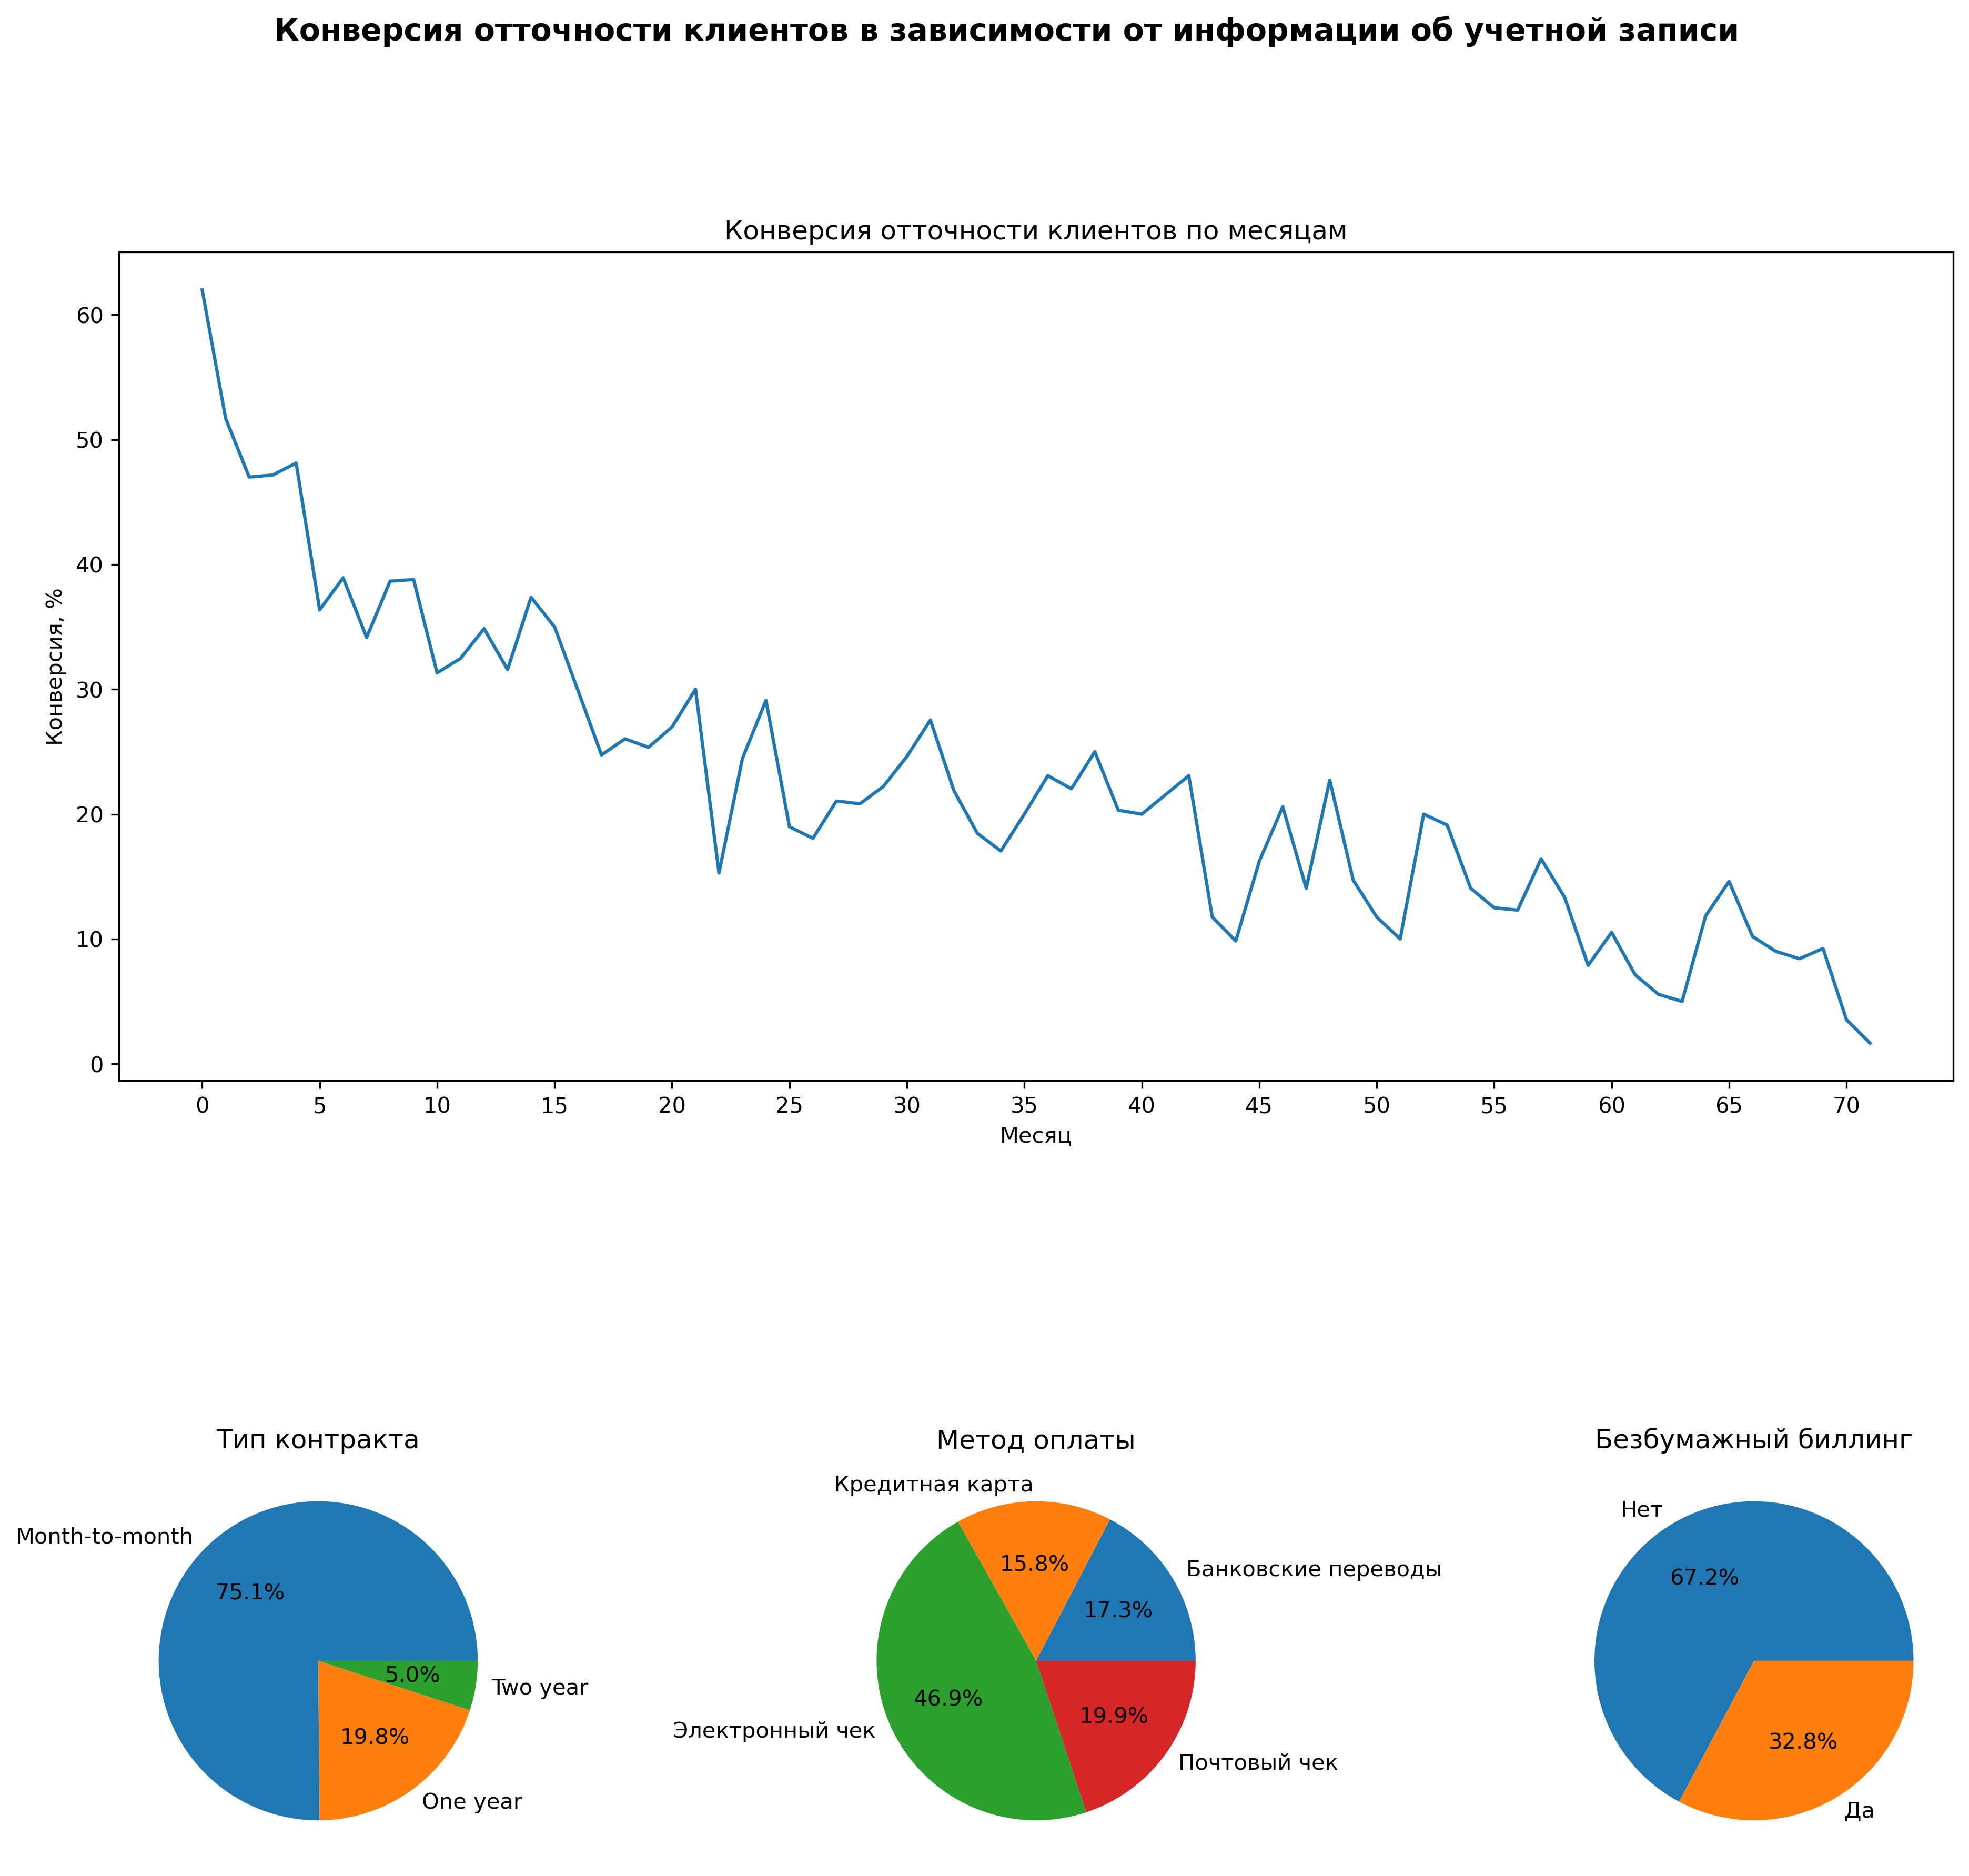

In [37]:
# напишем функцию для отображения конверсии оттока клиентов в зависимости от информации об учетной записи
def conversion_plot_customer_information(data, figsize = (15,15)):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax1 = fig.add_subplot(2, 2, (1, 2))
    ax2 = fig.add_subplot(2, 3, 4)
    ax3 = fig.add_subplot(2, 3, 5)
    ax4 = fig.add_subplot(2, 3, 6)
    fig.suptitle('Конверсия отточности клиентов в зависимости от информации об учетной записи', \
                                                                                fontsize=14, fontweight='bold')
    
    group_tenure = group_data(data = df, column = 'tenure')
    group_tenure['Конверсия'] = round((group_tenure['Количество отточных клиентов'] \
                                                            / (group_tenure['Количество не отточных клиентов'] \
                                                            + group_tenure['Количество отточных клиентов']))*100,2)
    group_tenure['Конверсия'].plot(ax=ax1)
    ax1.set_title('Конверсия отточности клиентов по месяцам')
    ax1.set_ylabel('Конверсия, %')
    ax1.set_xlabel('Месяц')
    ax1.set_xticks(list(range(0,75,5)))

    labels_SeniorCitizen = ['Month-to-month', 'One year','Two year']
    sizes_SeniorCitizen = [conversion_month_to_month,conversion_month_one_year,conversion_month_two_year]
    ax2.pie(sizes_SeniorCitizen, labels=labels_SeniorCitizen, autopct='%1.1f%%')
    ax2.set_title('Тип контракта')

    labels_method = ['Банковские переводы', 'Кредитная карта', 'Электронный чек', 'Почтовый чек']
    sizes_method = [conversion_bank_transfer,conversion_credit_card,conversion_electronic_card,conversion_mailed]                   
    ax3.pie(sizes_method, labels=labels_method, autopct='%1.1f%%')
    ax3.set_title('Метод оплаты')

    labels_billing = ['Нет', 'Да']
    sizes_billing = [conversion_no_billing,conversion_billing]                        
    ax4.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax4.set_title('Безбумажный биллинг')
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()
    
conversion_plot_customer_information(data = customer_account_information_columns)

- На графике видно что в текущий месяц была самая большая конверсия отточных клиентов;
- Наблюдается тренд, чем дольше клиент является покупателем услуг, тем меньше шансов что он будет отточным, что вполне логично;
- По типу контракта наибольшая конверсия оттока клиентов наблюдается в Month-to-month. То есть те клиенты, которые заключают краткосрочные контракты;
- По методу оплаты наблюдается наибольшаят отточность по тем клиентам, которые оплачивают электронным чеком;
- Клиенты, которые не предпочитают безбумажный биллинг, больше привержены к оттоку.

# 

<a id="4.2.3"></a>

### <b>4.2.3 <span style='color:#422e13;font-family:cursive;'>|</span> Зависимость отточности клиентов от предпочитаемых услуг</b>

In [38]:
group_data(data = df, column = 'PhoneService') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [39]:
conversion_no_PhoneService = round(((170/(170+510))*100),2)
conversion_yes_PhoneService = round(((1699/(1699+4653))*100),2)

print(f'Конверсия отточности по клиентам, не подключающих телефонные услуги: \
                                                            {conversion_no_PhoneService}%')
print(f'Конверсия отточности по клиентам, подключающих телефонные услуги: \
                                                            {conversion_yes_PhoneService}%')

Конверсия отточности по клиентам, не подключающих телефонные услуги:                                                             25.0%
Конверсия отточности по клиентам, подключающих телефонные услуги:                                                             26.75%


# 

In [40]:
group_data(data = df, column = 'MultipleLines') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [41]:
conversion_no_MultipleLines = round(((849/(849+2536))*100),2)
conversion_no_MultipleLines_all = round(((170/(170+510))*100),2)
conversion_yes_MultipleLines = round(((850/(850+2117))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших несколько линий в последний месяц: \
                                                            {conversion_no_MultipleLines}%')
print(f'Конверсия отточности по клиентам, не подключивших несколько линий вообще: \
                                                            {conversion_no_MultipleLines_all}%')
print(f'Конверсия отточности по клиентам, подключивших несколько линий в последний месяц: \
                                                            {conversion_yes_MultipleLines}%')

Конверсия отточности по клиентам, не подключивших несколько линий в последний месяц:                                                             25.08%
Конверсия отточности по клиентам, не подключивших несколько линий вообще:                                                             25.0%
Конверсия отточности по клиентам, подключивших несколько линий в последний месяц:                                                             28.65%


# 

In [42]:
group_data(data = df, column = 'InternetService') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [43]:
conversion_no_InternetService = round(((113/(113+1407))*100),2)
conversion_DSL = round(((459/(459+1957))*100),2) 
conversion_fiber_optic = round(((1297/(1297+1799))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших интернет услугу: {conversion_no_InternetService}%')
print(f'Конверсия отточности по клиентам, подключивших интерет-услугу DSL: {conversion_DSL}%')
print(f'Конверсия отточности по клиентам, подключивших интерет-услугу Fiber optic:{conversion_fiber_optic}%')

Конверсия отточности по клиентам, не подключивших интернет услугу: 7.43%
Конверсия отточности по клиентам, подключивших интерет-услугу DSL: 19.0%
Конверсия отточности по клиентам, подключивших интерет-услугу Fiber optic:41.89%


# 

In [44]:
group_data(data = df, column = 'OnlineSecurity') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [45]:
conversion_no_OnlineSecurity_no = round(((1461/(1461+2036))*100),2)
conversion_no_OnlineSecurity_all = round(((113/(113+1407))*100),2)
conversion_yes_OnlineSecurity = round(((295/(295+1720))*100),2)


print(f'Конверсия отточности по клиентам, не подключивших услугу онлайн-безопасности в последний месяц: \
                                                                    {conversion_no_OnlineSecurity_no}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу онлайн-безопасности вообще: \
                                                                    {conversion_no_OnlineSecurity_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугу онлайн-безопасности: \
                                                                    {conversion_yes_OnlineSecurity}%')

Конверсия отточности по клиентам, не подключивших услугу онлайн-безопасности в последний месяц:                                                                     41.78%
Конверсия отточности по клиентам, не подключивших услугу онлайн-безопасности вообще:                                                                     7.43%
Конверсия отточности по клиентам, подключивших услугу онлайн-безопасности:                                                                     14.64%


# 

In [46]:
group_data(data = df, column = 'OnlineBackup') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [47]:
conversion_no_OnlineBackup = round(((1233/(1233+1854))*100),2)
conversion_no_OnlineBackup_all = round(((113/(113+1407))*100),2)
conversion_yes_OnlineBackup = round(((523/(523+1902))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших услугу онлайн-резервного копирования в последний месяц: \
                                                            {conversion_no_OnlineBackup}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу онлайн-резервного копирования вообще: \
                                                            {conversion_no_OnlineBackup_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугу онлайн-резервного копирования: \
                                                            {conversion_yes_OnlineBackup}%')

Конверсия отточности по клиентам, не подключивших услугу онлайн-резервного копирования в последний месяц:                                                             39.94%
Конверсия отточности по клиентам, не подключивших услугу онлайн-резервного копирования вообще:                                                             7.43%
Конверсия отточности по клиентам, подключивших услугу онлайн-резервного копирования:                                                             21.57%


# 

In [48]:
group_data(data = df, column = 'DeviceProtection') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [49]:
conversion_no_DeviceProtection = round(((1211/(1211+1883))*100),2)
conversion_no_DeviceProtection_all = round(((113/(113+1407))*100),2)
conversion_yes_DeviceProtection = round(((545/(545+1873))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших услугу защиты устройства в последний месяц: \
                                                            {conversion_no_DeviceProtection}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу защиты устройства вообще: \
                                                            {conversion_no_DeviceProtection_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугу защиты устройства: \
                                                            {conversion_yes_DeviceProtection}%')

Конверсия отточности по клиентам, не подключивших услугу защиты устройства в последний месяц:                                                             39.14%
Конверсия отточности по клиентам, не подключивших услугу защиты устройства вообще:                                                             7.43%
Конверсия отточности по клиентам, подключивших услугу защиты устройства:                                                             22.54%


# 

In [50]:
group_data(data = df, column = 'TechSupport') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [51]:
conversion_no_TechSupport = round(((1446/(1446+2026))*100),2)
conversion_no_TechSupport_all = round(((113/(113+1407))*100),2)
conversion_yes_TechSupport = round(((310/(310+1730))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших услугу технической поддержки в последний месяц: \
                                                            {conversion_no_TechSupport}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу технической поддержки вообще: \
                                                            {conversion_no_TechSupport_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугуconversion_no_TechSupport_all технической поддержки: \
                                                            {conversion_yes_TechSupport}%')

Конверсия отточности по клиентам, не подключивших услугу технической поддержки в последний месяц:                                                             41.65%
Конверсия отточности по клиентам, не подключивших услугу технической поддержки вообще:                                                             7.43%
Конверсия отточности по клиентам, подключивших услугуconversion_no_TechSupport_all технической поддержки:                                                             15.2%


In [52]:
group_data(data = df, column = 'StreamingTV') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [53]:
conversion_no_StreamingTV = round(((942/(942+1867))*100),2)
conversion_no_StreamingTV_all = round(((113/(113+1407))*100),2)
conversion_yes_StreamingTV = round(((814/(814+1889))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших услугу потокового телевидения в последний месяц: \
                                                            {conversion_no_StreamingTV}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу потокового телевидения вообще: \
                                                            {conversion_no_StreamingTV_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугу потокового телевидения: \
                                                            {conversion_yes_StreamingTV}%')

Конверсия отточности по клиентам, не подключивших услугу потокового телевидения в последний месяц:                                                             33.54%
Конверсия отточности по клиентам, не подключивших услугу потокового телевидения вообще:                                                             7.43%
Конверсия отточности по клиентам, подключивших услугу потокового телевидения:                                                             30.11%


In [54]:
group_data(data = df, column = 'StreamingMovies') \
                                          .style.background_gradient(cmap='Greens', low=1)

In [55]:
conversion_no_StreamingMovies = round(((938/(938+1843))*100),2)
conversion_no_StreamingMovies_all = round(((113/(113+1407))*100),2)
conversion_yes_StreamingMovies = round(((818/(818+1913))*100),2)

print(f'Конверсия отточности по клиентам, не подключивших услугу потоковых фильмов в последний месяц: \
                                                            {conversion_no_StreamingMovies}%')
print(f'Конверсия отточности по клиентам, не подключивших услугу потоковых фильмов вообще: \
                                                            {conversion_no_StreamingMovies_all}%')
print(f'Конверсия отточности по клиентам, подключивших услугу потоковых фильмов: \
                                                            {conversion_yes_StreamingMovies}%')

Конверсия отточности по клиентам, не подключивших услугу потоковых фильмов в последний месяц:                                                             33.73%
Конверсия отточности по клиентам, не подключивших услугу потоковых фильмов вообще:                                                             7.43%
Конверсия отточности по клиентам, подключивших услугу потоковых фильмов:                                                             29.95%


# 

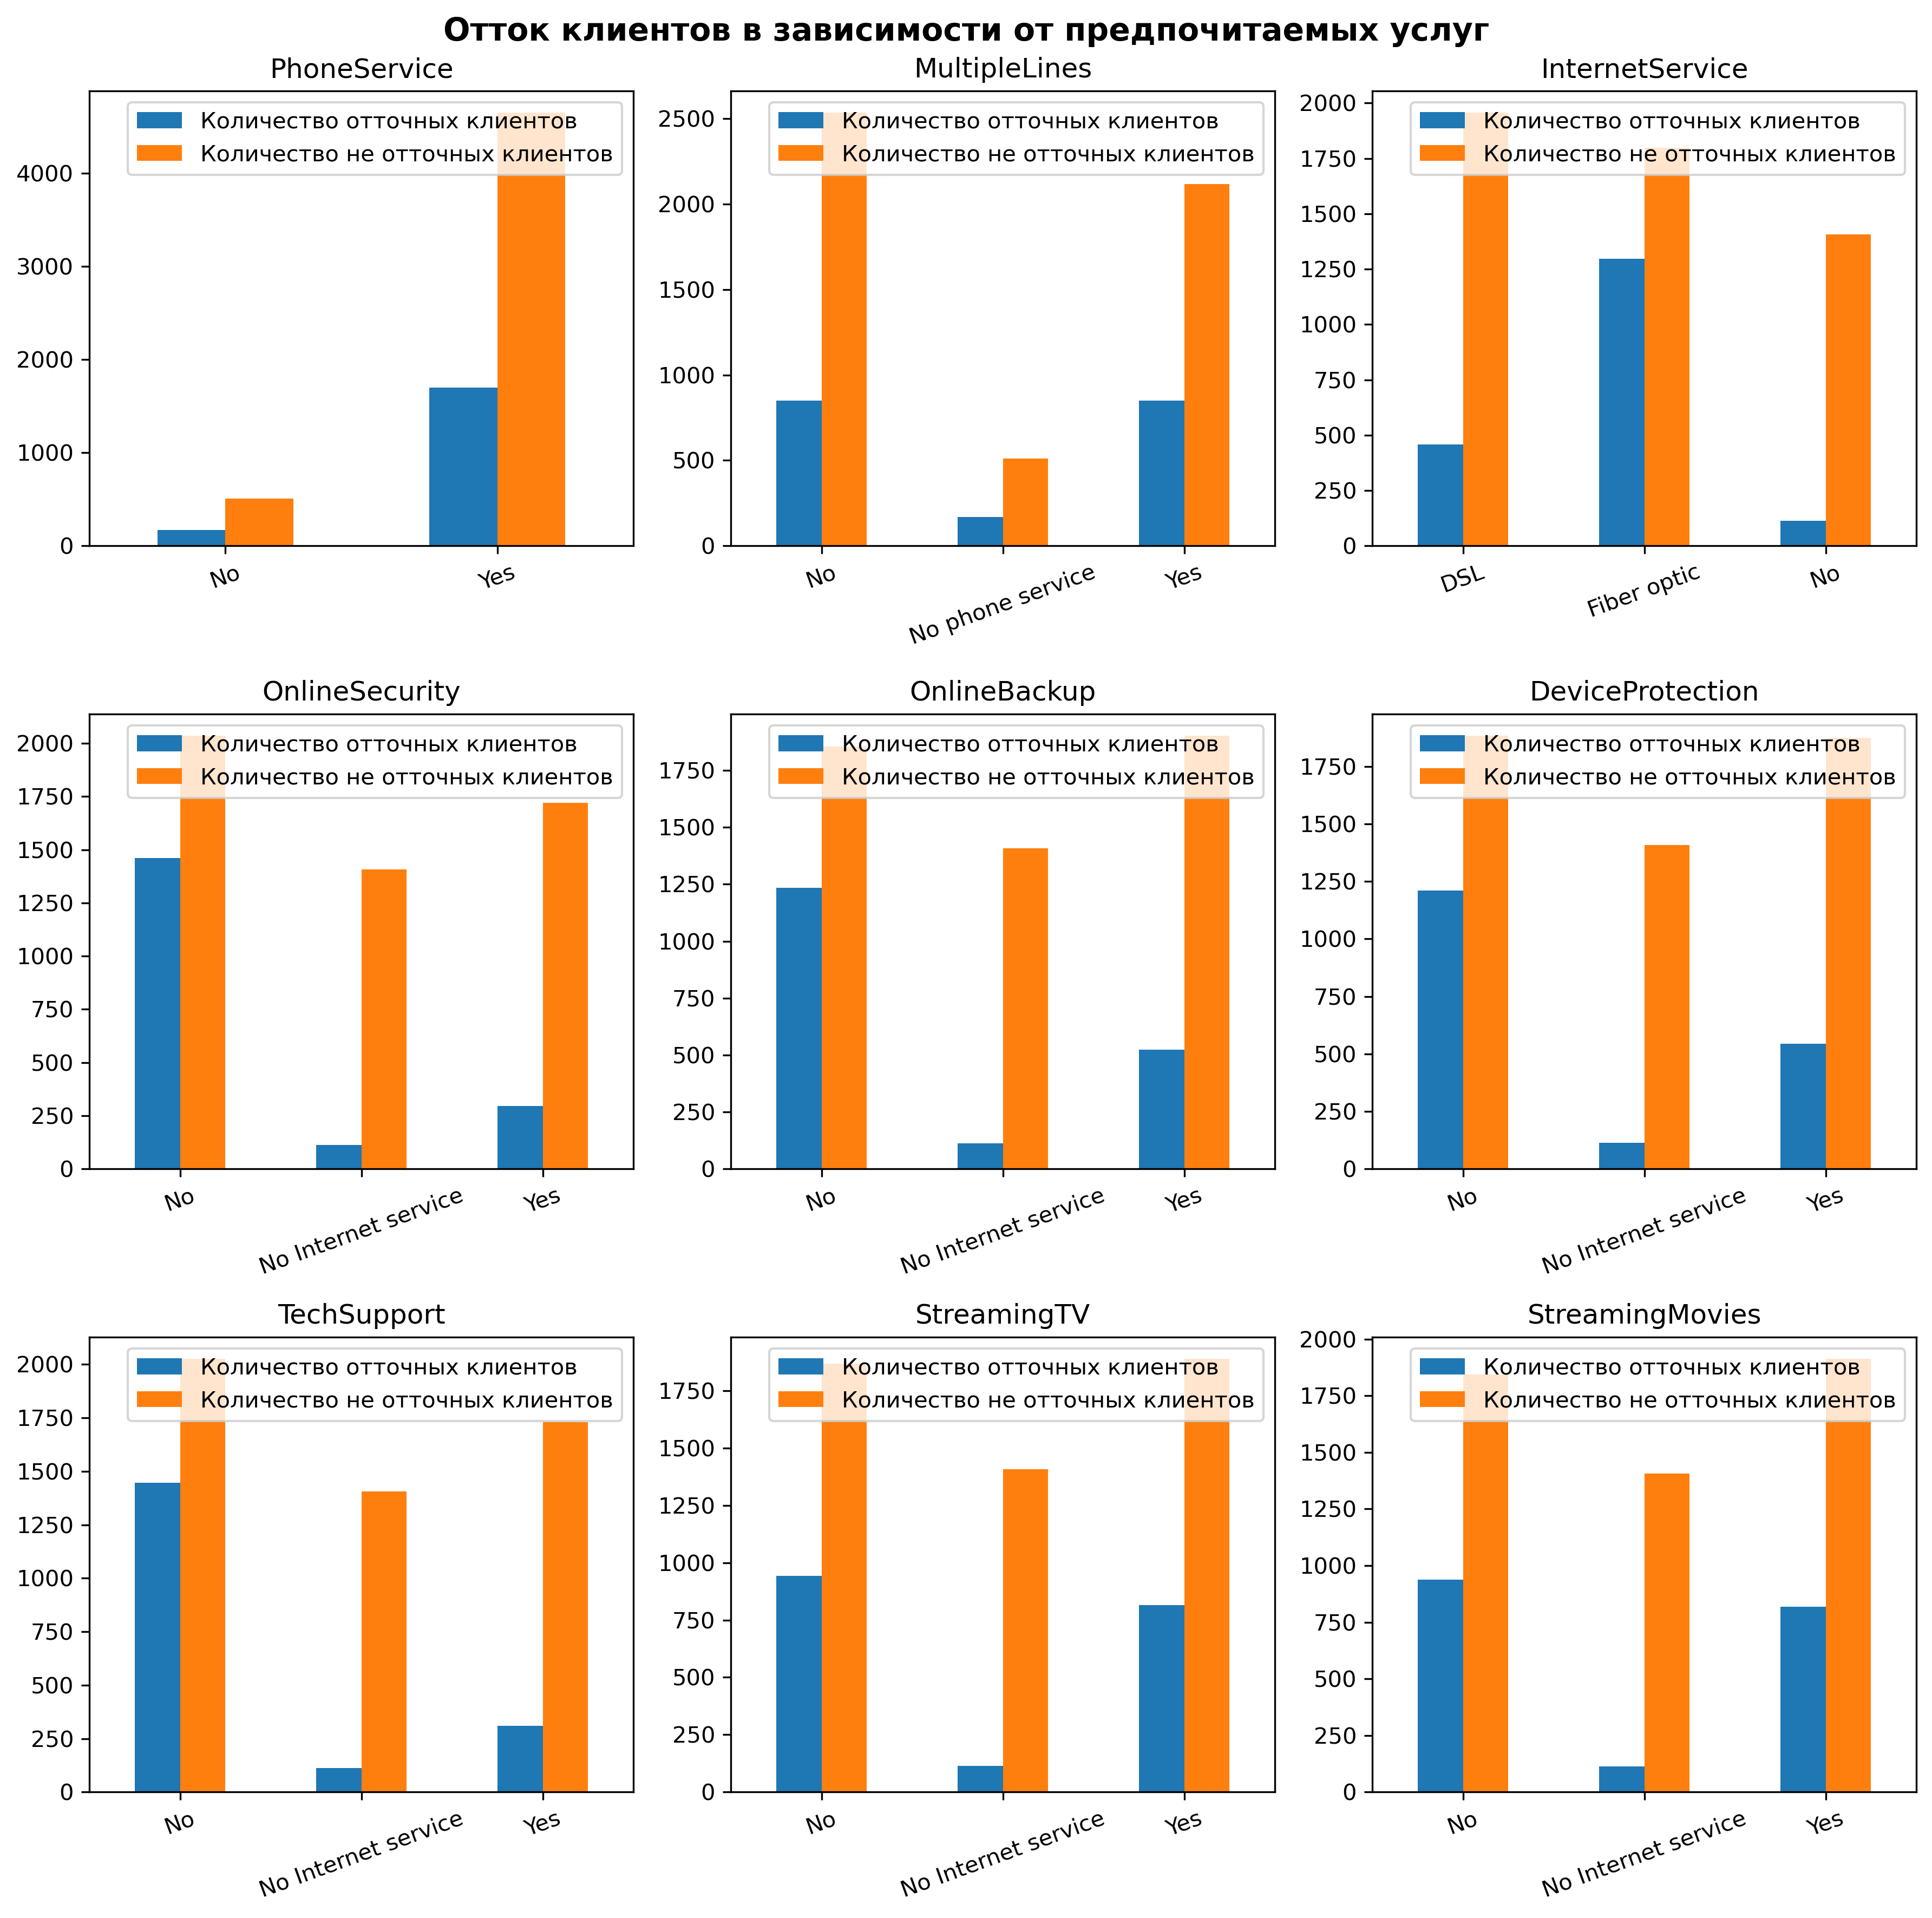

In [56]:
# напишем функцию для отображения отточности количества клиентов в зависимости от предпочитаемых услуг.
def plot_service_information(data, figsize=(12, 12)):
    service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies']

    fig = plt.figure(figsize=figsize, dpi=300)
    axes = fig.subplots(3, 3, squeeze=False)
    fig.suptitle('Отток клиентов в зависимости от предпочитаемых услуг', fontsize=14, fontweight='bold')

    for i, column in enumerate(service_columns):
        ax = axes[i // 3, i % 3]
        gender_group = group_data(data=data, column=column)
        gender_group[['Количество отточных клиентов', 'Количество не отточных клиентов']] \
                                                                                           .plot(kind='bar', ax=ax)
        ax.set_title(column)
        if column == 'PhoneService':
            ax.set_xticklabels(['No', 'Yes'], rotation=20)
            
        elif column == 'MultipleLines':
            ax.set_xticklabels(['No', 'No phone service', 'Yes'], rotation=20)
            
        elif column in 'InternetService':
            ax.set_xticklabels(['DSL', 'Fiber optic', 'No'], rotation=20)
            
        elif column in ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV','StreamingMovies']:
            ax.set_xticklabels(['No', 'No Internet service', 'Yes'], rotation=20)

    # Удаление пустых подграфиков
    for j in range(len(service_columns), 9):
        fig.delaxes(axes[j // 3, j % 3])

    plt.tight_layout()
    plt.show()
    
plot_service_information(data = df)

# 

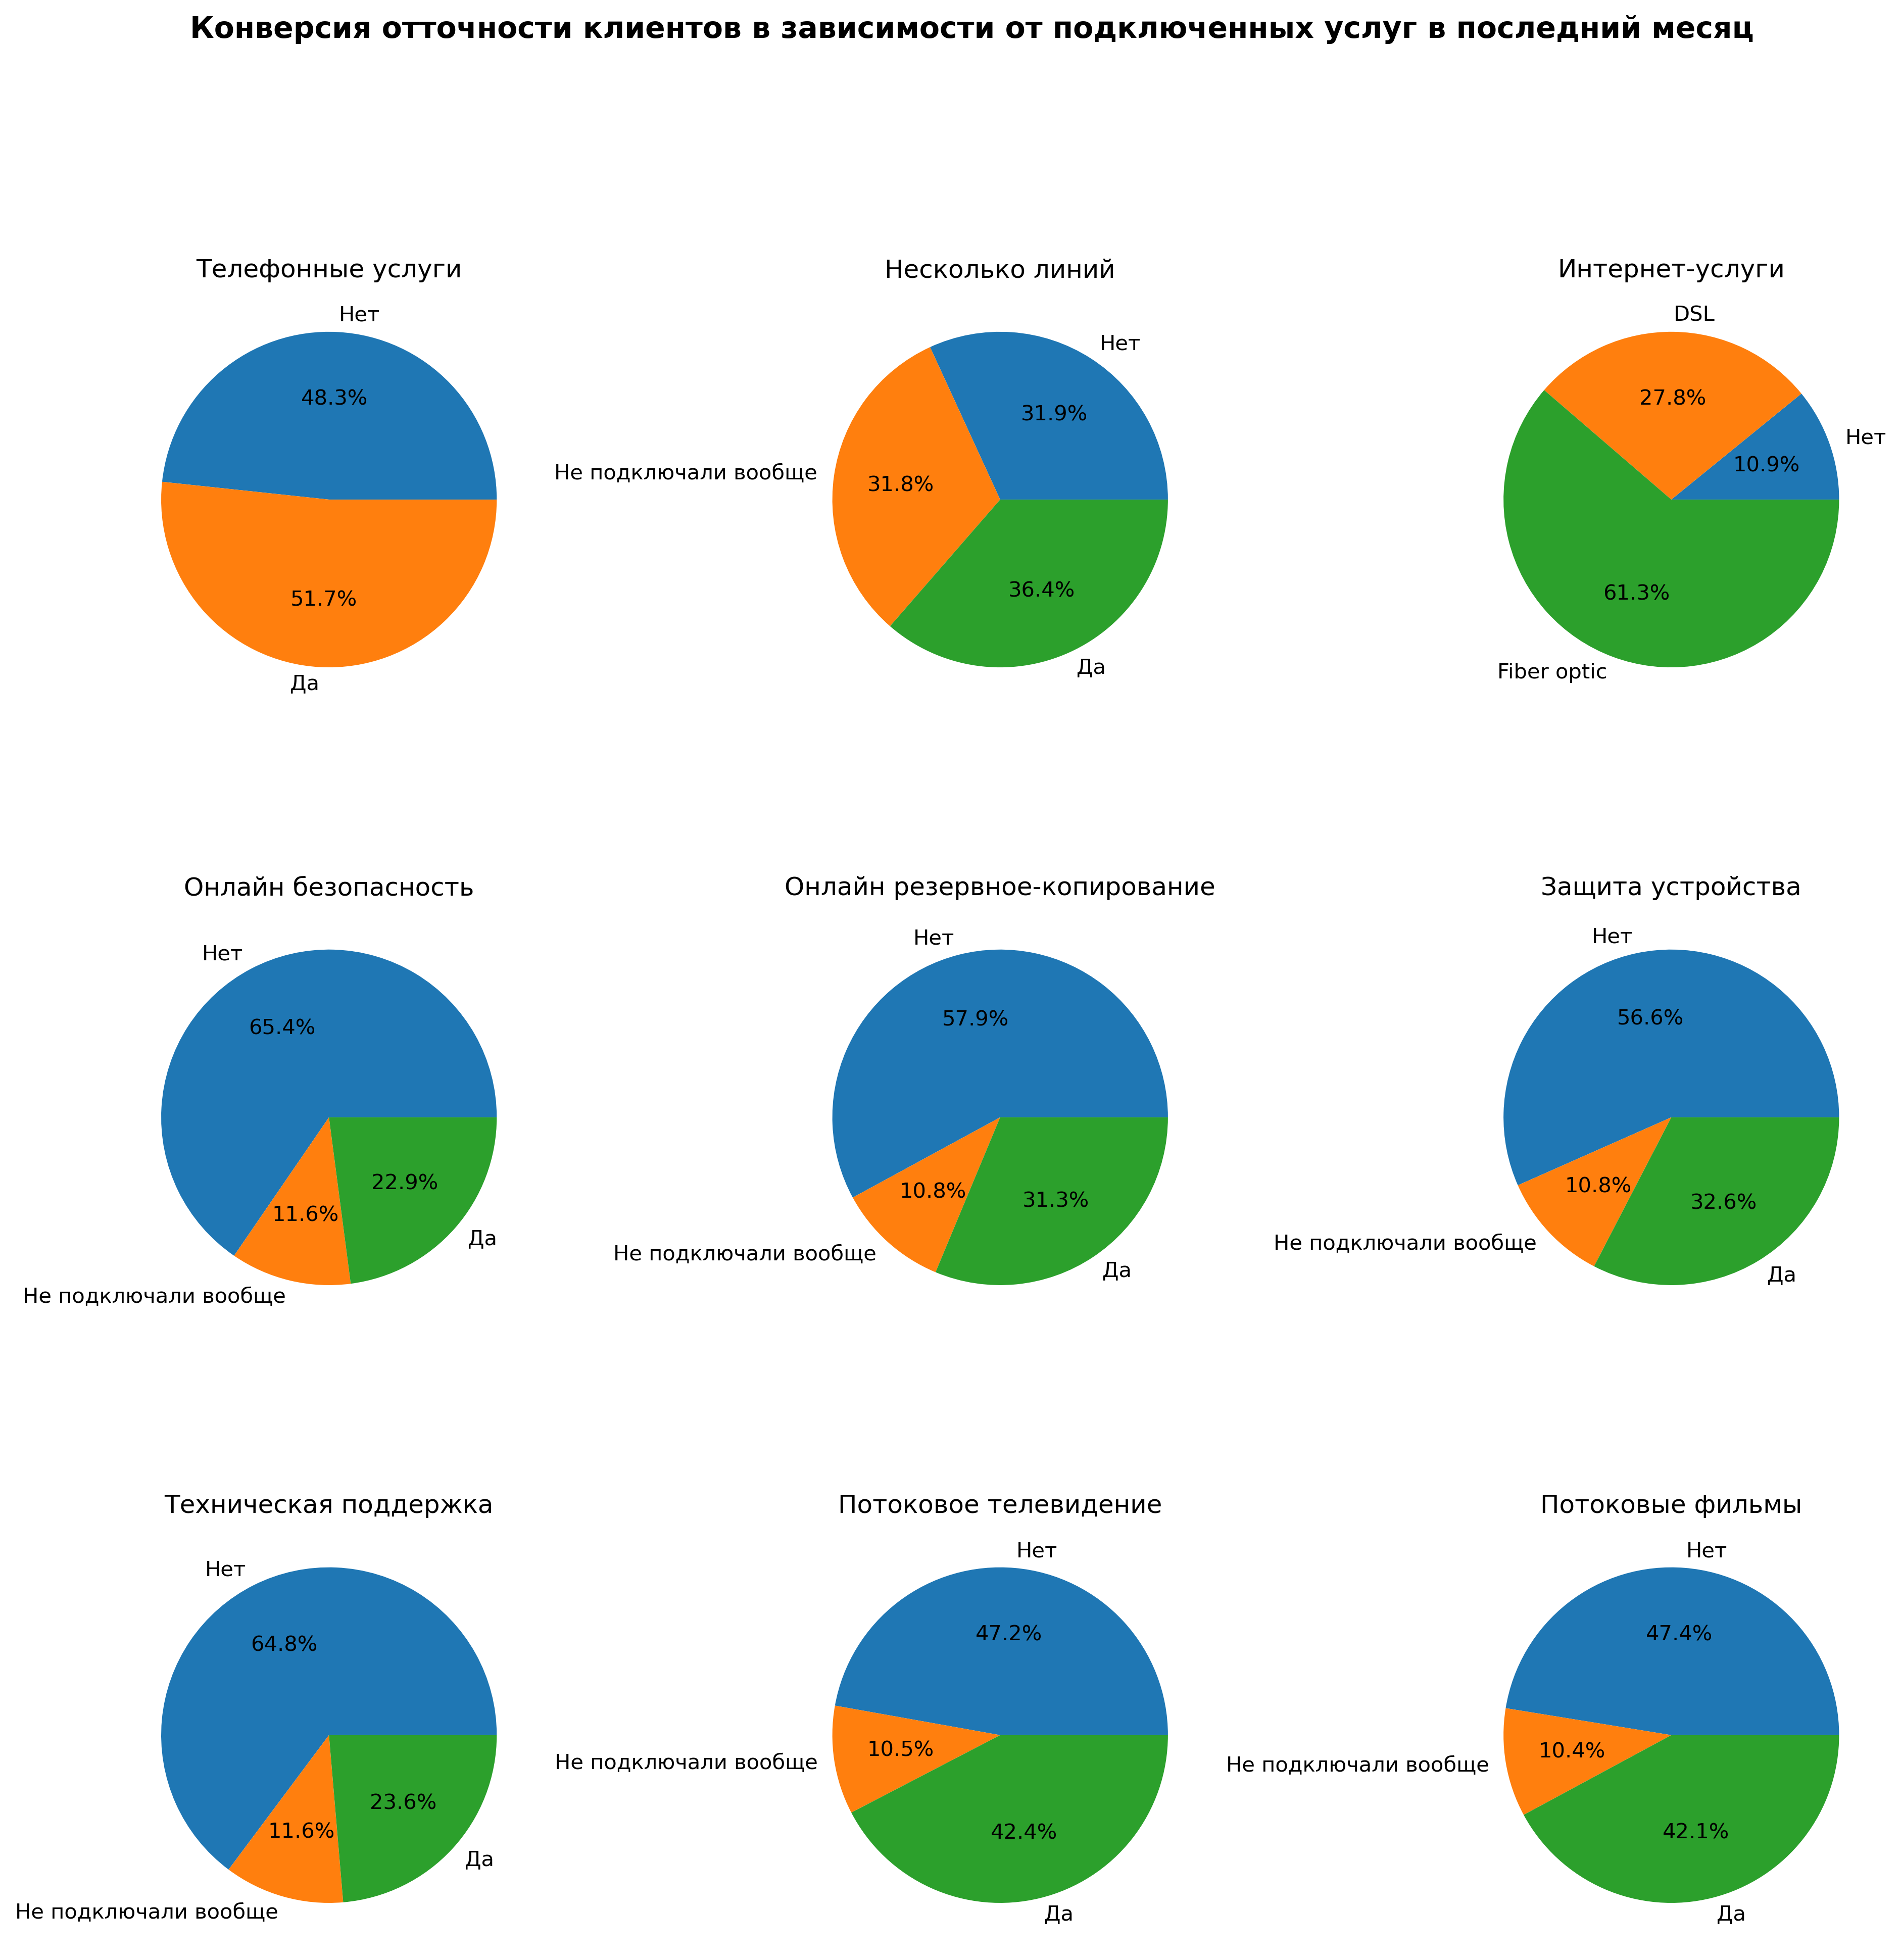

In [57]:
# напишем функцию для отображения конверсии оттока клиентов в зависимости от предпочитаемых услуг
def conversion_plot_service_information(data, figsize = (15,15)):
    fig = plt.figure(figsize=figsize, dpi=300)
    ax1 = fig.add_subplot(3, 3, 1)
    ax2 = fig.add_subplot(3, 3, 2)
    ax3 = fig.add_subplot(3, 3, 3)
    ax4 = fig.add_subplot(3, 3, 4)
    ax5 = fig.add_subplot(3, 3, 5)
    ax6 = fig.add_subplot(3, 3, 6)
    ax7 = fig.add_subplot(3, 3, 7)
    ax8 = fig.add_subplot(3, 3, 8)
    ax9 = fig.add_subplot(3, 3, 9)
    fig.suptitle('Конверсия отточности клиентов в зависимости от подключенных услуг в последний месяц', \
                                                                                fontsize=14, fontweight='bold')
    
    labels_SeniorCitizen = ['Нет', 'Да']
    sizes_SeniorCitizen = [conversion_no_PhoneService,conversion_yes_PhoneService]
    ax1.pie(sizes_SeniorCitizen, labels=labels_SeniorCitizen, autopct='%1.1f%%')
    ax1.set_title('Телефонные услуги')

    labels_SeniorCitizen = ['Нет', 'Не подключали вообще','Да']
    sizes_SeniorCitizen = [conversion_no_MultipleLines,conversion_no_MultipleLines_all,conversion_yes_MultipleLines]
    ax2.pie(sizes_SeniorCitizen, labels=labels_SeniorCitizen, autopct='%1.1f%%')
    ax2.set_title('Несколько линий')

    labels_method = ['Нет', 'DSL', 'Fiber optic']
    sizes_method = [conversion_no_InternetService,conversion_DSL,conversion_fiber_optic]                   
    ax3.pie(sizes_method, labels=labels_method, autopct='%1.1f%%')
    ax3.set_title('Интернет-услуги')

    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_OnlineSecurity_no,conversion_no_OnlineSecurity_all,conversion_yes_OnlineSecurity]                        
    ax4.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax4.set_title('Онлайн безопасность')
    
    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_OnlineBackup,conversion_no_OnlineBackup_all,conversion_yes_OnlineBackup]                        
    ax5.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax5.set_title('Онлайн резервное-копирование')
    
    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_DeviceProtection,conversion_no_DeviceProtection_all,conversion_yes_DeviceProtection]                        
    ax6.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax6.set_title('Защита устройства')

    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_TechSupport,conversion_no_TechSupport_all,conversion_yes_TechSupport]                        
    ax7.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax7.set_title('Техническая поддержка')
    
    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_StreamingTV,conversion_no_StreamingTV_all,conversion_yes_StreamingTV]                        
    ax8.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax8.set_title('Потоковое телевидение')

    labels_billing = ['Нет', 'Не подключали вообще','Да']
    sizes_billing = [conversion_no_StreamingMovies,conversion_no_StreamingMovies_all,conversion_yes_StreamingMovies]                        
    ax9.pie(sizes_billing, labels=labels_billing, autopct='%1.1f%%')
    ax9.set_title('Потоковые фильмы')
    
    plt.subplots_adjust(wspace=0.6)
    plt.show()
    
conversion_plot_service_information(data = customer_service_information_columns)

- Выводы по конверсии отточности клиентов в зависимости от подключенных услуг за последний месяц:
    1. Большинство отточных клиентов за последний месяц не подключали следующие услуги:
        - Онлайн безопасность;
        - Онлайн резервное копирование;
        - Техническую поддержку;
        - Защита устройства;
        - Потоковое телевидение;
        - Потоковые фильмы.
    2. Взаимосвязи от подключения телефонных услуг не выявлено. 
    3. Взаимосвязи от подключения нескольких линий не выявлено
    4. Клиенты, которые пользовались интернет-услугой Fiber optic, больше привержены к оттоку.

# 

<a id="4.2.4"></a>

### <b>4.2.4 <span style='color:#422e13;font-family:cursive;'>|</span> Дополнительные исследования</b>

**Исследуем распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot**

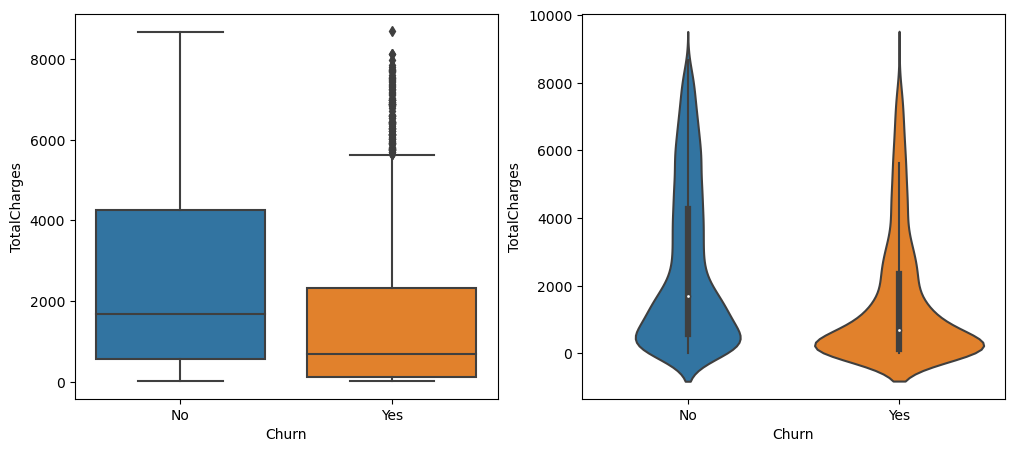

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Churn',y='TotalCharges',data=df,ax=ax1)
sns.violinplot(x='Churn',y='TotalCharges',data=df,ax=ax2)
plt.show()

- Общие платежи выше у не отточных клиентов.
- В группе отточных, имеются клиенты, у которых общие платежи значительно выше остальных.

# 

**Исследуем распределение колонки MonthlyCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot**

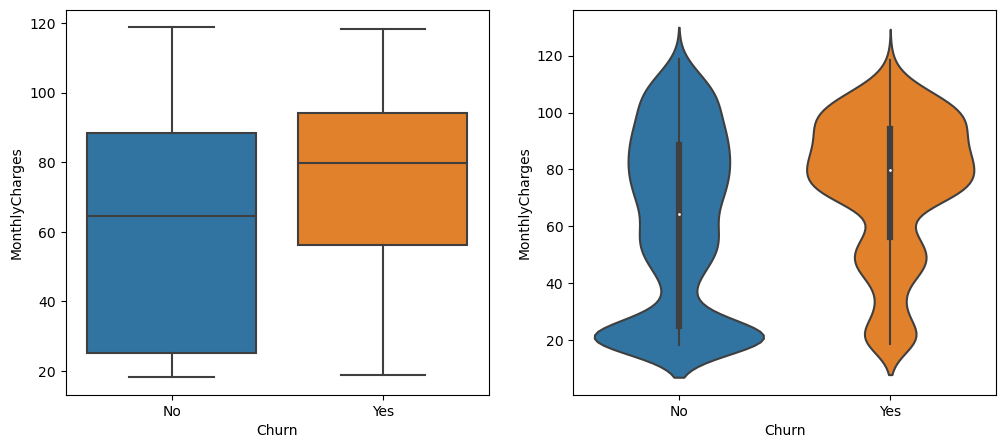

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df,ax=ax1)
sns.violinplot(x='Churn',y='MonthlyCharges',data=df,ax=ax2)
plt.show()

- Ежемесячные платежи выше у отточных клиентов. 

**Построим график boxplot с распределением колонки TotalCharges для различных типов контрактов**

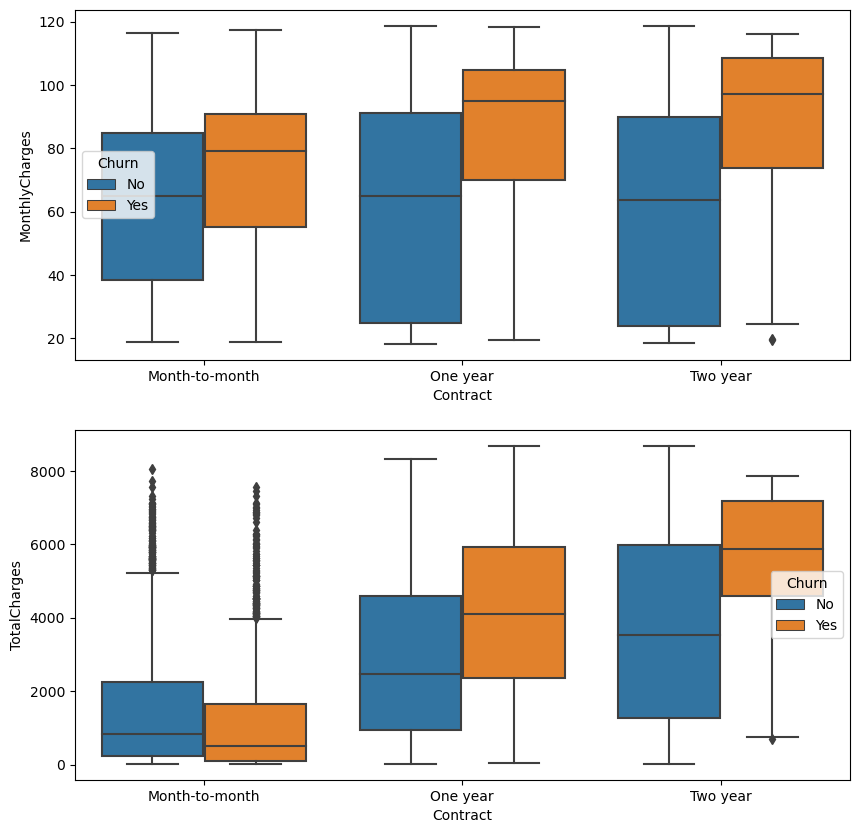

In [60]:
fig,ax = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(data=df,x='Contract',y='MonthlyCharges',hue='Churn',ax=ax[0])
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn',ax=ax[1])

plt.show()

- Общие платежи выше у отточных клиентов по контракту на два года;
- У клиентов по контракту на два года выше общие платежи чем  у не отточных;
- Также отточные клиенты по контракту на год больше платят чем неотточные;
- Отточные клиенты, которые подписали ежемесячный контракт, меньше платят, нежели отточные.

# 

**Найдем линейную зависимость оттока клиентов с различными признаками**

In [61]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [62]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

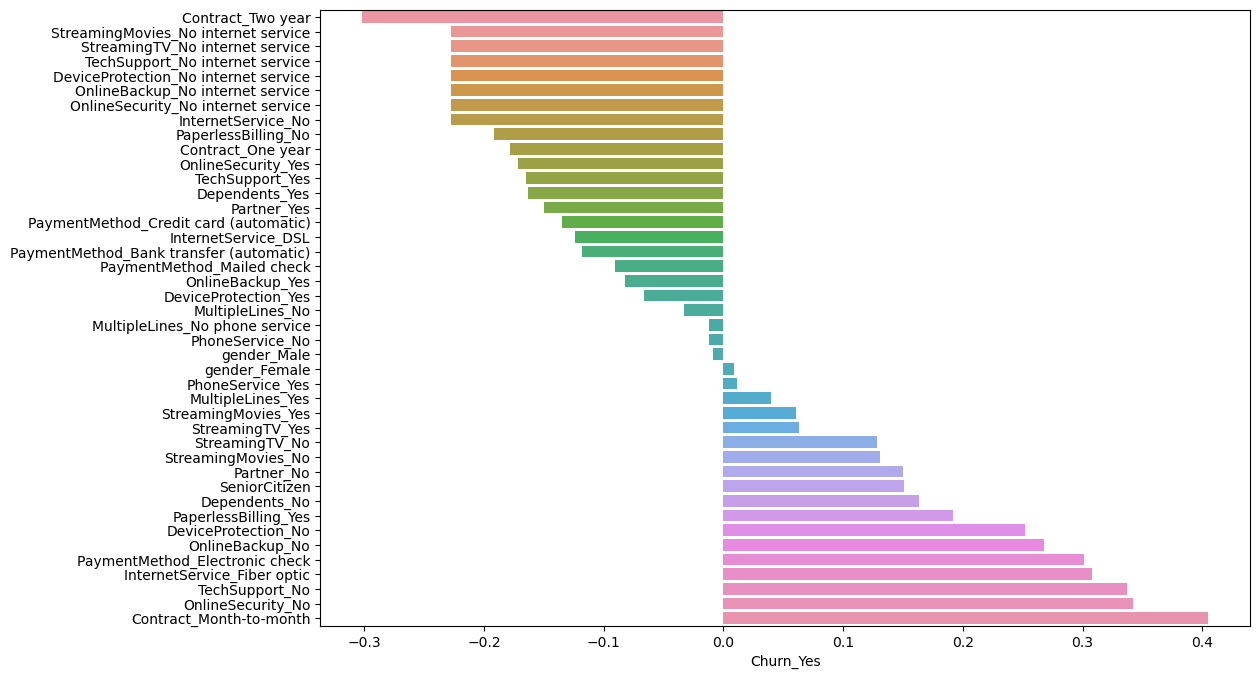

In [63]:
features_corr = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
plt.figure(figsize=(12,8))
sns.barplot(y=features_corr.index,x=features_corr)
plt.show()

- 5 признаков, которые имеют наибольшую прямую линейную зависимость оттока клиентов:
    1. Ежемесячный контракт
    2. Онлайн безопасность(не подключили)
    3. Техническая поддержка(не подключили)
    4. Интернет-услуга Fiber optic
    5. Платежы с помощью электронного чека
- 5 признаков, которые имеют наибольшую обратную линейную зависимость оттока клиентов:
    1. Контракт на два года
    2. Потоковые фильмы(не подключили вообще)
    3. Потоковые телевидение(не подключили вообще)
    4. Техническая поддержка(не подключили вообще)
    5. Защита устройства(не подключили вообще)

# 

**Построим гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract.**

<Figure size 2000x600 with 0 Axes>

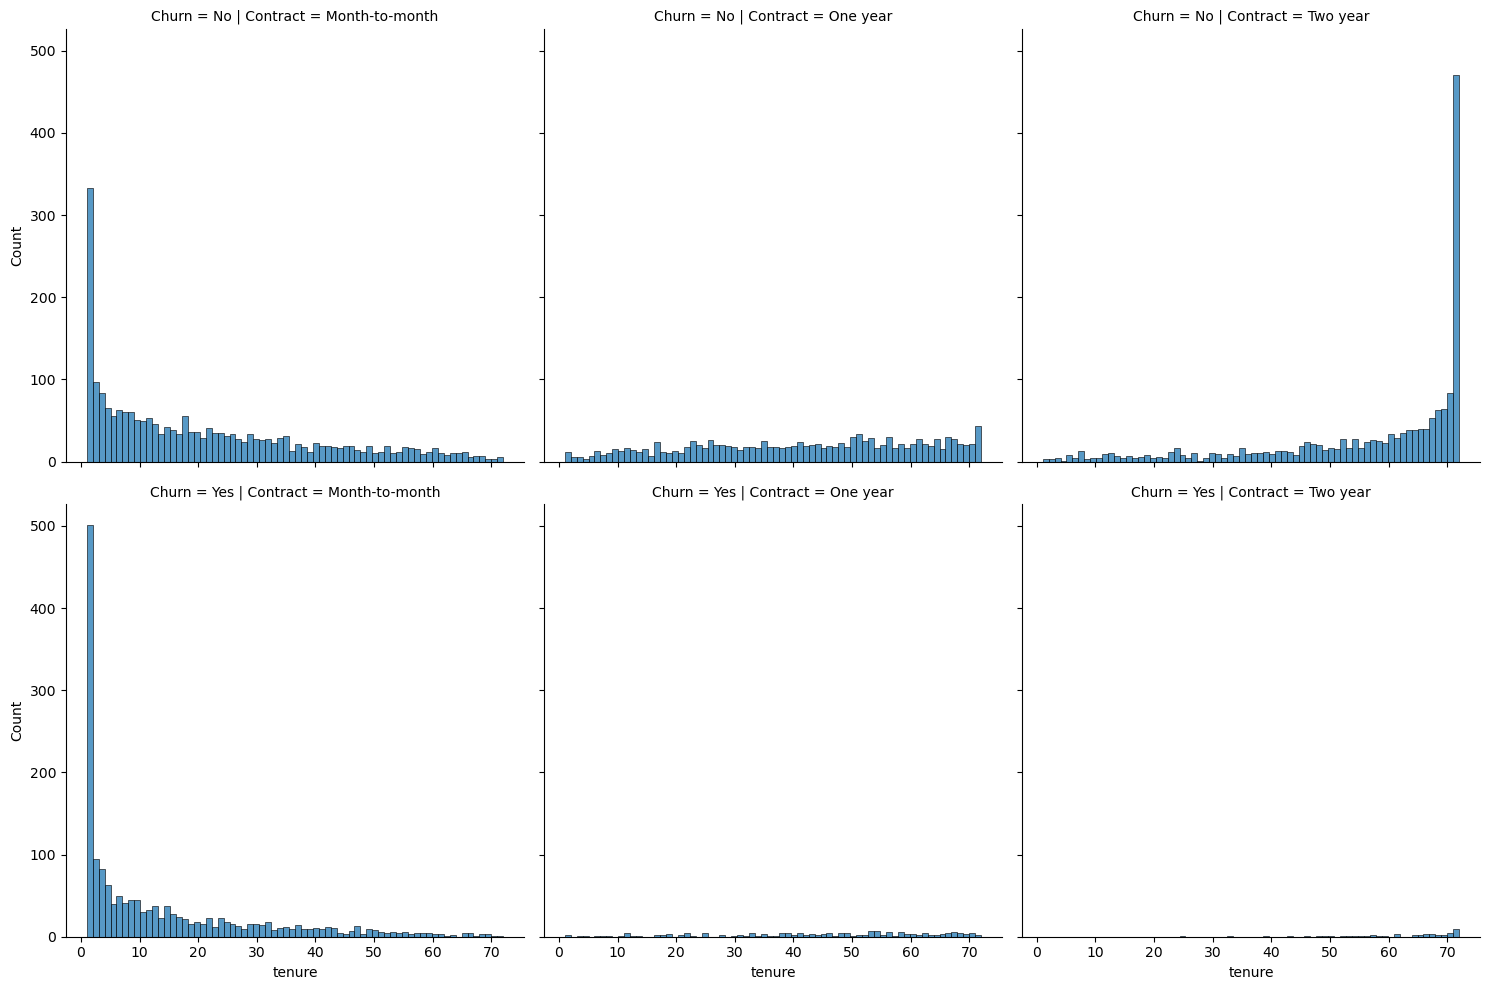

In [64]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

- Большая часть клиентов подписали ежемесячный контракт. В последний месяц пришло много клиентов, однако большая часть из них стали отточными. Среди данного вида контракта наблюдается наибольший отток;
- Также много клиентов, которые пользуются услугами 72 месяца. Клиенты, которые получают услуги уже долий срок, меньше подвержены оттоку, что вполне логично.

# 

**Построим график scatterplot для колонок Total Charges и Monthly Charges**

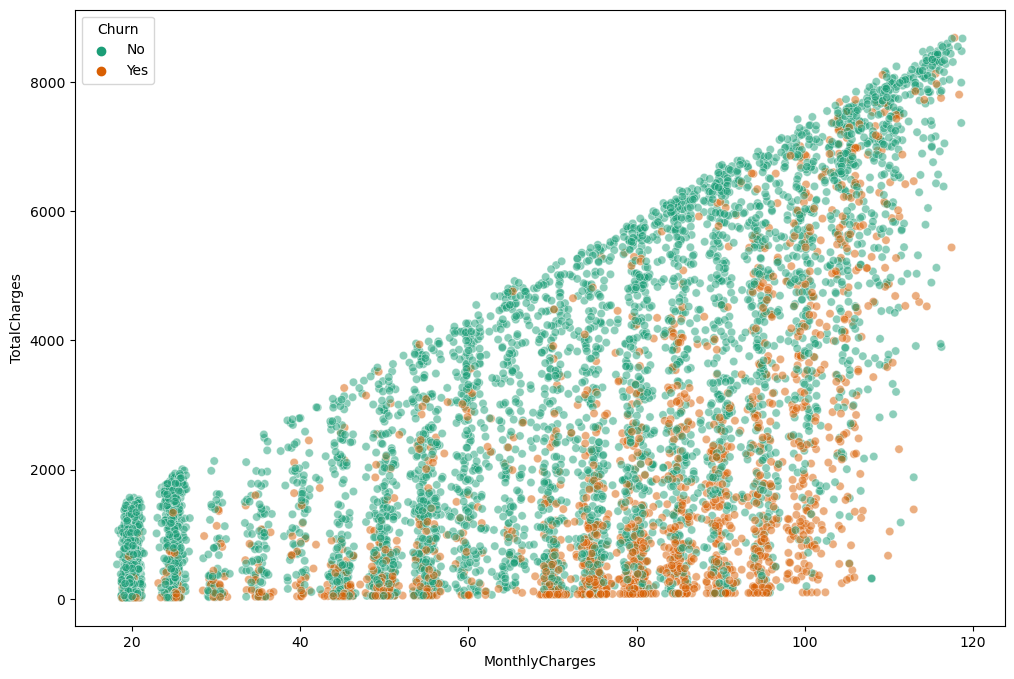

In [65]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn',linewidth=0.5,alpha=0.5,palette='Dark2');

- Чем больше клиенты платят ежемесячно, тем больше у них общие расходы;
- Не отточные клиенты в среднем тратят больше.

# 

### Более крупные когорты (сегменты)
**На основе колонки tenure создадим новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [66]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [67]:
df['Tenure_Cohort'] = df['tenure'].apply(cohort)

In [68]:
df.head(10)[['tenure','Tenure_Cohort']]

tenure   Tenure_Cohort
0       1     0-12 Months
1      34    24-48 Months
2       2     0-12 Months
3      45    24-48 Months
4       2     0-12 Months
5       8     0-12 Months
6      22    12-24 Months
7      10     0-12 Months
8      28    24-48 Months
9      62  Over 48 Months

In [69]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure_Cohort       0
dtype: int64

**Построим график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort"**

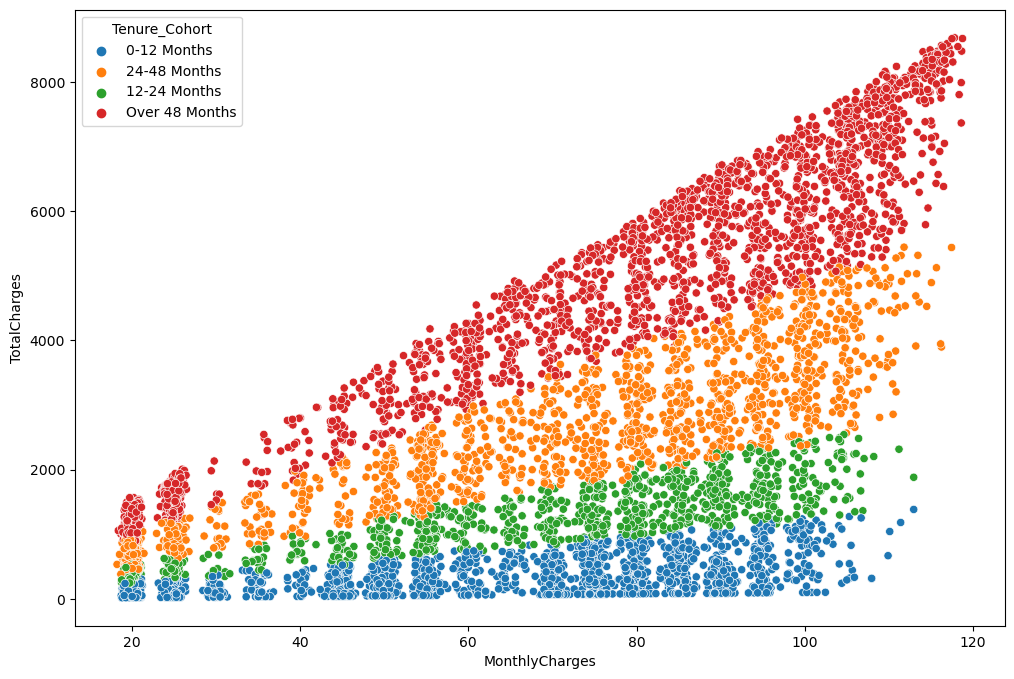

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Tenure_Cohort');

- По данному графику отчетливо видно что, чем дольше клиенты пользуются услугами, тем больше они тратят.

# 

**Построим график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

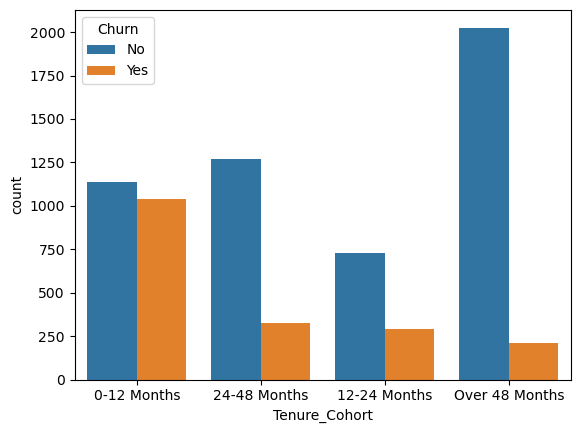

In [71]:
sns.countplot(x='Tenure_Cohort',data=df,hue='Churn');

- Наибольшая отточность среди клиентов, которые пользуются услугами 0-12 месяцев.

# 

**Создадим набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort и контракту.**

<Figure size 2000x800 with 0 Axes>

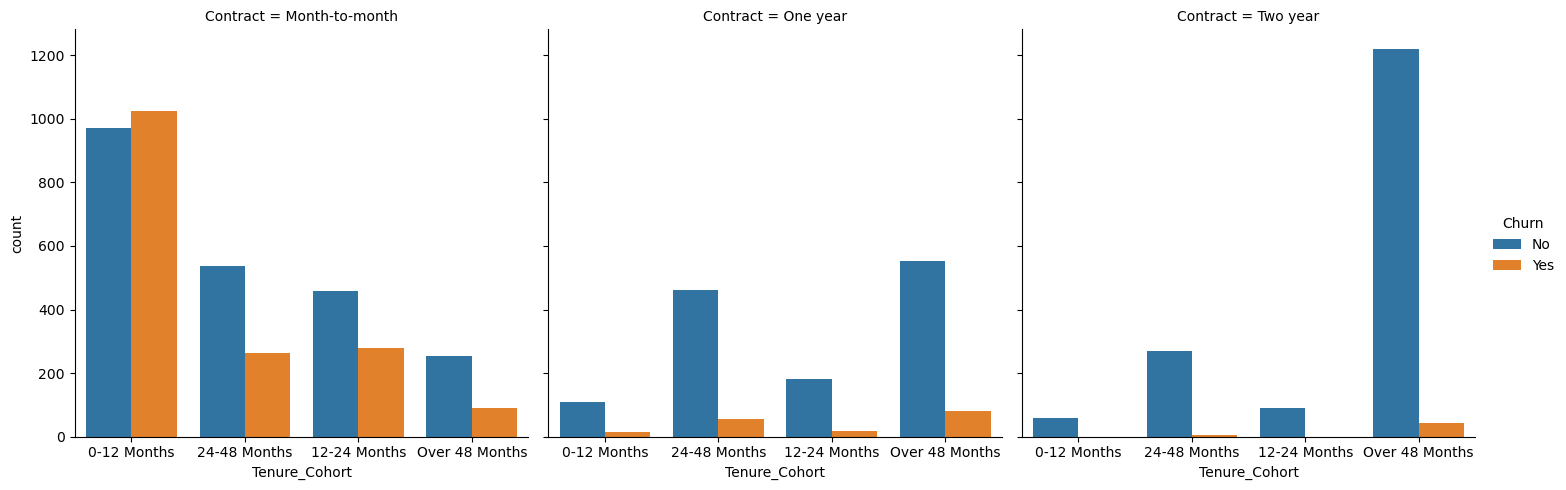

In [72]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure_Cohort',hue='Churn',col='Contract',kind='count')
plt.show()

- Наибольшая отточность среди клиентов, которые не только пользуются услугами до 1 года, но и также подписавшие контракт по ежемесячному платежу;
- Также больше отточных клиентов которые подписали ежемесячный контракт, но пользуются услугами более года.

# 

-----

<a id="5"></a>

## <b>5 <span style='color:#422e13;font-family:cursive;'>|</span> Machine Learning</b>


<a id="5.1"></a>

### <b>5.1 <span style='color:#422e13;font-family:cursive;'>|</span> Feature engineering </b>

**В данном графике, который был ранее построен, можно заметить достаточное количество выбросов по общим платежам как у отточных, так и у не отточных клиентов, которые подписали ежемесячный контракт. Необходимо исследовать данные выбросы и решить, нужно ли какие-то из них удалить для более качествоенного обучения.**

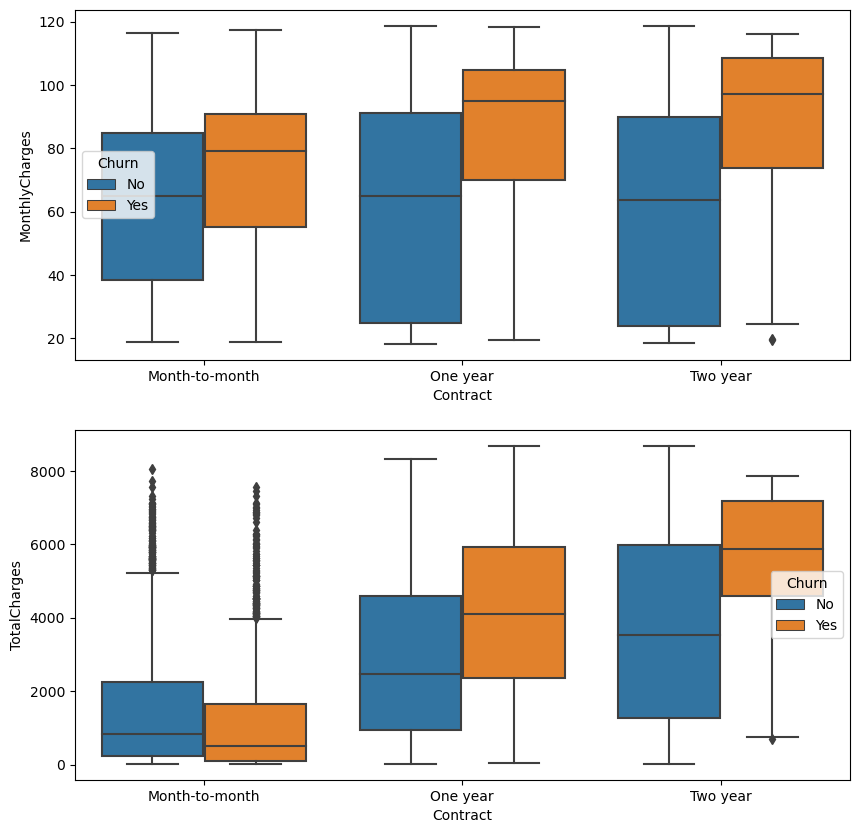

In [73]:
fig,ax = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(data=df,x='Contract',y='MonthlyCharges',hue='Churn',ax=ax[0])
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn',ax=ax[1])

plt.show()

**Выберем из датафрема только тех клиентов, которые подписали ежемесячный контракт**

In [74]:
month_to_month_df = df[df['Contract']=='Month-to-month']

In [75]:
month_to_month_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
2  3668-QPYBK    Male              0      No         No       2          Yes   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
2                No             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   
5               Yes     Fiber optic             No  ...          No   
6               Yes     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
2          No              No  Month-to-month              Yes   
4          No              No  Month-to-month              Yes   
5         Yes             Yes  Month-to-month              Yes   
6         Yes              No  Month-to-month              Yes   

             PaymentMethod MonthlyCharges TotalCharges  Churn  Tenure_Cohort  
0         Electronic check          29.85        29.85     No    0-12 Months  
2             Mailed check          53.85       108.15    Yes    0-12 Months  
4         Electronic check          70.70       151.65    Yes    0-12 Months  
5         Electronic check          99.65       820.50    Yes    0-12 Months  
6  Credit card (automatic)          89.10      1949.40     No   12-24 Months  

[5 rows x 22 columns]

# 

**Посмотрим на все значения, которые превышают верхнюю границу межквартильного размаха, т.е. являются выбросами.**

In [76]:
# Найдем 25 и 75 квантили
q3 = np.percentile(month_to_month_df['TotalCharges'], 75)
q1 = np.percentile(month_to_month_df['TotalCharges'], 25)

# межквартильный размах
IQR = q3 - q1

# верхняя граница межквартильного размаха
upper_bound = q3 + 1.5 * IQR

In [77]:
# датафрейм в котором общие расходы превышают верхнюю границу межквартильного размаха
upper_bound_df = month_to_month_df[month_to_month_df['TotalCharges']>upper_bound]

# датафрейм в котором общие расходы ниже верхней границы межквартильного размаха
lower_bound_df = month_to_month_df[month_to_month_df['TotalCharges']<upper_bound]

In [78]:
len(upper_bound_df)

200

- Имеется 200 выбросов

# 

**Посмотрим на выбросы в зависимотси от продолжительности получаения услуг(tenure). Это вполне логично, чем дольше клиент получает услуги, тем больше у него общие платежи.**

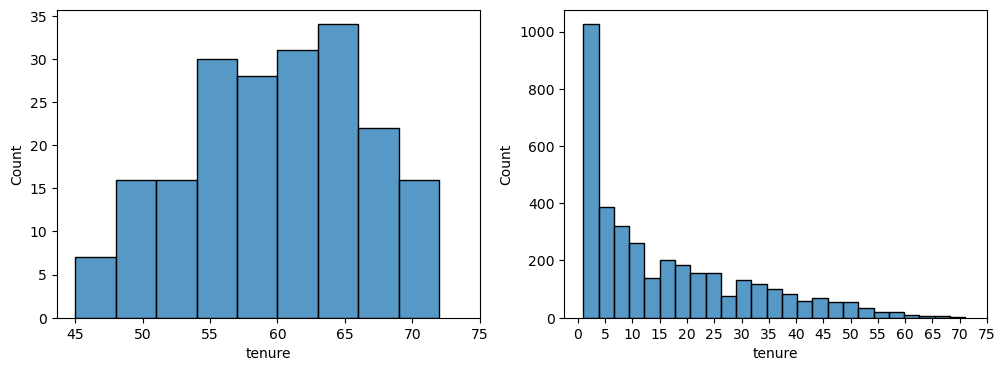

In [79]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

sns.histplot(data=upper_bound_df,x='tenure',ax=ax[0])
ax[0].set_xticks(list(range(45,76,5)))

sns.histplot(data=lower_bound_df,x='tenure',ax=ax[1])
ax[1].set_xticks(list(range(0,76,5)))

plt.show()

- Причина высоких общих расходов у клиентов с типом контракта ежемесячного платежа в том, что они являются продолжительными клиентами(более 45 мес).
- В том время как основная часть клиентов контракта по ежемесячным платежам пользуются услугами компании намного меньше, поэтому и общие расходы меньше. 
- С данными выбросами ничего не нужно делать

<a id="5.2"></a>

### <b>5.2 <span style='color:#422e13;font-family:cursive;'>|</span> Обучающая и тестовая выборка</b>

In [80]:
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

X = df.drop(['Churn','customerID'],axis=1)
#переведем текстовые категориальные признаки в числовые  
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101,stratify=y)

# 

**Для всех моделей машинного обучения будем сначала перебирать гиперпараметры по сетке с применением кросс-валидации.
Также применим стратификацию, так как классы несбалансированны.**

# 

<a id="5.3"></a>

### <b>5.3 <span style='color:#422e13;font-family:cursive;'>|</span> DecisionTreeClassifier</b>

In [82]:
model = DecisionTreeClassifier()
params = {'max_depth': [3,4,5,6,8,10],
         'min_samples_leaf': [2,3,4,6],
         'min_samples_split': [2,3,4,6],
         'max_features': [5,6,8,10]}

# Применим стратификацию, т.к. классы несбалансированы
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True)
# запустим поиск по сетке с кросс-валидацей 
grid_model = GridSearchCV(model,params,cv=stratified_cv)
grid_model.fit(X, y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'max_features': [5, 6, 8, 10],
                         'min_samples_leaf': [2, 3, 4, 6],
                         'min_samples_split': [2, 3, 4, 6]})

In [83]:
grid_model.best_params_

{'max_depth': 6,
 'max_features': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

**Модель с лучшими гиперпараметрами**

In [84]:
best_params = grid_model.best_params_
tree_model = DecisionTreeClassifier(**best_params)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=10, min_samples_leaf=6)

In [85]:
tree_pred = tree_model.predict(X_test)

**Сlassification report**

In [86]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



**Кривая обучения**

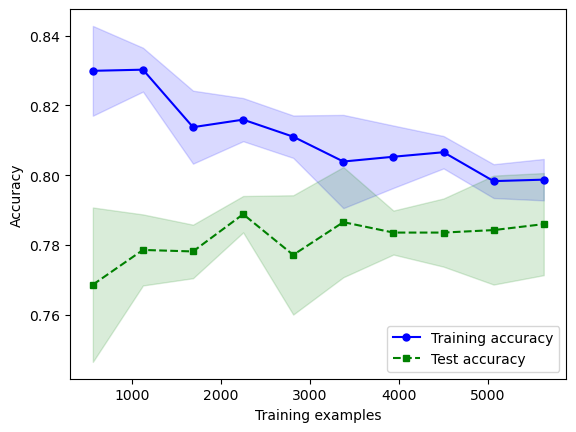

In [87]:
# создание функции для кривой обучения чтобы смотреть переобучивается ли модель
def my_learning_curve(model):
    # Создание и обучение модели
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=stratified_cv, train_sizes=np.linspace(0.1, 1.0, 10))

    # Вычисление средних значений и стандартных отклонений для точности
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Построение кривой обучения
    plt.figure()
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

my_learning_curve(model = tree_model)

- Модель дерева решений не переобучается;
- Точность на тренировочной и тестовой выборке практически одинакова.

**Матрица ошибок**

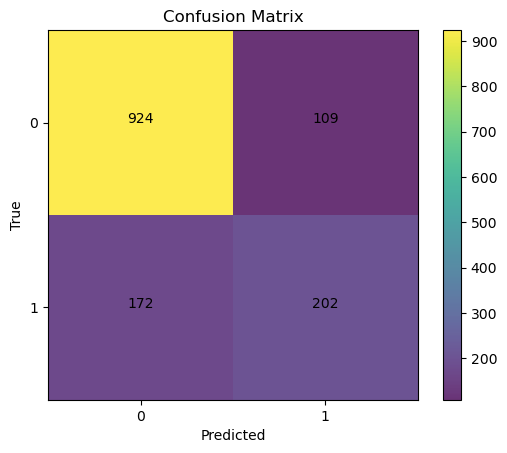

In [88]:
# напишем функцию для вычисления матрицы ошибок
def plot_confusion_matrix(y_test,prediction):
    cm = confusion_matrix(y_test, prediction)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis, alpha = 0.8)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    num_classes = len(np.unique(y_test))
    
    # Добавление текста с количеством ошибок
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="black") #if) #i == j else "black")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=range(num_classes))
    plt.yticks(ticks=range(num_classes))
    plt.show()
    
plot_confusion_matrix(y_test,tree_pred)

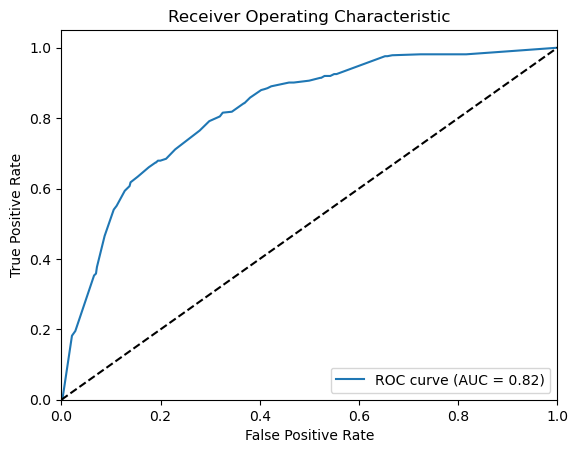

In [89]:
# создадим функцию для визуализации ROC AUC метрики
def roc_auc_metric(model):
    probs = model.predict_proba(X_test)[:, 1]

    # Вычисление значения ROC AUC
    auc = roc_auc_score(y_test, probs)

    # Вычисление значений FPR и TPR для построения ROC-кривой
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    # Построение ROC-кривой
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
roc_auc_metric(tree_model)

In [90]:
# Создание датафрейма с результатами оценочных метрик модели
# В данный датафрейме будем добавлять все модели с их метриками
def metrics_report(model,prediction):
    TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()
    
    PPV_no = round(TN / (TN + FN), 2)  # Precision для класса "No"
    TPR_no = round(TN / (TN + FP), 2)  # Recall для класса "No"
    F1_no = round(2 * ((PPV_no * TPR_no) / (PPV_no + TPR_no)), 2)  # F1-score для класса "No"
    
    
    PPV_yes = round(TP / (TP + FP), 2)  # Precision для класса "Yes"
    TPR_yes = round(TP / (TP + FN), 2)  # Recall для класса "Yes"
    F1_yes = round(2 * ((PPV_yes * TPR_yes) / (PPV_yes + TPR_yes)), 2)  # F1-score для класса "Yes"
    
    ACC  = round((TN + TP) / (TN + FP + FN + TP), 2)
    probs = model.predict_proba(X_test)[:, 1]
    auc = round(roc_auc_score(y_test, probs),2)
    model_name = model.__class__.__name__

    data = {
        'Model': [model_name],
        'Precision_yes': [PPV_yes],
        'Recall_yes': [TPR_yes],
        'F1_yes':[F1_yes],
        'Accuracy':[ACC],
        'Precision_no': [PPV_no],
        'Recall_no': [TPR_no],
        'F1_no':[F1_no],
        'AUC':[auc]
    }
    result = pd.DataFrame(data)
    result = result.reset_index(drop=True)
    return result

report_models = metrics_report(tree_model,tree_pred)

In [91]:
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0  DecisionTreeClassifier           0.65        0.54    0.59       0.8   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82

In [92]:
# Также напишем функцию для добавления новой модели в итоговый отчет
def add_model(data,model,prediction):
    row_to_check = model.__class__.__name__  # Строка для проверки 
    if data.isin([row_to_check]).all(axis=1).any():
        print("Модель существует в датафрейме.")
        return None
    else:
        report = metrics_report(model,prediction)
        concatenated  = pd.concat([data,report], axis=0)
        concatenated = concatenated.reset_index(drop=True)
        return concatenated

# 

<a id="5.4"></a>

## <b>5.4 <span style='color:#422e13;font-family:cursive;'>|</span> Random Forest</b>

In [93]:
random_forest_model = RandomForestClassifier()

params = {'n_estimators': [60,80,100,120],
          'bootstrap': [True,False],
          'max_depth': [5,6,7,8,10],
          'max_features': [4,5,6,8,10]}

# запустим поиск по сетке с кросс-валидацей
grid_model = GridSearchCV(random_forest_model,params,cv=stratified_cv)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 6, 7, 8, 10],
                         'max_features': [4, 5, 6, 8, 10],
                         'n_estimators': [60, 80, 100, 120]})

**Модель с лучшими гиперпараметрами**

In [94]:
best_params = grid_model.best_params_
random_forest_model = RandomForestClassifier(**best_params)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=120)

In [95]:
random_forest_pred = random_forest_model.predict(X_test)

In [96]:
print(classification_report(y_test,random_forest_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.69      0.51      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



**Кривая обучения**

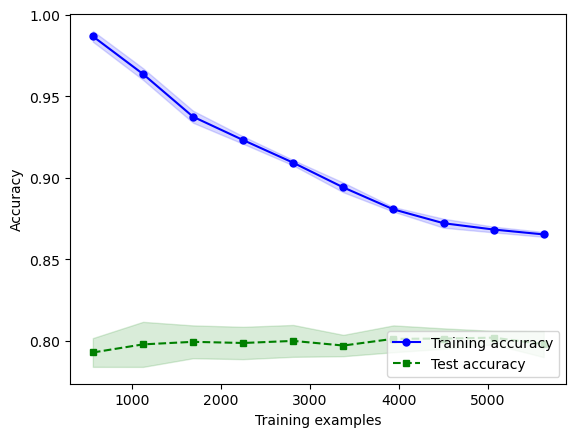

In [97]:
my_learning_curve(model = random_forest_model)

- В модели случайного леса нет недообучения и переобучения.

**Матрица ошибок**

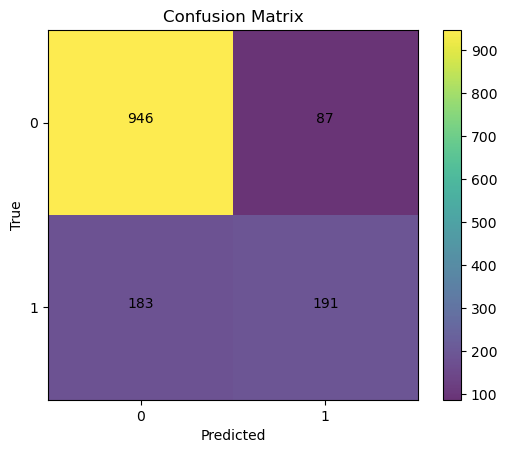

In [98]:
plot_confusion_matrix(y_test,random_forest_pred)

**ROC AUC**

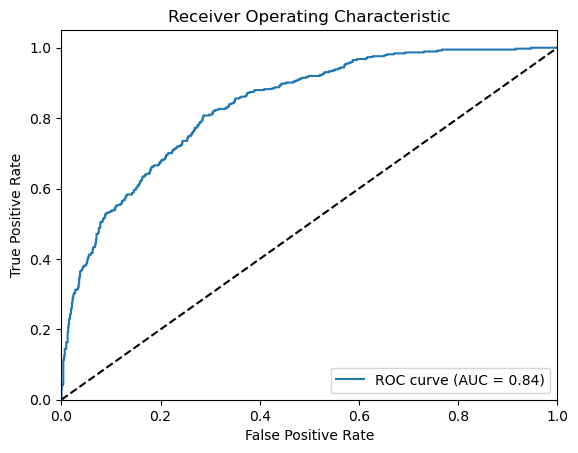

In [99]:
roc_auc_metric(random_forest_model)

**Добавление метрик модели случайного леса в отчет**

In [100]:
report_models = add_model(report_models,random_forest_model,random_forest_pred)
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0  DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1  RandomForestClassifier           0.69        0.51    0.59      0.81   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84

# 

<a id="5.5"></a>

## <b>5.5 <span style='color:#422e13;font-family:cursive;'>|</span> AdaBoostClassifier</b>

In [101]:
ada_boost_model = AdaBoostClassifier()

params = {'n_estimators': [60,80,100,120],
          'learning_rate': [0.01,0.03,0.1,0.2,0.3]}

# запустим поиск по сетке с кросс-валидацией 
grid_model = GridSearchCV(ada_boost_model,params,cv=stratified_cv)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3],
                         'n_estimators': [60, 80, 100, 120]})

**Модель с лучшими гиперпараметрами**

In [102]:
params = grid_model.best_params_
ada_boost_model = AdaBoostClassifier(**params)
ada_boost_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=100)

In [103]:
ada_boost_pred = ada_boost_model.predict(X_test)

**Classification report**

In [104]:
print(classification_report(y_test,ada_boost_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1033
           1       0.71      0.49      0.58       374

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



**Матрица ошибок**

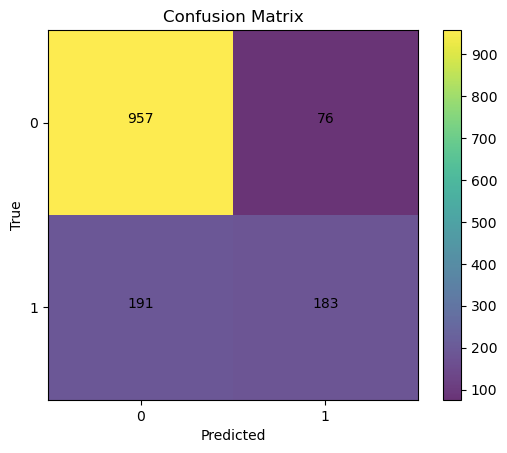

In [105]:
plot_confusion_matrix(y_test,ada_boost_pred)

**Кривая обучения**

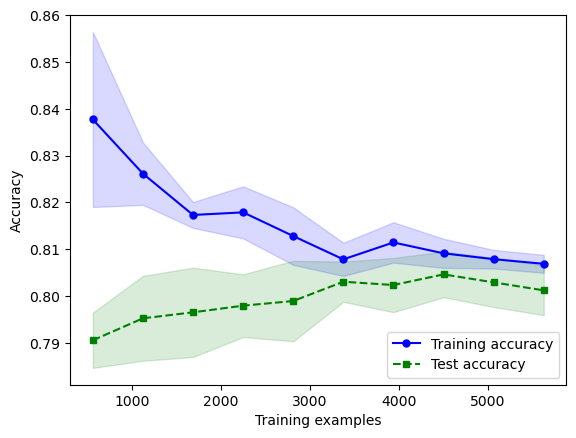

In [106]:
my_learning_curve(model = ada_boost_model)

- В модели AdaBoost нет недообучения и переобучения.

**ROC AUC**

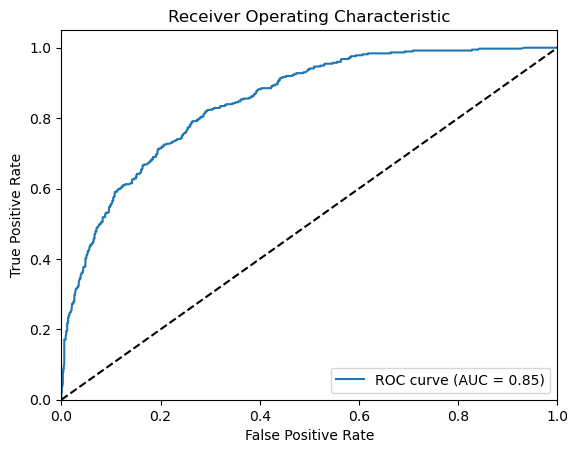

In [107]:
roc_auc_metric(ada_boost_model)

**Добавление метрик модели в отчет**

In [108]:
report_models = add_model(report_models,ada_boost_model,ada_boost_pred)
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0  DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1  RandomForestClassifier           0.69        0.51    0.59      0.81   
2      AdaBoostClassifier           0.71        0.49    0.58      0.81   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85

# 

<a id="5.6"></a>

## <b>5.6 <span style='color:#422e13;font-family:cursive;'>|</span> GradientBoostingClassifier</b>

In [109]:
grad_boost_model = GradientBoostingClassifier()
params = {'n_estimators': [80,100,120],
          'learning_rate': [0.01,0.03,0.1,0.2,0.3],
         'max_depth': [3,4,5,6]}
# запустим поиск по сетке с кросс-валидацией 
grid_model = GridSearchCV(grad_boost_model,params,cv=stratified_cv)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [80, 100, 120]})

**Модель с лучшими гиперпараметрами**

In [110]:
params = grid_model.best_params_
grad_boost_model = GradientBoostingClassifier(**params)
grad_boost_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=120)

In [111]:
grad_boost_pred = grad_boost_model.predict(X_test)

**Classification report**

In [112]:
print(classification_report(y_test,grad_boost_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.53      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



**Матрица ошибок**

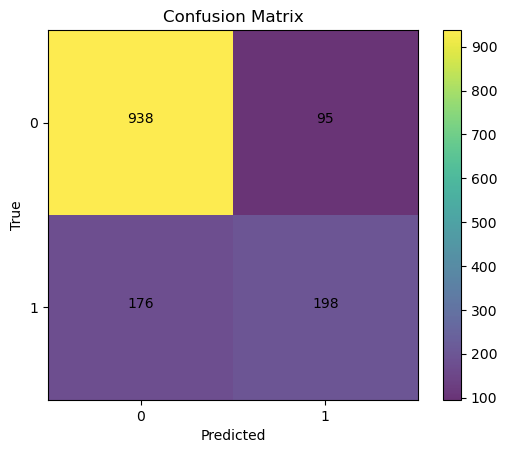

In [113]:
plot_confusion_matrix(y_test,grad_boost_pred)

**Кривая обучения**

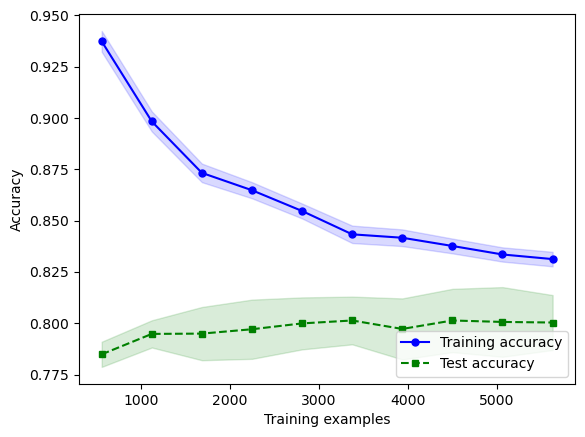

In [114]:
my_learning_curve(model = grad_boost_model)

**ROC AUC**

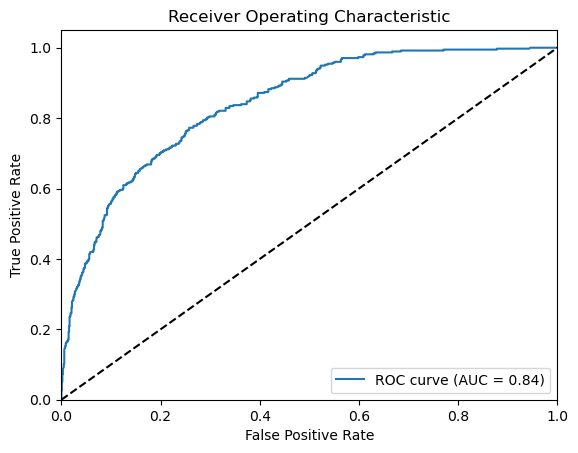

In [115]:
roc_auc_metric(grad_boost_model)

**Добавление в итоговый датафрейм**

In [116]:
report_models = add_model(report_models,grad_boost_model,grad_boost_pred)
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0      DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1      RandomForestClassifier           0.69        0.51    0.59      0.81   
2          AdaBoostClassifier           0.71        0.49    0.58      0.81   
3  GradientBoostingClassifier           0.68        0.53    0.60      0.81   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85  
3          0.84       0.91   0.87  0.84

# 

<a id="5.7"></a>

## <b>5.7 <span style='color:#422e13;font-family:cursive;'>|</span> Support Vector Machines</b>

**Обучение модели с параметрами linear и rbf.**

In [117]:
scaler = StandardScaler()
svc = SVC()
operations = [('scaler',scaler),('svc',svc)]

pipe = Pipeline(operations)

param_grid = {'svc__C': [0.01, 0.1, 1],
              'svc__kernel': ['linear', 'rbf'],
              'svc__gamma': [0.1, 1, 10]}

# запустим поиск по сетке с кросс-валидацией 
grid_model = GridSearchCV(pipe,param_grid,cv=stratified_cv)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.01, 0.1, 1], 'svc__gamma': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']})

In [118]:
grid_model.best_params_

{'svc__C': 0.01, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}

**Модель с лучшими гиперпараметрами**

In [119]:
scaler = StandardScaler()
best_params = {'C': 0.01, 
               'gamma': 0.1, 
               'kernel': 'linear'}
svc = SVC(probability=True,**best_params)
operations = [('scaler',scaler),('svc',svc)]
svc_model = Pipeline(operations)
svc_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, gamma=0.1, kernel='linear', probability=True))])

In [120]:
svc_model_pred = svc_model.predict(X_test)

**Classification report**

In [121]:
print(classification_report(y_test,svc_model_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.69      0.45      0.55       374

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.78      1407



**Кривая обучения**

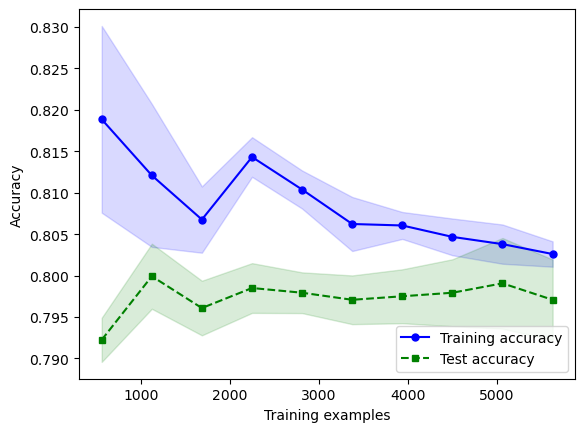

In [122]:
my_learning_curve(model = svc_model)

**Матрица ошибок**

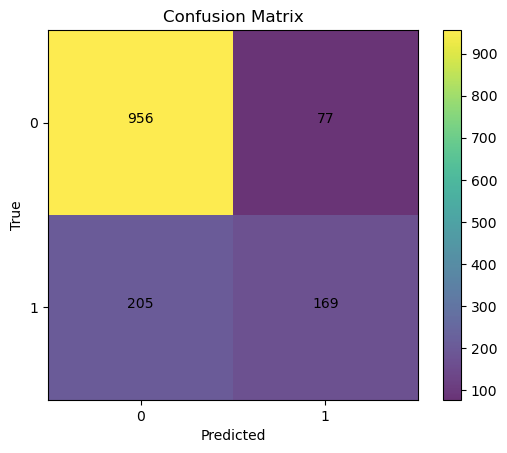

In [123]:
plot_confusion_matrix(y_test,svc_model_pred)

**ROC AUC**

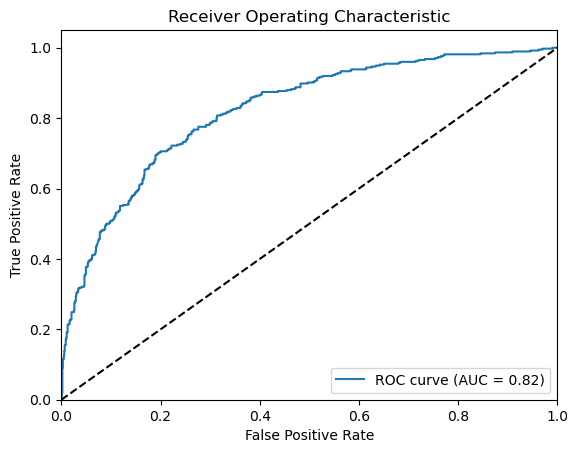

In [124]:
roc_auc_metric(svc_model)

**Добавление модели в отчет**

In [125]:
report_models = add_model(report_models,svc_model,svc_model_pred)
report_models['Model'] = report_models['Model'].replace('Pipeline', 'Support Vector Machines')
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0      DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1      RandomForestClassifier           0.69        0.51    0.59      0.81   
2          AdaBoostClassifier           0.71        0.49    0.58      0.81   
3  GradientBoostingClassifier           0.68        0.53    0.60      0.81   
4     Support Vector Machines           0.69        0.45    0.54      0.80   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85  
3          0.84       0.91   0.87  0.84  
4          0.82       0.93   0.87  0.82

<a id="5.8"></a>

## <b>5.8 <span style='color:#422e13;font-family:cursive;'>|</span> KNeighborsClassifier</b>


In [126]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values,
              'knn__weights' : ['uniform', 'distance']}

# запустим поиск по сетке с кросс-валидацией 
grid_model = GridSearchCV(pipe,param_grid,cv=stratified_cv)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'knn__weights': ['uniform', 'distance']})

In [127]:
grid_model.best_params_

{'knn__n_neighbors': 19, 'knn__weights': 'uniform'}

**Модель с лучшими гиперпараметрами**

In [128]:
scaler = StandardScaler()
best_params = {'n_neighbors': 18, 
               'weights': 'uniform'}
knn_model = KNeighborsClassifier(**best_params)
operations = [('scaler',scaler),('svc',svc)]
knn_model = Pipeline(operations)
knn_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.01, gamma=0.1, kernel='linear', probability=True))])

In [129]:
knn_model_pred = knn_model.predict(X_test)

**Classification report**

In [130]:
print(classification_report(y_test,knn_model_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.69      0.45      0.55       374

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.78      1407



**Кривая обучения**

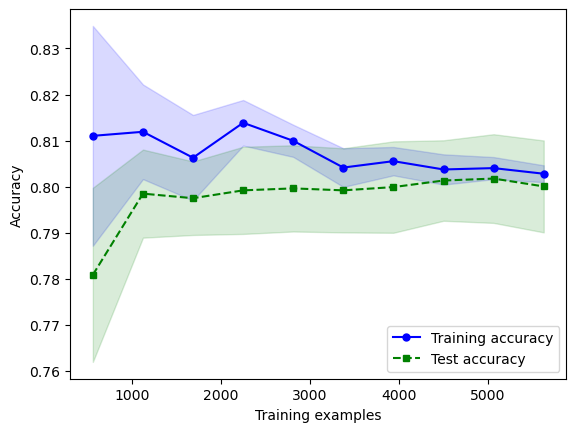

In [131]:
my_learning_curve(model = knn_model)

**Матрица ошибок**

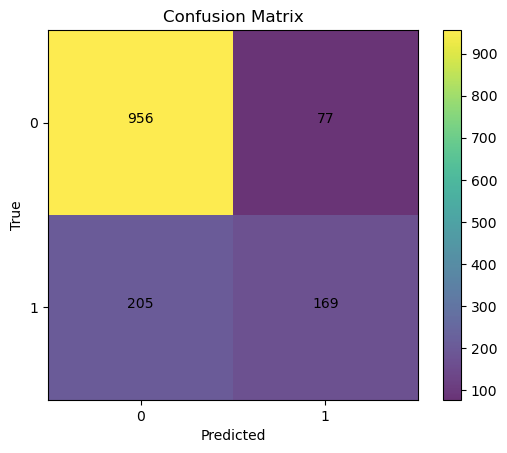

In [132]:
plot_confusion_matrix(y_test,knn_model_pred)

**ROC AUC**

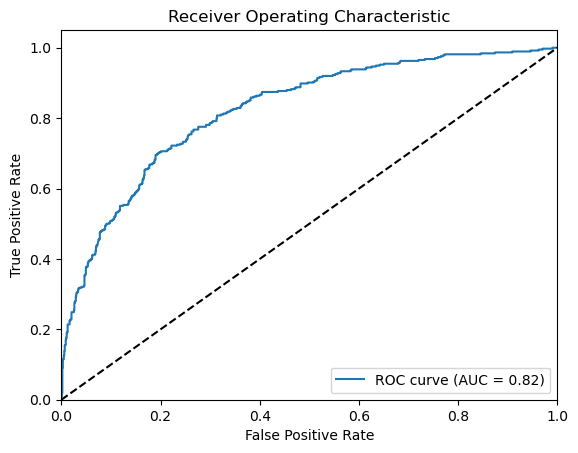

In [133]:
roc_auc_metric(knn_model)

**Добавление модели в отчет**

In [134]:
report_models = add_model(report_models,knn_model,knn_model_pred)
report_models['Model'] = report_models['Model'].replace('Pipeline', 'KNeighborsClassifier')
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0      DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1      RandomForestClassifier           0.69        0.51    0.59      0.81   
2          AdaBoostClassifier           0.71        0.49    0.58      0.81   
3  GradientBoostingClassifier           0.68        0.53    0.60      0.81   
4     Support Vector Machines           0.69        0.45    0.54      0.80   
5        KNeighborsClassifier           0.69        0.45    0.54      0.80   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85  
3          0.84       0.91   0.87  0.84  
4          0.82       0.93   0.87  0.82  
5          0.82       0.93   0.87  0.82

<a id="5.9"></a>

## <b>5.9 <span style='color:#422e13;font-family:cursive;'>|</span> LogisticRegression</b>

In [135]:
scaler = StandardScaler()
logreg = LogisticRegression()
operations = [('scaler', scaler), ('logreg', logreg)]
pipe = Pipeline(operations)

param_grid = {'logreg__penalty': ['l1', 'l2'],
              'logreg__C': [0.1, 1, 10],
              'logreg__solver': ['liblinear', 'saga'],
              'logreg__fit_intercept': [True, False]}

# Запускаем поиск по сетке с кросс-валидацией
grid_model = GridSearchCV(pipe, param_grid, cv=stratified_cv)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.1, 1, 10],
                         'logreg__fit_intercept': [True, False],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']})

In [136]:
grid_model.best_params_

{'logreg__C': 10,
 'logreg__fit_intercept': True,
 'logreg__penalty': 'l1',
 'logreg__solver': 'liblinear'}

**Модель с лучшими параметрами**

In [137]:
scaler = StandardScaler()
best_params = {'C': 1,
               'fit_intercept': True,
               'penalty': 'l2',
               'solver': 'liblinear'}
knn_model = LogisticRegression(**best_params)
operations = [('scaler', scaler), ('logreg', logreg)]
log_model = Pipeline(operations)
log_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [138]:
log_model_pred = log_model.predict(X_test)

**Classification report**

In [139]:
print(classification_report(y_test,log_model_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



**Кривая обучения**

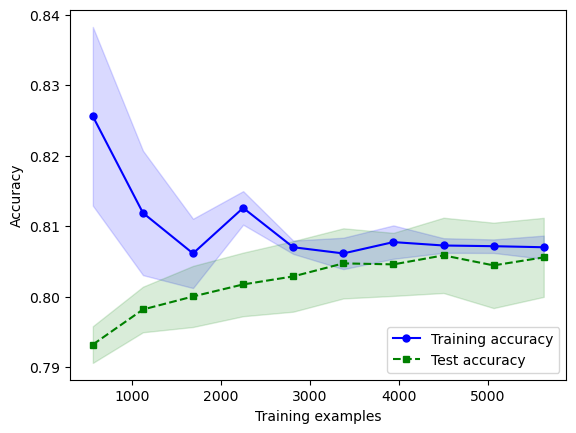

In [140]:
my_learning_curve(model = log_model)

**Матрица ошибок**

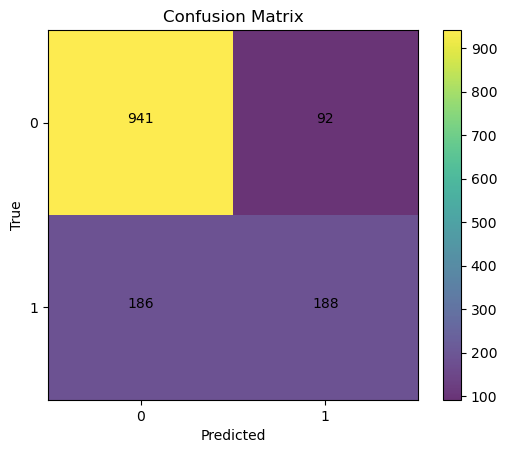

In [141]:
plot_confusion_matrix(y_test,log_model_pred)

**ROC AUC**

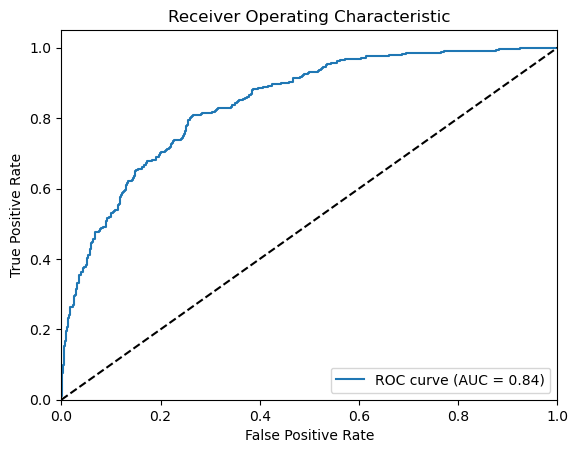

In [142]:
roc_auc_metric(log_model)

**Добавление модели в отчет**

In [143]:
report_models = add_model(report_models,log_model,log_model_pred)
report_models['Model'] = report_models['Model'].replace('Pipeline', 'LogisticRegression')
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0      DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1      RandomForestClassifier           0.69        0.51    0.59      0.81   
2          AdaBoostClassifier           0.71        0.49    0.58      0.81   
3  GradientBoostingClassifier           0.68        0.53    0.60      0.81   
4     Support Vector Machines           0.69        0.45    0.54      0.80   
5        KNeighborsClassifier           0.69        0.45    0.54      0.80   
6          LogisticRegression           0.67        0.50    0.57      0.80   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85  
3          0.84       0.91   0.87  0.84  
4          0.82       0.93   0.87  0.82  
5          0.82       0.93   0.87  0.82  
6          0.83       0.91   0.87  0.84

<a id="5.10"></a>

## <b>5.10 <span style='color:#422e13;font-family:cursive;'>|</span> CatBoost</b>

**CatBoost автоматически учитывает текстовые категориальные столбцы, поэтому занова сделаем тренировочную и тестовую выборку**

In [144]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df = categorical_df.drop('customerID',axis=1)

X = df.drop(['Churn','customerID'],axis=1)
cat_features = categorical_df.columns.to_list()
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101,stratify=y)

In [145]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [146]:
grid_model=CatBoostClassifier(
    eval_metric='AUC',
    loss_function='Logloss',
    verbose=200
)
param_grid = {
    'iterations': [200,500,1000],
    'learning_rate': [0.01, 0.02, 0.03, 0.1, 0.3],
}
grid_search_results = grid_model.grid_search(param_grid, train_data)

0:	test: 0.8359495	best: 0.8359495 (0)	total: 129ms	remaining: 25.6s
199:	test: 0.8614882	best: 0.8614882 (199)	total: 6.79s	remaining: 0us

bestTest = 0.8614881754
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8614882	best: 0.8614882 (0)	total: 7.09s	remaining: 1m 39s
0:	test: 0.8359495	best: 0.8359495 (0)	total: 42.3ms	remaining: 8.41s
199:	test: 0.8620241	best: 0.8620284 (197)	total: 6s	remaining: 0us

bestTest = 0.8620283518
bestIteration = 197

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8620284	best: 0.8620284 (1)	total: 13.1s	remaining: 1m 25s
0:	test: 0.8359495	best: 0.8359495 (0)	total: 27.5ms	remaining: 5.48s
199:	test: 0.8632422	best: 0.8634032 (191)	total: 5.11s	remaining: 0us

bestTest = 0.8634031538
bestIteration = 191

Metric AUC is not calculated on tra

400:	test: 0.8472944	best: 0.8478256 (332)	total: 11.1s	remaining: 2.75s
499:	test: 0.8477347	best: 0.8479865 (480)	total: 14.3s	remaining: 0us

bestTest = 0.8479864595
bestIteration = 480

Training on fold [1/3]
0:	test: 0.8040331	best: 0.8040331 (0)	total: 25.7ms	remaining: 12.8s
200:	test: 0.8495894	best: 0.8495894 (200)	total: 4.91s	remaining: 7.31s
400:	test: 0.8488894	best: 0.8498241 (212)	total: 10.4s	remaining: 2.57s
499:	test: 0.8478176	best: 0.8498241 (212)	total: 13.2s	remaining: 0us

bestTest = 0.8498241331
bestIteration = 212

Training on fold [2/3]
0:	test: 0.7888407	best: 0.7888407 (0)	total: 26.2ms	remaining: 13.1s
200:	test: 0.8451940	best: 0.8454793 (176)	total: 5.37s	remaining: 7.99s
400:	test: 0.8445183	best: 0.8454793 (176)	total: 10.9s	remaining: 2.68s
499:	test: 0.8436194	best: 0.8454793 (176)	total: 13.8s	remaining: 0us

bestTest = 0.8454793009
bestIteration = 176



In [147]:
grid_model.get_params()


{'loss_function': 'Logloss',
 'verbose': 200,
 'eval_metric': 'AUC',
 'iterations': 500,
 'learning_rate': 0.03}

**Кросс-валидация**

In [150]:
cv_data = cv(
    params = grid_model.get_params(),
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 0.8471531289
bestIteration = 400

Training on fold [1/5]

bestTest = 0.8549638654
bestIteration = 417

Training on fold [2/5]

bestTest = 0.843335909
bestIteration = 276

Training on fold [3/5]

bestTest = 0.8445010101
bestIteration = 182

Training on fold [4/5]

bestTest = 0.8633396036
bestIteration = 271



In [151]:
cv_data

iterations  test-AUC-mean  test-AUC-std  test-Logloss-mean  \
0             0       0.819677      0.009250           0.672839   
1             1       0.826234      0.009994           0.655129   
2             2       0.826166      0.009779           0.639536   
3             3       0.828273      0.011980           0.623990   
4             4       0.829475      0.011823           0.609310   
..          ...            ...           ...                ...   
495         495       0.849384      0.008740           0.412339   
496         496       0.849329      0.008751           0.412404   
497         497       0.849326      0.008736           0.412426   
498         498       0.849333      0.008737           0.412425   
499         499       0.849323      0.008741           0.412433   

     test-Logloss-std  train-Logloss-mean  train-Logloss-std  
0            0.000453            0.672704           0.001117  
1            0.000836            0.654771           0.002173  
2            0.001405            0.639187           0.002353  
3            0.002279            0.623465           0.002706  
4            0.002534            0.608334           0.003130  
..                ...                 ...                ...  
495          0.019703            0.353540           0.006284  
496          0.019690            0.353456           0.006324  
497          0.019672            0.353397           0.006324  
498          0.019671            0.353364           0.006321  
499          0.019666            0.353339           0.006317  

[500 rows x 7 columns]

In [152]:
n_iters = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0]

In [153]:
n_iters

258

**Модель с лучшими параметрами**

In [179]:
catboost_model=CatBoostClassifier(
    iterations = n_iters,
    eval_metric = 'AUC',
    loss_function='Logloss',
    learning_rate = 0.03,
    verbose = 200
)
catboost_model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 28.3ms	remaining: 7.28s
200:	total: 6.36s	remaining: 1.8s
257:	total: 8.24s	remaining: 0us


In [180]:
catboost_pred = catboost_model.predict(test_data)

**Classification report**

In [181]:
print(classification_report(y_test,catboost_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.52      0.60       374

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



**Матрица ошибок**

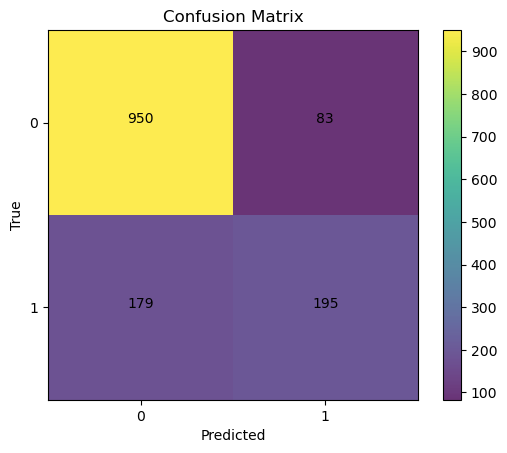

In [205]:
plot_confusion_matrix(y_test,catboost_pred)

**ROC AUC**

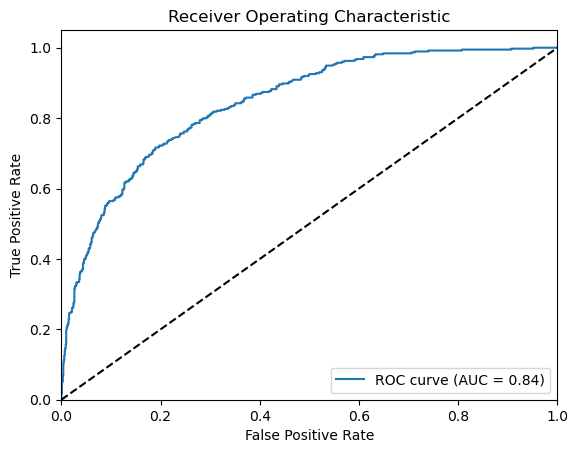

In [183]:
roc_auc_metric(catboost_model)

**Так как модель CatBoost достаточно хорошо обучается на базовых гиперпараметрах, обучим такую модель для сравнения.**

In [199]:
catboost_basic_model=CatBoostClassifier(
    eval_metric = 'AUC',
    loss_function='Logloss',
    verbose=100
)
catboost_basic_model.fit(train_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.02154
0:	total: 29.2ms	remaining: 29.2s
100:	total: 3.28s	remaining: 29.2s
200:	total: 6.17s	remaining: 24.5s
300:	total: 8.96s	remaining: 20.8s
400:	total: 11.9s	remaining: 17.8s
500:	total: 15.2s	remaining: 15.1s
600:	total: 18.4s	remaining: 12.2s
700:	total: 21.7s	remaining: 9.27s
800:	total: 24.9s	remaining: 6.19s
900:	total: 28.2s	remaining: 3.1s
999:	total: 31.7s	remaining: 0us


In [200]:
catboost_basic_pred = catboost_basic_model.predict(test_data)

In [201]:
print(classification_report(y_test,catboost_basic_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.70      0.53      0.60       374

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.81      0.81      1407



- Recall увеличился на 1 % у модели с базовыми параметрами

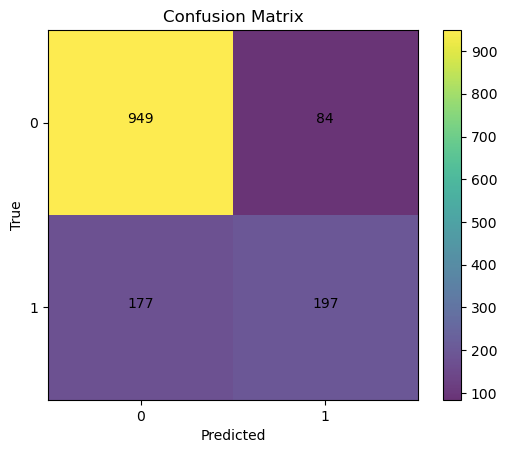

In [204]:
plot_confusion_matrix(y_test,catboost_basic_pred)

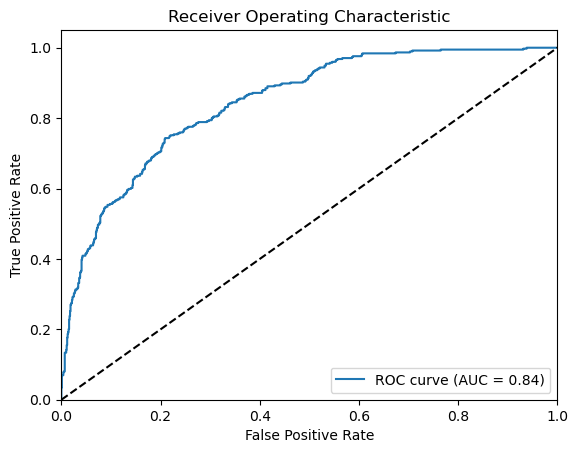

In [207]:
roc_auc_metric(catboost_basic_model)

**Добавление модели в отчет**

In [210]:
report_models = report_models.drop([7])

In [212]:
report_models = add_model(report_models,catboost_basic_model,catboost_basic_pred)
report_models

Model  Precision_yes  Recall_yes  F1_yes  Accuracy  \
0      DecisionTreeClassifier           0.65        0.54    0.59      0.80   
1      RandomForestClassifier           0.69        0.51    0.59      0.81   
2          AdaBoostClassifier           0.71        0.49    0.58      0.81   
3  GradientBoostingClassifier           0.68        0.53    0.60      0.81   
4     Support Vector Machines           0.69        0.45    0.54      0.80   
5        KNeighborsClassifier           0.69        0.45    0.54      0.80   
6          LogisticRegression           0.67        0.50    0.57      0.80   
7          CatBoostClassifier           0.70        0.53    0.60      0.81   

   Precision_no  Recall_no  F1_no   AUC  
0          0.84       0.89   0.86  0.82  
1          0.84       0.92   0.88  0.84  
2          0.83       0.93   0.88  0.85  
3          0.84       0.91   0.87  0.84  
4          0.82       0.93   0.87  0.82  
5          0.82       0.93   0.87  0.82  
6          0.83       0.91   0.87  0.84  
7          0.84       0.92   0.88  0.84

# 

<a id="5.11"></a>

## <b>5.11 <span style='color:#422e13;font-family:cursive;'>|</span> Сравнение моделей</b>

**Метрики Precision, Recall, F1-score, для класса 'yes'. Оценка предсказания моделей на отточном классе**

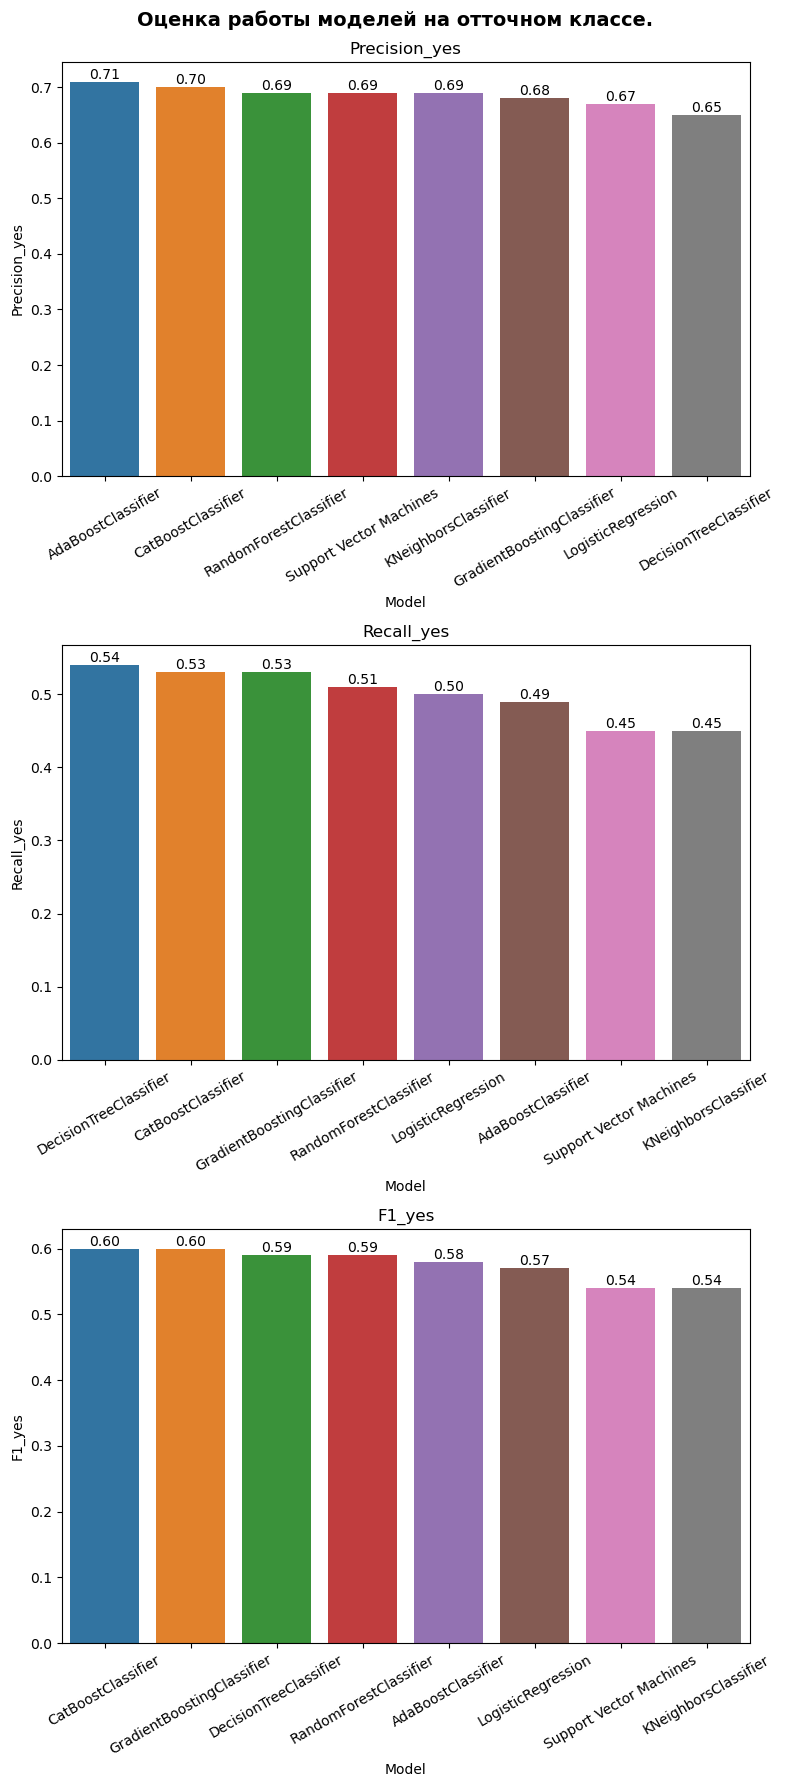

In [213]:
def get_report(data,columns):
    if len(columns) == 1:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=data, x='Model', y=columns[0])
        ax.set_title(columns[0])
        ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30)

        # Добавление значений к каждому столбцу
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                                 ha='center', va='bottom')
    else:
        fig, ax = plt.subplots(3, 1, figsize=(8, 18))
        if 'Precision_yes' in columns:
            fig.suptitle('Оценка работы моделей на отточном классе.', fontsize=14, fontweight='bold', y=0.99)
        elif 'Precision_no' in columns:
            fig.suptitle('Оценка работы моделей на не отточном классе.', fontsize=14, fontweight='bold', y=0.99)

        for idx, col in enumerate(columns):
            data = data.sort_values(by=col, ascending=False)
            sns.barplot(data=data, x='Model', y=col, ax=ax[idx])
            ax[idx].set_xticklabels(labels=ax[idx].get_xticklabels(), rotation=30)
            ax[idx].set_title(col)

            # Добавление значений столбца на график
            for p in ax[idx].patches:
                ax[idx].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

get_report(data=report_models,columns=['Precision_yes', 'Recall_yes', 'F1_yes']) 

Лучшие модели по метрикам отточных клиентов.
- AdaBoostClassifier и CatBoostClassifier демонстрируют наивысшие значения Precision, что может указывать на более точное предсказание положительного класса (отточности клиента). Однако, F1-мера для AdaBoostClassifier  несколько ниже по сравнению с другими моделями.

Худшие модели по метрикам отточных клиентов.
- Support Vector Machines (SVM), KNeighborsClassifier и LogisticRegression показывают примерно одинаковые результаты.

**Метрики Precision, Recall, F1-score для класса 'no'. Оценка предсказания моделей на не отточном классе**

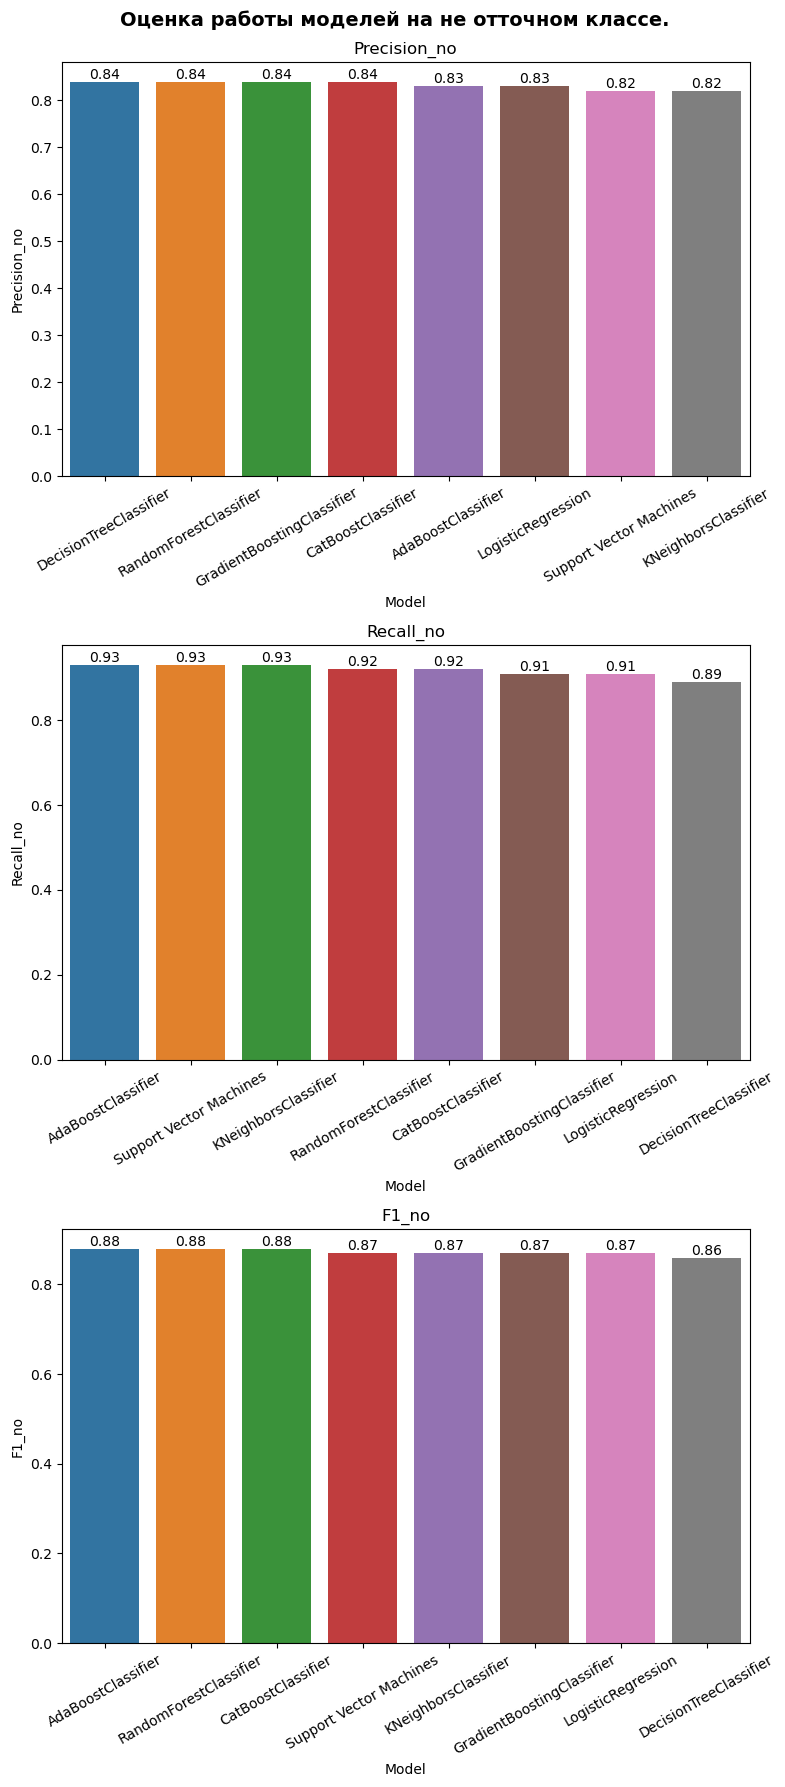

In [187]:
get_report(data=report_models,columns=['Precision_no', 'Recall_no', 'F1_no'])

- По не отточному классу нет большого разброса среди моделей;
- Но все же, более лучши можно выделить - AdaBoostClassifier,RandomForestClassifier,CatBoostClassifier.

**Сравним Accuracy**

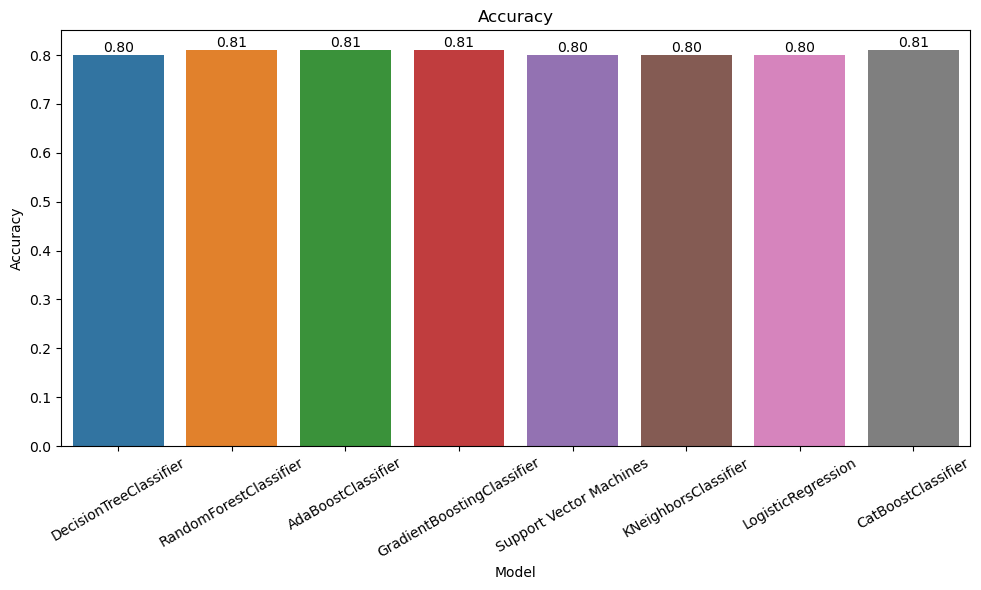

In [188]:
get_report(data=report_models,columns=['Accuracy'])

- Наибольшая точность у моделей CatBoostClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

**Сравним AUC**

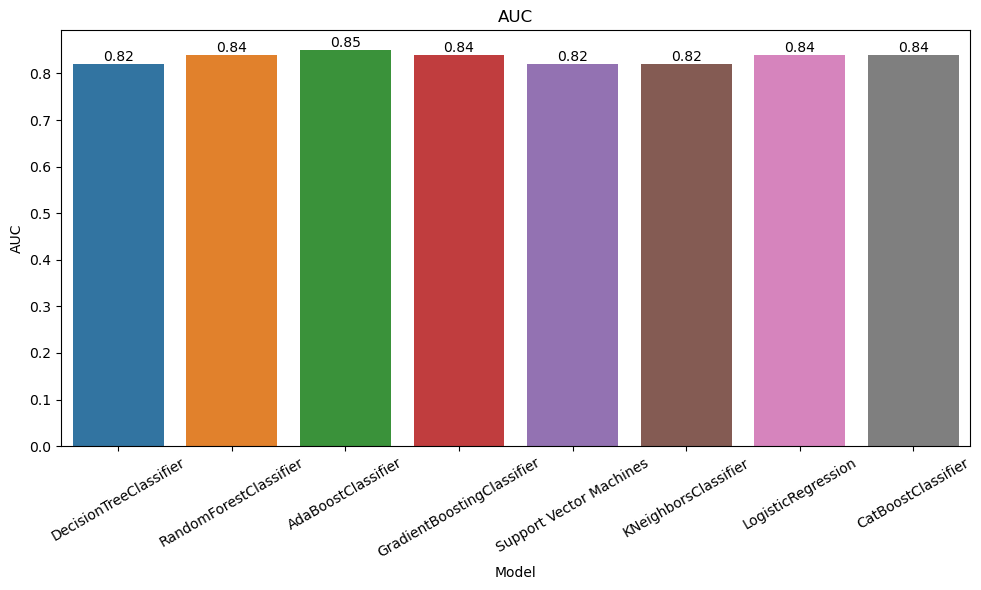

In [189]:
get_report(data=report_models,columns=['AUC'])

- Наибольшая площаль AUC у модели AdaBoostClassifier;

<a id="5.12"></a>

## <b>5.12 <span style='color:#422e13;font-family:cursive;'>|</span> Лучшая модель</b>

**На основе вышеуказанных данных, можно сказать что наилучшая модель - CatBoostClassifier. Так как она лучше выявляет точность и полноту предсказания отточных клиентов в сравнии с остальными моделями.**

# 

<a id="5.13"></a>

## <b>5.13 <span style='color:#422e13;font-family:cursive;'>|</span> Feature importance</b>

In [214]:
feature_importance = catboost_basic_model.get_feature_importance(prettified=True)

In [215]:
feature_importance

Feature Id  Importances
0           Contract    12.423905
1     MonthlyCharges    11.514644
2             tenure    10.685453
3       TotalCharges     9.711476
4      PaymentMethod     7.705344
5    InternetService     7.283052
6      MultipleLines     5.364576
7      Tenure_Cohort     5.317809
8       OnlineBackup     5.172946
9     OnlineSecurity     4.457109
10       TechSupport     4.322217
11   StreamingMovies     2.909819
12  DeviceProtection     2.764985
13       StreamingTV     2.622569
14  PaperlessBilling     2.454581
15            gender     1.627117
16     SeniorCitizen     1.555322
17        Dependents     1.336382
18           Partner     0.611063
19      PhoneService     0.159630

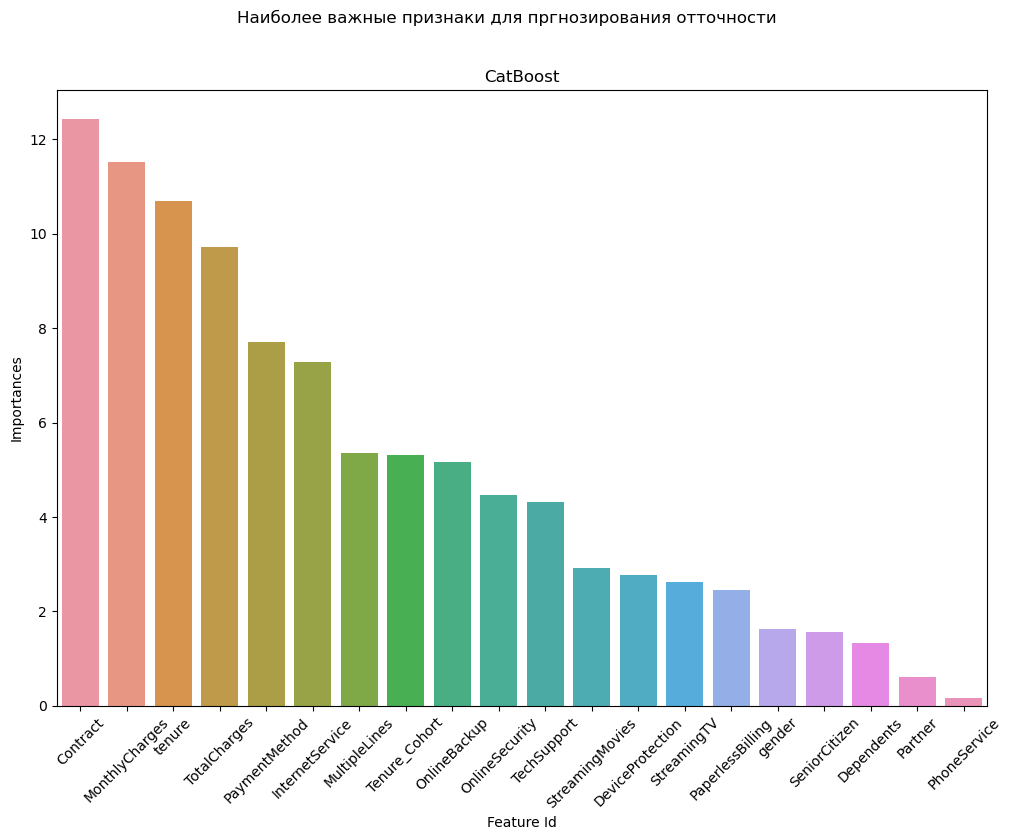

In [216]:
plt.figure(figsize=(12,8))
sns.barplot(data = feature_importance, x = 'Feature Id', y = 'Importances') 
plt.suptitle('Наиболее важные признаки для пргнозирования отточности')
plt.title('CatBoost')
plt.xticks(rotation=45)
plt.show()

- Для модели Catboost наиболее важный признак - тип контракта. Ранее при анализе мы выявили что среди елиентов, которые подписали ежемесячный контракт, наблюдается высокая конверсия отточности, а с клиентами, которые подписали контракт на два года, наблюдалась обратная корреляция.
- Ежемесячные платежи модель довольно активно использует;
- Также очень важен признак продолжительности получения услуг клиентами. В EDA мы заметили, что в последний месяц много отточных клиентов.

In [217]:
shap.initjs()

In [218]:
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

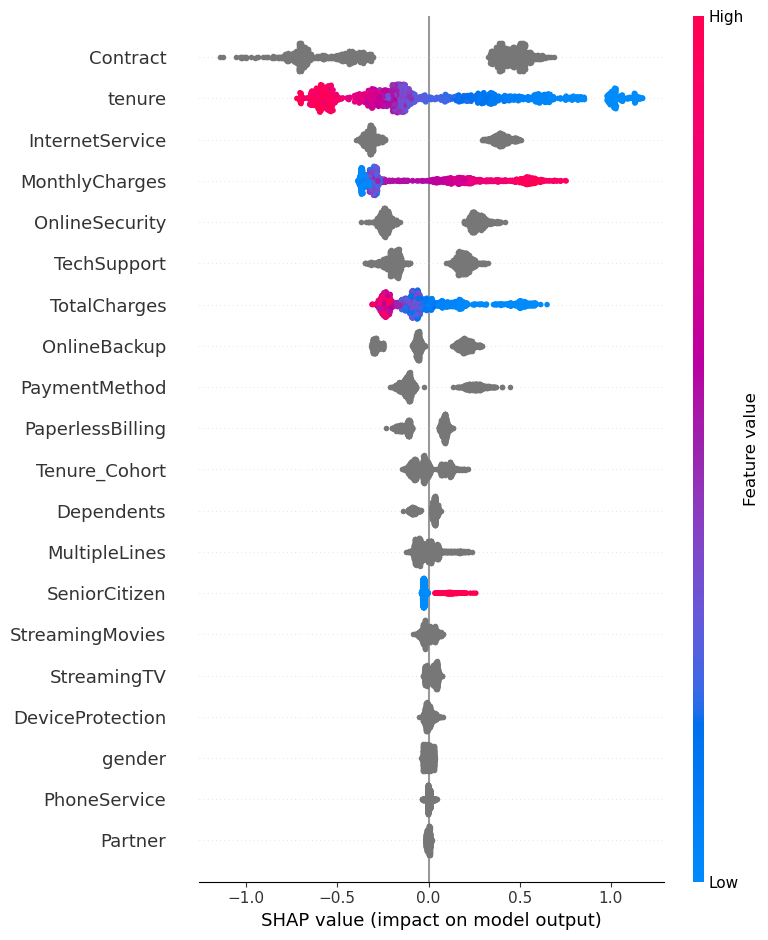

In [219]:
shap.summary_plot(shap_values, X_test)

- По графику summary plot видно что имеется корреляция с колонкой tenure, ежемесячными и общими платежами, возрастным диапозоном.

**ТОП-5 приоритетных признаков для модели CatBoost.**

In [220]:
features = catboost_model.get_feature_importance(prettified=True)['Feature Id'].values

In [221]:
features

array(['Contract', 'tenure', 'MonthlyCharges', 'InternetService',
       'TotalCharges', 'OnlineSecurity', 'TechSupport', 'OnlineBackup',
       'PaymentMethod', 'MultipleLines', 'Tenure_Cohort',
       'PaperlessBilling', 'StreamingMovies', 'StreamingTV',
       'DeviceProtection', 'Dependents', 'SeniorCitizen', 'PhoneService',
       'gender', 'Partner'], dtype=object)

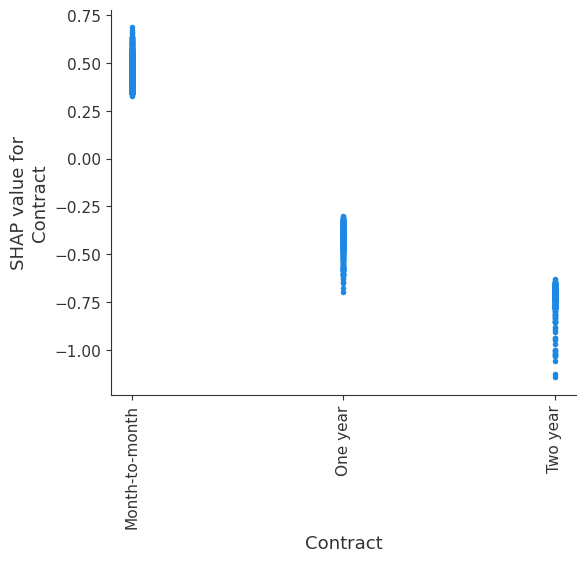

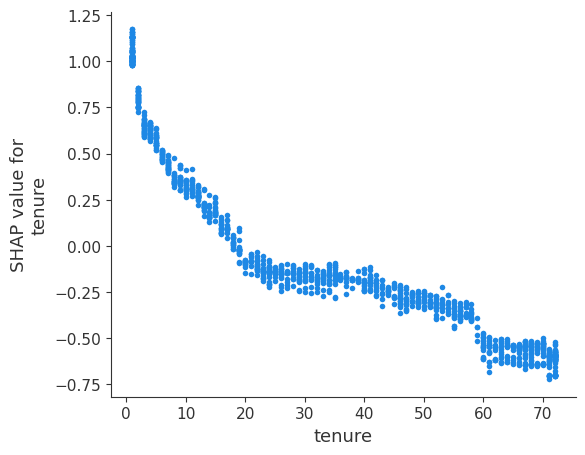

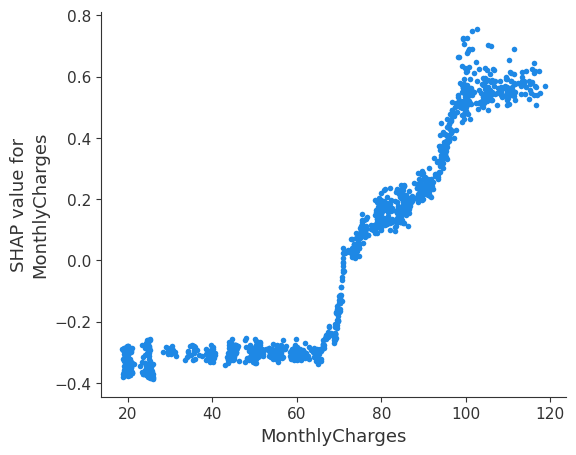

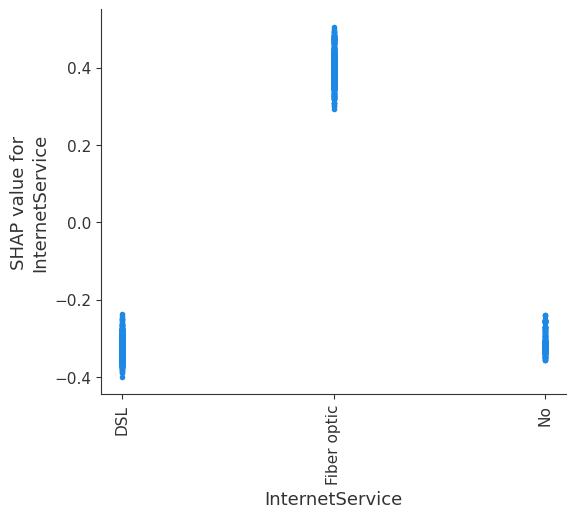

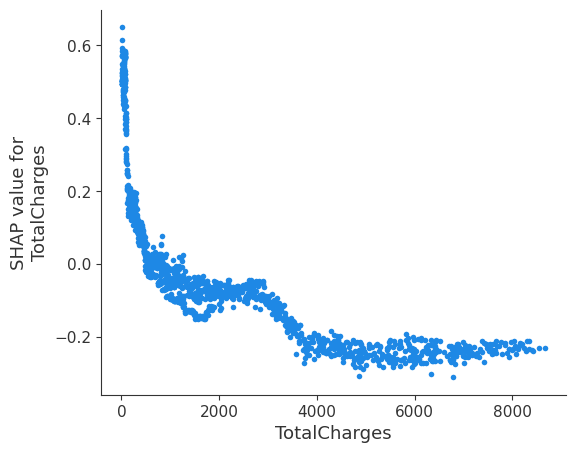

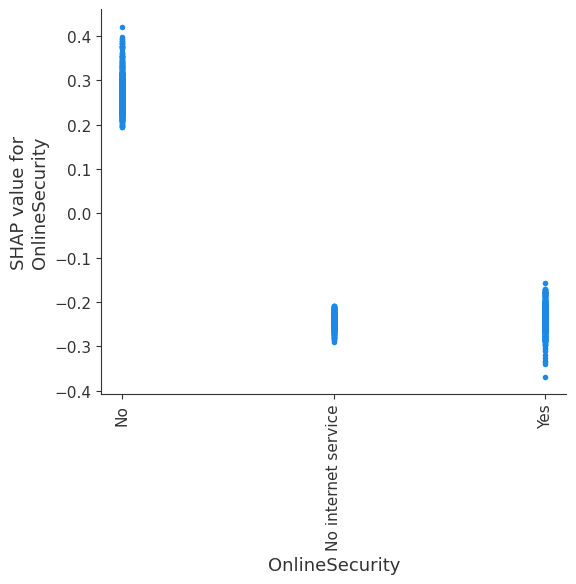

<Figure size 640x480 with 0 Axes>

In [222]:
for feature in features[:6]:
    shap.dependence_plot(feature, shap_values, X_test, interaction_index=None)

plt.tight_layout()
plt.show()

- Результаты приоритетных признаков для модели такие же, как и в EDA;
- Можно добавить, что имеется зависимость с ежемесячными платежами. Модель учитывает клиентов с больщими ежемесячными платежами более важными.

<a id="5.14"></a>

## <b>5.14 <span style='color:#422e13;font-family:cursive;'>|</span> Обучение модели на всех данных</b>

In [223]:
train_full_data = Pool(
    data=X,
    label=y,
    cat_features=cat_features
)

In [224]:
catboost_basic_model.fit(train_full_data,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.023694
0:	total: 47.6ms	remaining: 47.5s
100:	total: 3.55s	remaining: 31.6s
200:	total: 6.74s	remaining: 26.8s
300:	total: 9.78s	remaining: 22.7s
400:	total: 13.1s	remaining: 19.5s
500:	total: 16.6s	remaining: 16.5s
600:	total: 20.1s	remaining: 13.3s
700:	total: 23.6s	remaining: 10.1s
800:	total: 27.2s	remaining: 6.77s
900:	total: 30.8s	remaining: 3.38s
999:	total: 34.3s	remaining: 0us


# 

<a id="5.15"></a>

## <b>5.15 <span style='color:#422e13;font-family:cursive;'>|</span> Сохранение модели</b>

In [226]:
dump(catboost_basic_model, 'CatBoost_Predict_Telco_Customer_Churn.joblib') 

['CatBoost_Predict_Telco_Customer_Churn.joblib']

# 

<a id="6"></a>

## <b>6 <span style='color:#422e13;font-family:cursive;'>|</span> Заключение</b>

В данной задаче мы анализировали отточных и не отточных клиентов. Также после исследовательского анализа создаавали модели машинного обучения для прогнозирования отточности клиентов. 

Наши данные содержали в себе следущее:
 - Клиенты, которые ушли в течение последнего месяца — колонка называется «Отток».
 - Услуги, на которые подписался каждый клиент: телефон, несколько линий, Интернет, онлайн-безопасность, онлайн-резервное копирование, защита устройства, техническая поддержка, потоковое телевидение и фильмы. 
 - Информация об учетной записи клиента — как долго он был клиентом, контракт, способ оплаты, безбумажный биллинг, ежемесячные платежи и общие платежи.
 - Демографическая информация о клиентах — пол, возрастной диапазон, наличие партнеров и иждивенцев.
 
Изначально были просмотрены данные, их пропуски и т.д. В данном датафрейме не было пропусков, поэтому задача в какой-то степени облегчилась. Проведен исследовательский анализ данных(EDA). 
В процессе исследования данных были сделаны следующие выводы:
   - Факторы, которые говорят о том, что клиент больше предвержен к оттоку: 
     - Пожилой возраст; 
     - Остуствие партнера;
     - Не иждевенцы;
     - Малая продолжительность пользования услугами компании(до 2 лет);
     - Ежемесячный контракт;
     - Метод оплаты(электронный чек);
     - Отсутствие безбумажного биллинга;
     - Использование интернет-услуги Fiber optic;
     
   - Большинство отточных клиентов за последний месяц не подключали следующие услуги:
     - Онлайн безопасность;
     - Онлайн резервное копирование;
     - Техническую поддержку;
     - Защита устройства;
     - Потоковое телевидение;
     - Потоковые фильмы.
     
   - Общие платежи выше у не отточных клиентов.

Выводы по результатам обучения моделей машинного обучения:
   - DecisionTreeClassifier: Эта модель достигает неплохих результатов с точки зрения общей точности (Accuracy), но ниже по Precision_yes, Recall_yes и F1_yes, поэтому она может быть менее эффективна в предсказании оттока клиентов по сравнению с другими моделями.
   - RandomForestClassifier: Random Forest (случайный лес) модель также показывает хорошие результаты по общей точности (Accuracy), однако ее Precision_yes, Recall_yes и F1_yes немного выше, чем у DecisionTreeClassifier, что делает ее более предпочтительной для предсказания оттока клиентов.
   - AdaBoostClassifier: AdaBoost модель достигает наивысшего значения Precision_yes среди всех моделей, что означает, что она может быть очень полезна для точного предсказания оттока клиентов. Однако, ее Recall_yes немного ниже, что может означать, что она склонна пропускать некоторые положительные случаи оттока клиентов.
   - GradientBoostingClassifier: Эта модель также показывает хорошие результаты по Precision_yes, Recall_yes и F1_yes, и ее общая точность (Accuracy) высока. Она может быть хорошим выбором для предсказания оттока клиентов.
   - Support Vector Machines (SVM), KNeighborsClassifier и LogisticRegression: Эти модели показывают сравнимые результаты между собой, но немного ниже по метрикам Precision_yes, Recall_yes и F1_yes по сравнению с AdaBoostClassifier и GradientBoostingClassifier.
   - CatBoostClassifier: CatBoost модель также достигает высоких значений Precision_yes, Recall_yes и F1_yes, что делает ее привлекательным вариантом для предсказания оттока клиентов. Она также имеет высокую общую точность (Accuracy) и значение AUC, что подтверждает ее качество и эффективность.
   - KNeighborsClassifier (Метод ближайших соседей): Данная модель показывает схожие результаты с моделью Support Vector Machines. Она имеет средние значения Precision_yes, Recall_yes и F1_yes, а также общую точность (Accuracy). В сравнении с другими моделями, она может быть менее эффективна в предсказании оттока клиентов.
   - LogisticRegression (Логистическая регрессия): Эта модель имеет приемлемые значения метрик Precision_yes, Recall_yes и F1_yes. Она показывает схожие результаты с моделями Support Vector Machines и KNeighborsClassifier. В общем, она может быть рассмотрена как вариант для предсказания оттока клиентов.

Лучшая модель CatBoostClassiffier = {
eval_metric = 'AUC',
loss_function='Logloss'} с базовыми гиперпараметрами.

Метрики оценки модели CatBoost:
- Model            CatBoostClassifier
- Precision_yes                   0.7
- Recall_yes                     0.53
- F1_yes                          0.6
- Accuracy                       0.81
- Precision_no                   0.84
- Recall_no                      0.92
- F1_no                          0.88
- AUC                            0.84